# Imports & file locations

-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
anndata             0.7.5
attr                19.3.0
autoreload          NA
backcall            0.1.0
cairo               1.18.2
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.0
decorator           4.4.1
get_version         2.1
h5py                2.10.0
idna                2.8
igraph              0.7.1
importlib_metadata  0.19
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
jinja2              2.10.3
joblib              0.14.1
jsonschema          3.2.0
kiwisolver          1.1.0
legacy_api_wrap     0.0.0
leidenalg           0.7.0
llvmlite            0.30.0
louvain             0.6.1
markupsafe          1.1.1
matplotlib          3.1.2
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
nbformat            4.4.0
numba               0.46.0
numexpr             2.7.0
numpy               1.17.3
packaging           20.8
pan

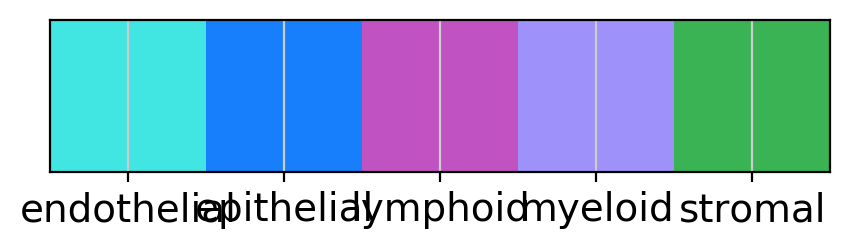

In [2]:
%load_ext autoreload
%autoreload 2

import itertools
import os

import numpy as np
import scanpy 
import scanpy as sc
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import anndata

# Olga's modules
import xspecies

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# From https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html
# You can use pandas.IndexSlice to facilitate a more natural syntax using :, rather than using slice(None).
idx = pd.IndexSlice


anndata.__version__

scanpy.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
scanpy.logging.print_versions()
scanpy.set_figure_params(frameon=False, color_map='magma_r')

## Matplotlibrc

In [3]:
%%file matplotlibrc

# Non-interactive backend
backend: TkAgg

# Editable text on pdf export
pdf.fonttype: 42
ps.fonttype: 42

# Don't warn about too many figures open
figure.max_open_warning: 0

# Figure saving
savefig.transparent: True
savefig.bbox: tight
savefig.dpi: 300

# Fonts
font.sans-serif: Arial

Overwriting matplotlibrc


## Output, input directories

In [4]:
indir_local = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/'

In [5]:

outdir_gdrive = "/home/olga/googledrive/TabulaMicrocebus/data/cross-species"
outdir_local = "/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species"
outdirs = outdir_local, outdir_gdrive

# Google drive figure output folder
FIGURE_FOLDER = "/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle"
# !ls -lha $outdir_local

GDRIVE_ANALYSIS_DIR = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle'

## Constants

In [6]:
groupby = "narrow_group"
species = "species"

tissue = "lung"

figure_folder_base = os.path.join(FIGURE_FOLDER, tissue, "differential-expression")

# Load data

In [7]:
%%time

h5ad = os.path.join(
    outdir_local,
    f"concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}__preprocessed.h5ad",
)
! ls -lha $h5ad

-rw-r--r-- 1 olga czb 972M Jul 25 17:34 /home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/concatenated__human-lemur-mouse_10x__one2one_orthologs__lung__preprocessed.h5ad
CPU times: user 5.18 ms, sys: 10.4 ms, total: 15.6 ms
Wall time: 130 ms


In [10]:
%%time

adata = scanpy.read_h5ad(h5ad)
adata

CPU times: user 428 ms, sys: 1.29 s, total: 1.72 s
Wall time: 1.97 s


AnnData object with n_obs × n_vars = 82077 × 13056
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'batch', 'channel_10x', 'compartment', 'method', 'species_batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'compartment_broad', 'compartment_narrow', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'log_counts', 'sqrt_counts', 'dendrogram_group_name', 'dendrogram_group_color_name', 'dendrogram_group_color_hex', 'dendrogram_subgroup_name', 'dendrogram_subgroup_color_hex', 'lemur_name', 'lemur_renamed', 'cell_id_lemur_renamed', 'dendrogram_group'
    var: 'mouse_le

## Make CrossSpeciesComparison object

In [11]:
cross_species = xspecies.CrossSpeciesComparison(adata, "compartment_narrow")
# cross_species.plot_shared_cell_types()

compartment_narrow                           species    
endothelial: artery cell                     Mouse             95
                                             Mouse Lemur       78
                                             Human           1306
endothelial: capillary aerocyte cell         Mouse            512
                                             Mouse Lemur      818
                                             Human           3712
endothelial: capillary cell                  Mouse           1743
                                             Mouse Lemur     1011
                                             Human           5367
endothelial: lymphatic cell                  Mouse             40
                                             Mouse Lemur      228
                                             Human            422
endothelial: vein cell                       Mouse            306
                                             Mouse Lemur      124
                   

extracting highly variable genes



------- group: endothelial: artery cell -------
number of cells: 1479


    finished (0:00:01)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2820


    finished (0:00:03)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


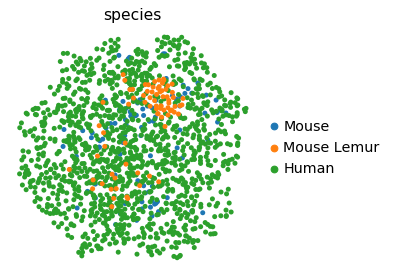

extracting highly variable genes



------- group: endothelial: capillary aerocyte cell -------
number of cells: 5042


    finished (0:00:02)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2826


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


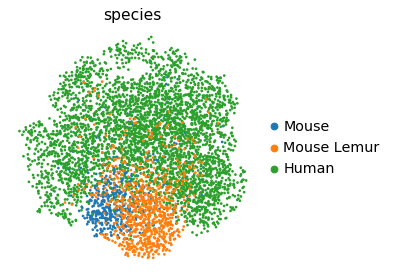

extracting highly variable genes



------- group: endothelial: capillary cell -------
number of cells: 8121


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2901


    finished (0:00:02)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


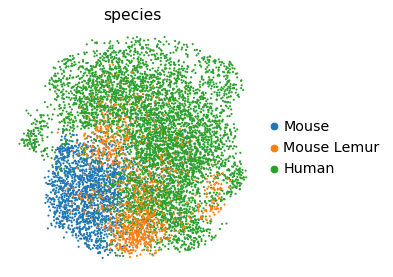

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: endothelial: lymphatic cell -------
number of cells: 690
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


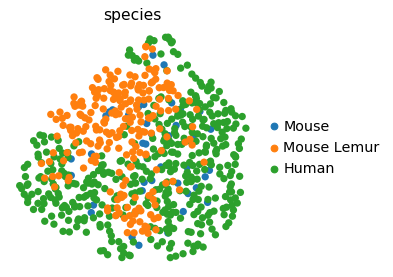

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: endothelial: vein cell -------
number of cells: 1410

 Number of highly variable genes: 2949


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


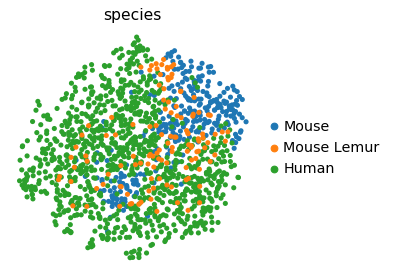

extracting highly variable genes



------- group: epithelial: alveolar epithelial cell type 2 -------
number of cells: 5255


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2931


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


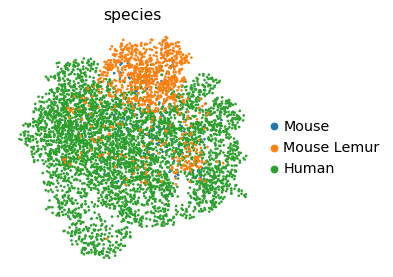

extracting highly variable genes



------- group: epithelial: ciliated cell -------
number of cells: 1368


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3153


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


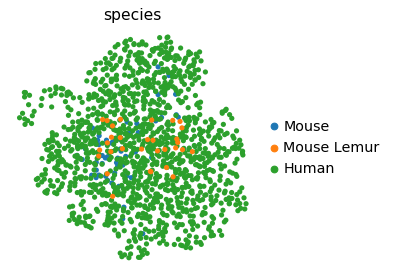

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: lymphoid: B cell -------
number of cells: 1895
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


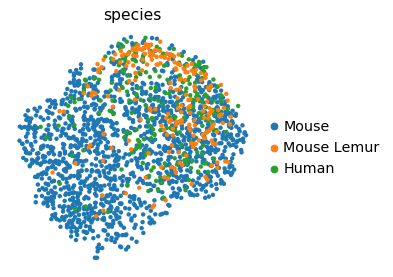

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



------- group: lymphoid: T cell (CD4+) -------
number of cells: 3860

 Number of highly variable genes: 2760


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


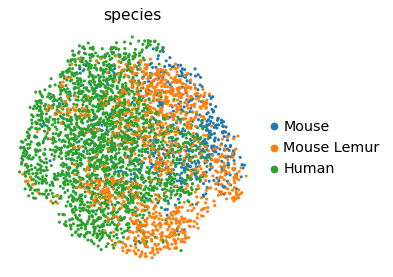

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes



------- group: lymphoid: T cell (CD8+) -------
number of cells: 3143

 Number of highly variable genes: 2682


    with n_comps=50
    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


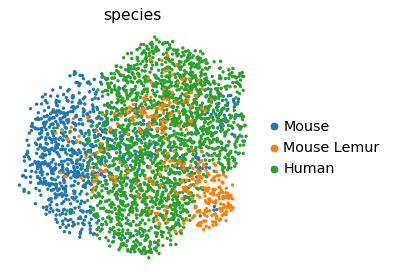

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: lymphoid: natural killer T cell -------
number of cells: 1187
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


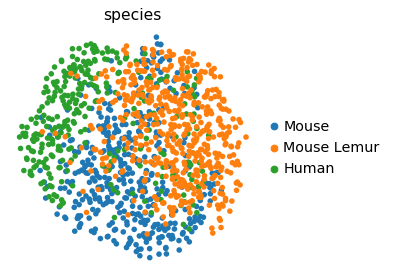

extracting highly variable genes



------- group: lymphoid: natural killer cell -------
number of cells: 7894


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2688


    finished (0:00:02)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:14)


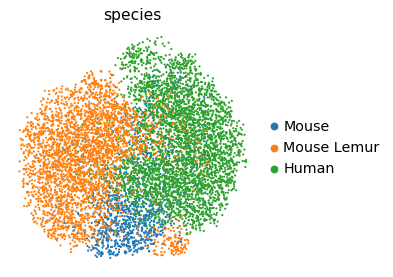

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: lymphoid: natural killer cell_T cell (PF) -------
number of cells: 899
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


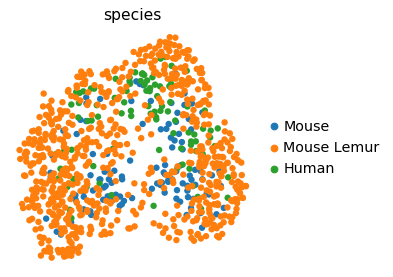

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: lymphoid: plasma cell -------
number of cells: 337
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


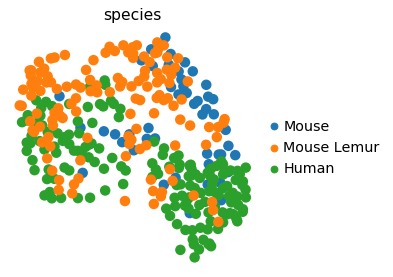

extracting highly variable genes



------- group: myeloid: alveolar macrophage -------
number of cells: 18658


    finished (0:00:05)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2739


    finished (0:00:11)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


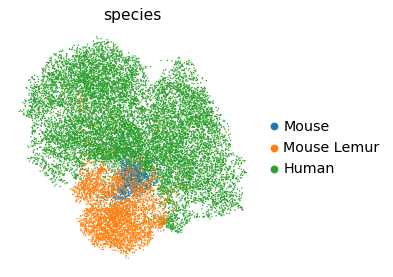

extracting highly variable genes



------- group: myeloid: alveolar macrophage (PF) -------
number of cells: 1223


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2876


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


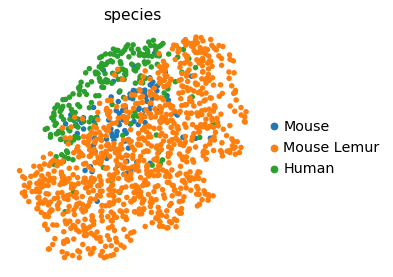

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: myeloid: conventional dendritic cell -------
number of cells: 722
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


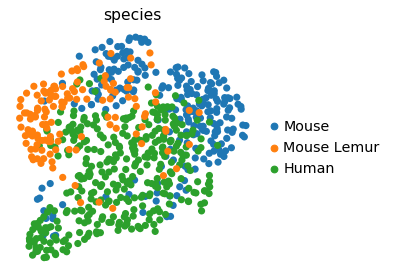

extracting highly variable genes



------- group: myeloid: monocyte -------
number of cells: 12361


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 2660


    finished (0:00:02)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:09)


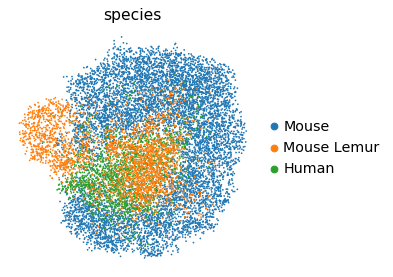

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: myeloid: plasmacytoid dendritic cell -------
number of cells: 242
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


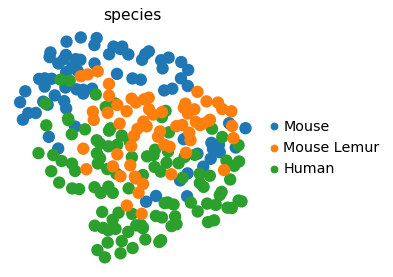

extracting highly variable genes



------- group: stromal: adventitial fibroblast -------
number of cells: 1354


    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3222


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


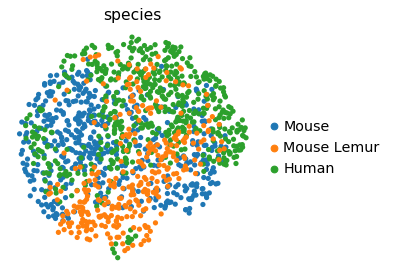

extracting highly variable genes
    finished (0:00:00)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)



------- group: stromal: alveolar fibroblast -------
number of cells: 3465


computing PCA
    on highly variable genes
    with n_comps=50



 Number of highly variable genes: 3130


    finished (0:00:01)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)


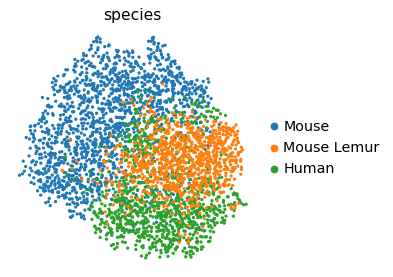

extracting highly variable genes
computing PCA
    on highly variable genes
    with n_comps=50



------- group: stromal: pericyte -------
number of cells: 1472
Scanpy had an error when computing highly variable genes, using previous ones


    finished (0:00:00)
computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


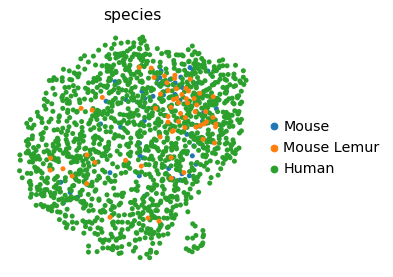


------- group: endothelial: artery cell -------
number of cells: 1479

------- group: endothelial: capillary aerocyte cell -------
number of cells: 5042

------- group: endothelial: capillary cell -------
number of cells: 8121

------- group: endothelial: lymphatic cell -------
number of cells: 690

------- group: endothelial: vein cell -------
number of cells: 1410

------- group: epithelial: alveolar epithelial cell type 2 -------
number of cells: 5255

------- group: epithelial: ciliated cell -------
number of cells: 1368

------- group: lymphoid: B cell -------
number of cells: 1895

------- group: lymphoid: T cell (CD4+) -------
number of cells: 3860

------- group: lymphoid: T cell (CD8+) -------
number of cells: 3143

------- group: lymphoid: natural killer T cell -------
number of cells: 1187

------- group: lymphoid: natural killer cell -------
number of cells: 7894

------- group: lymphoid: natural killer cell_T cell (PF) -------
number of cells: 899

------- group: lymphoid

In [12]:
cross_species.make_mini_adatas(groupby='compartment_narrow')
cross_species.make_subset_adatas(do_pca_umap=False)

## Do differential expression

ranking genes


-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
anndata             0.7.5
annoy               NA
attr                19.3.0
autoreload          NA
backcall            0.1.0
bbknn               NA
cairo               1.18.2
cffi                1.13.2
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.0
decorator           4.4.1
get_version         2.1
h5py                2.10.0
idna                2.8
igraph              0.7.1
importlib_metadata  0.19
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
jinja2              2.10.3
joblib              0.14.1
jsonschema          3.2.0
kiwisolver          1.1.0
legacy_api_wrap     0.0.0
leidenalg           0.7.0
llvmlite            0.30.0
louvain             0.6.1
markupsafe          1.1.1
matplotlib          3.1.2
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
nbformat            4.4.0
numba               0.46.0
numexpr 

Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


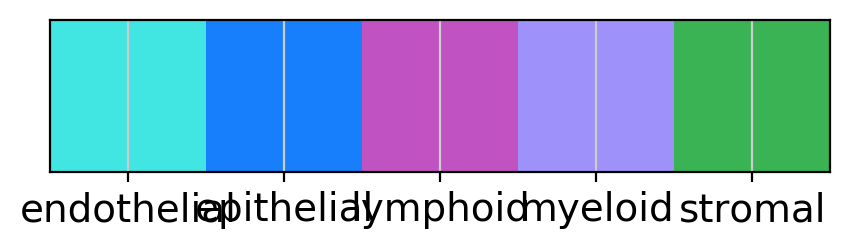

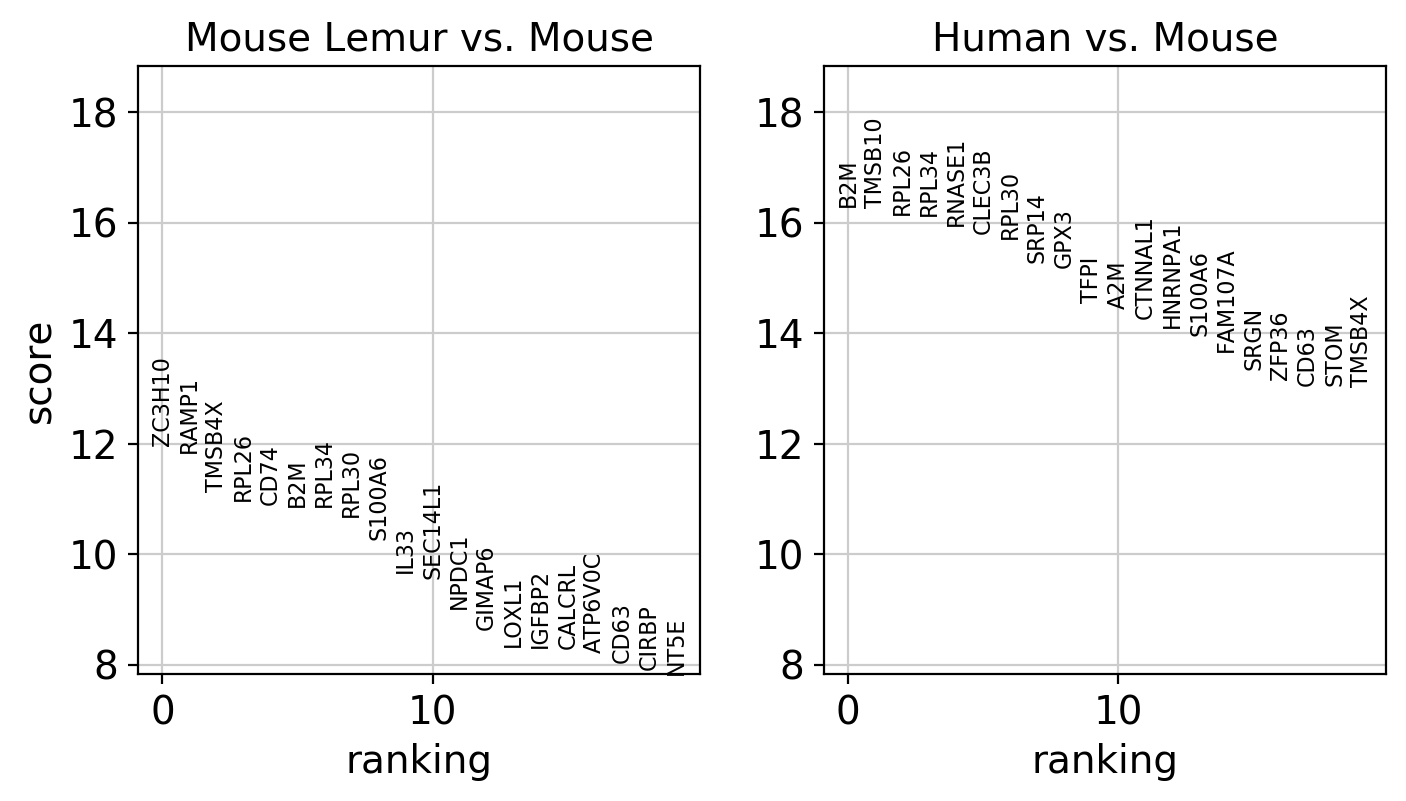

ranking genes



------- group: endothelial: capillary aerocyte cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:09)


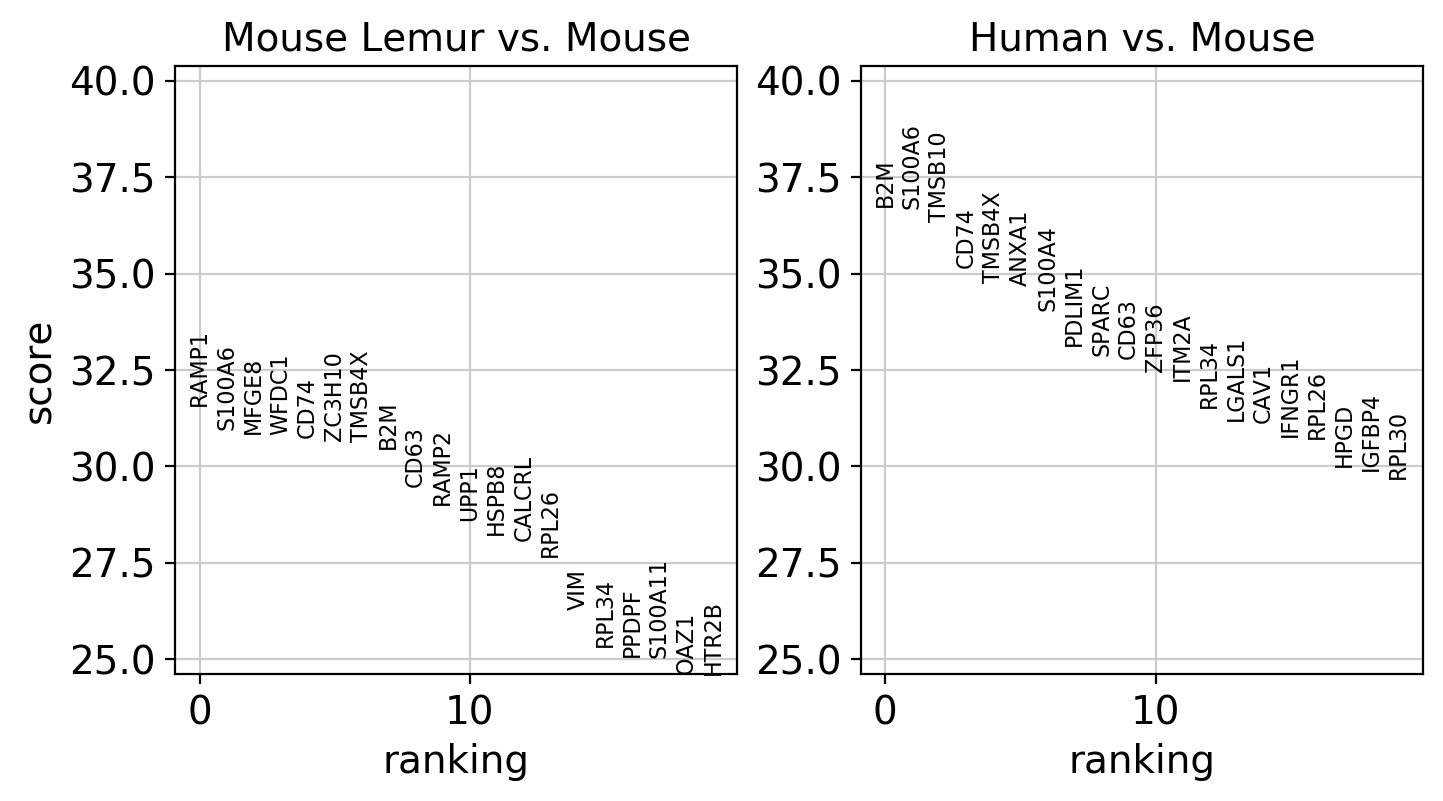

ranking genes



------- group: endothelial: capillary cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:17)


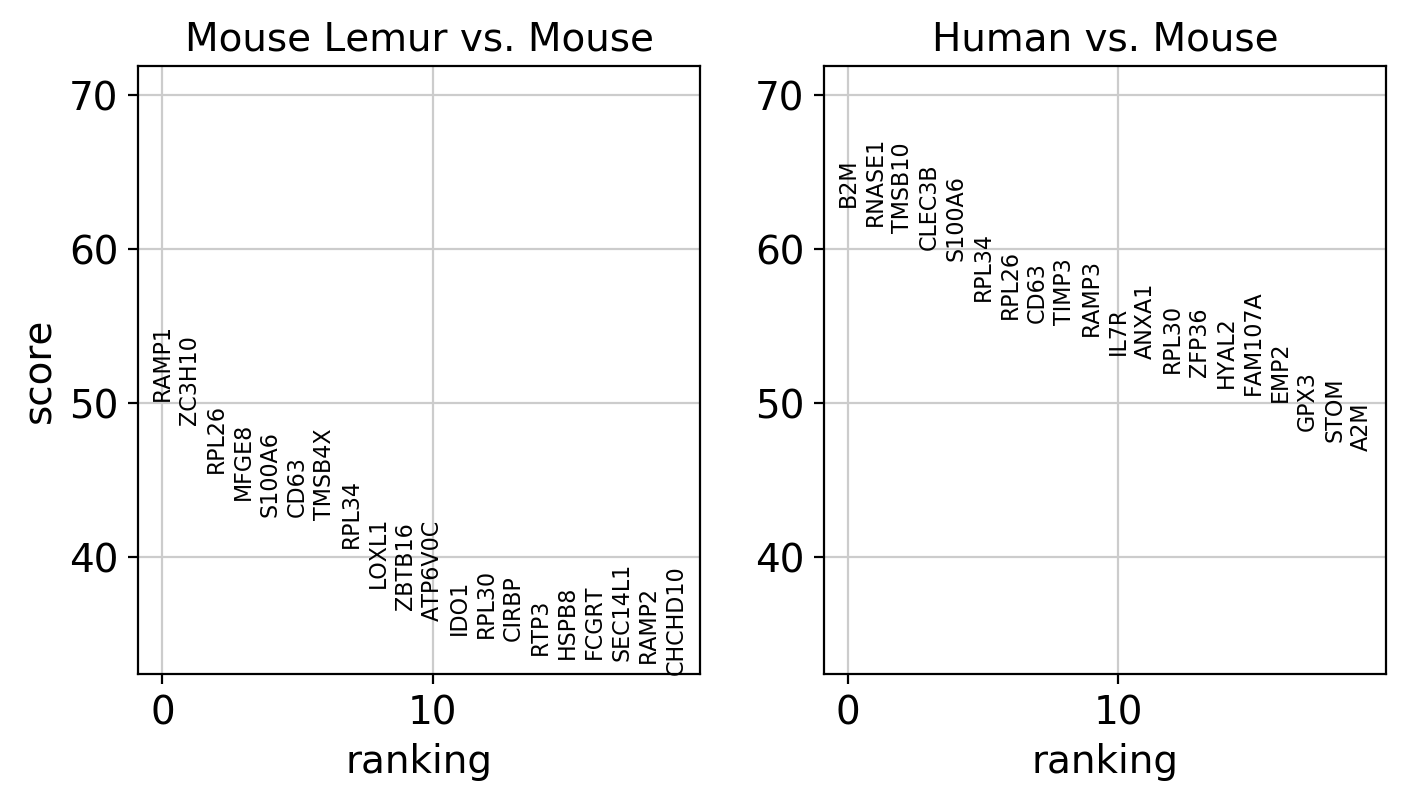

ranking genes



------- group: endothelial: lymphatic cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


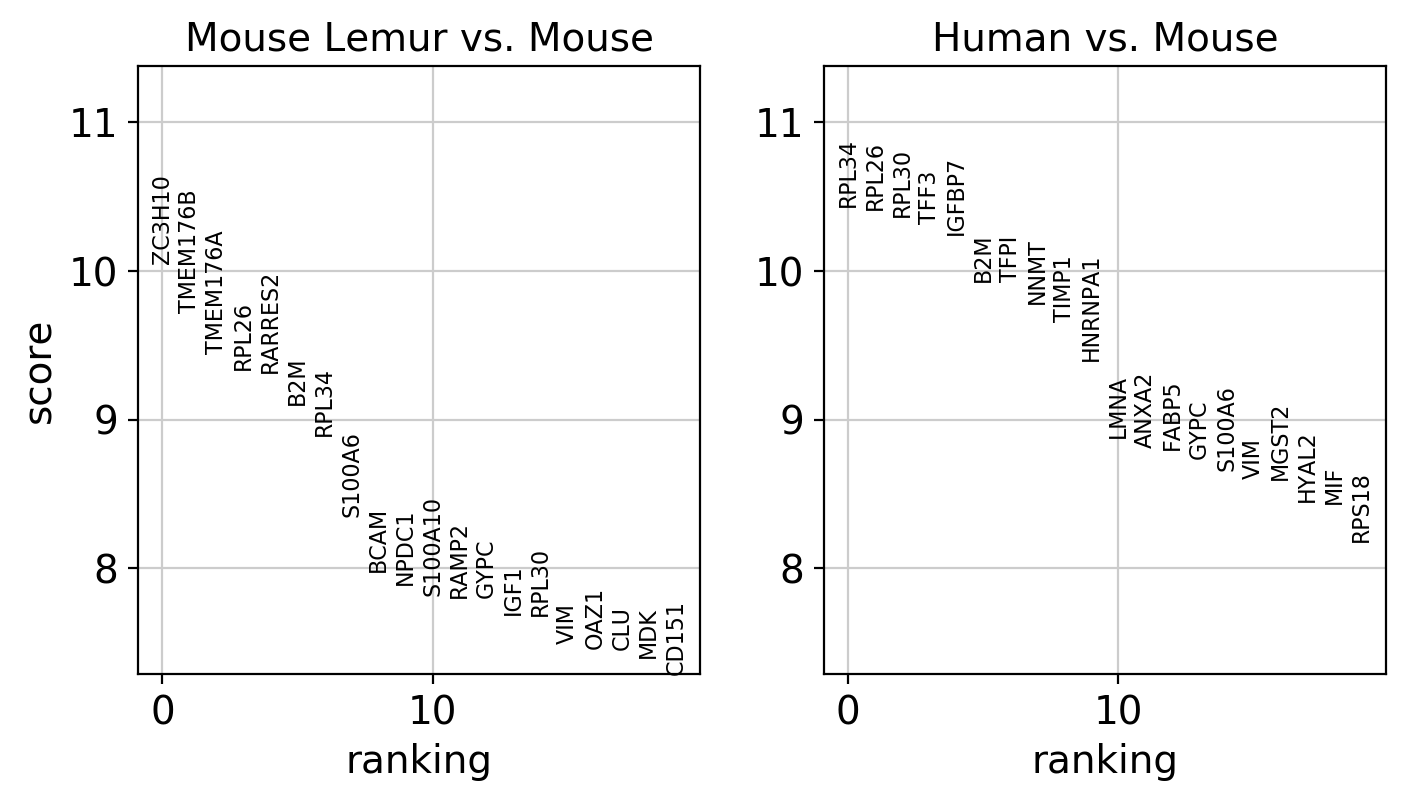

ranking genes



------- group: endothelial: vein cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


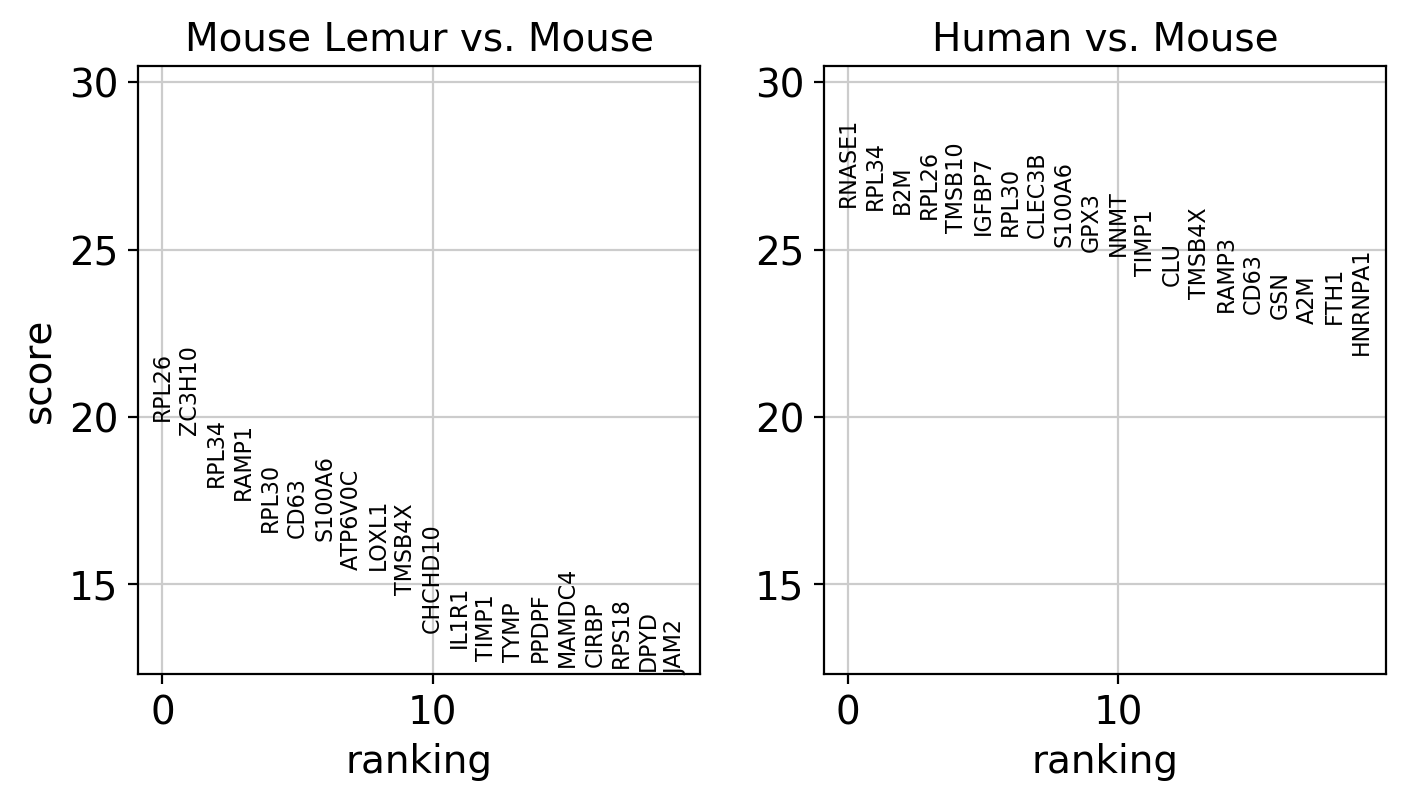

ranking genes



------- group: epithelial: alveolar epithelial cell type 2 -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:416: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in true_divide
  self.expm1_func(mean_rest) + 1e-9
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'sco

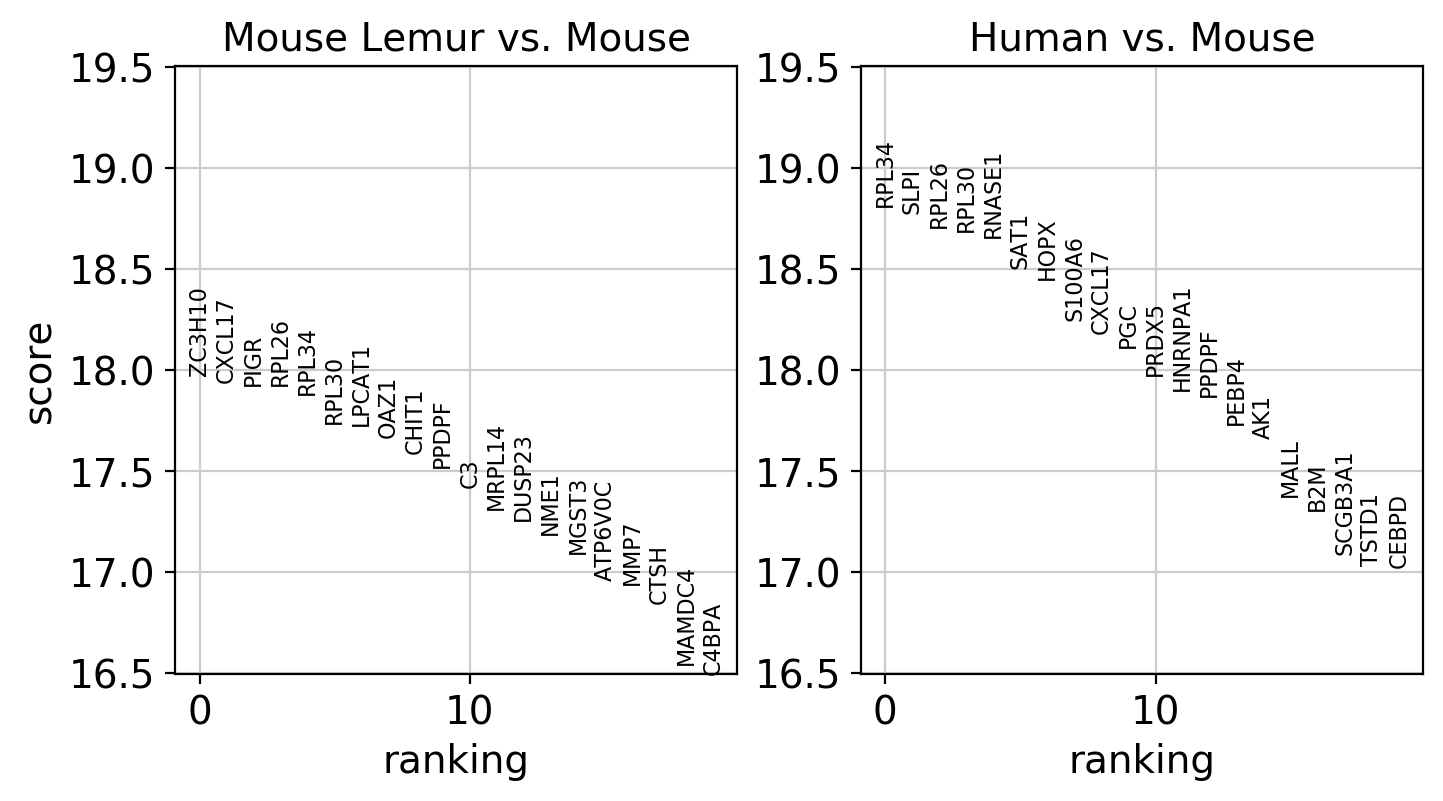

ranking genes



------- group: epithelial: ciliated cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


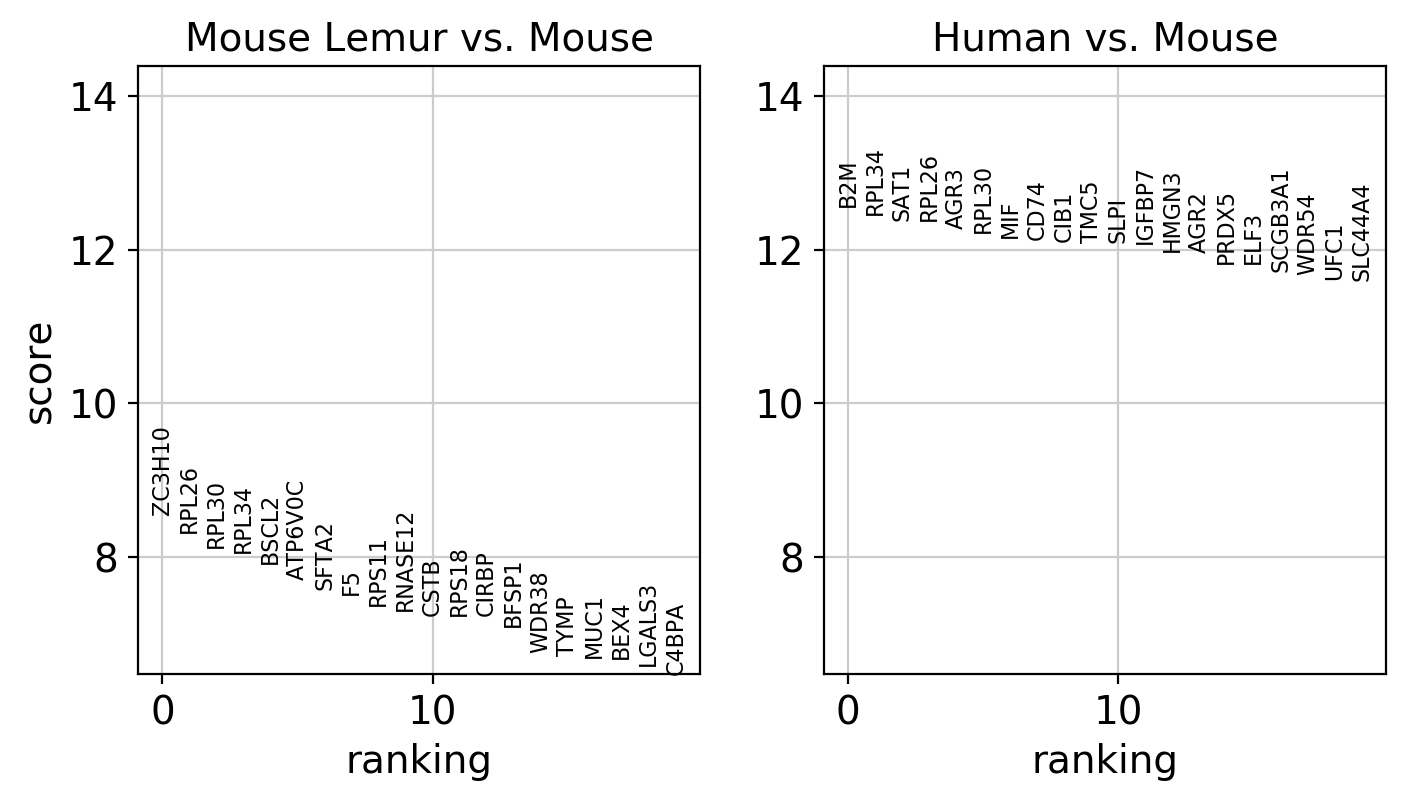

ranking genes



------- group: lymphoid: B cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:05)


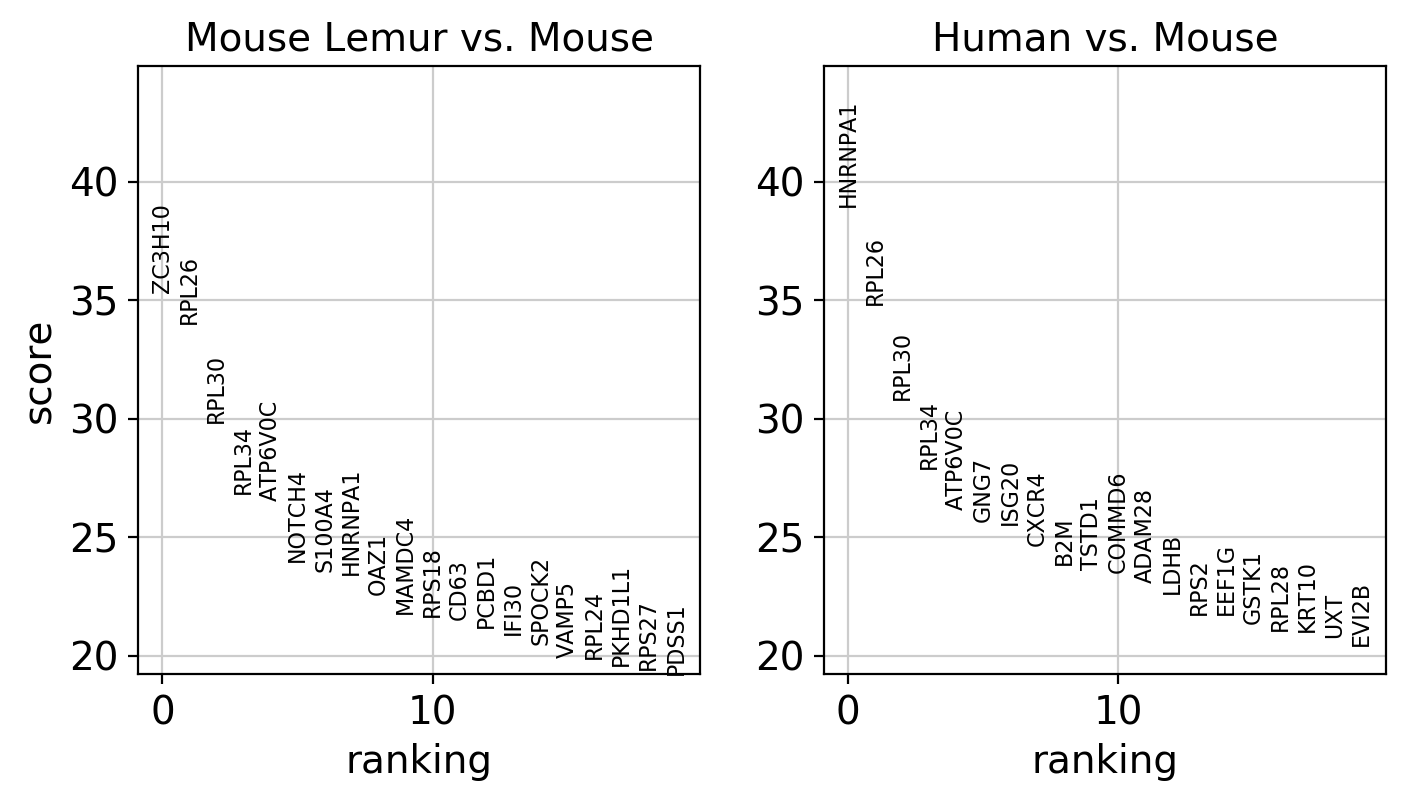

ranking genes



------- group: lymphoid: T cell (CD4+) -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:07)


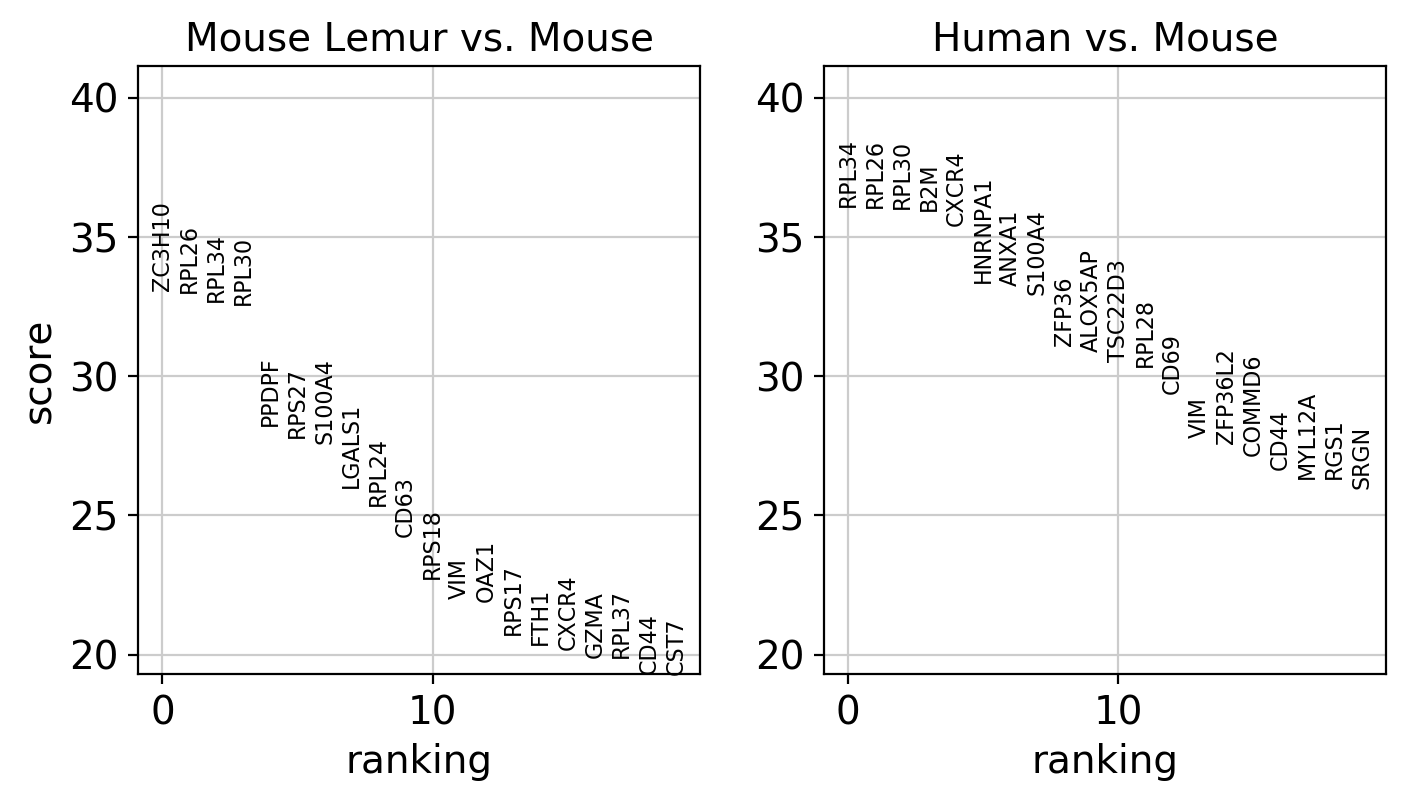

ranking genes



------- group: lymphoid: T cell (CD8+) -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:06)


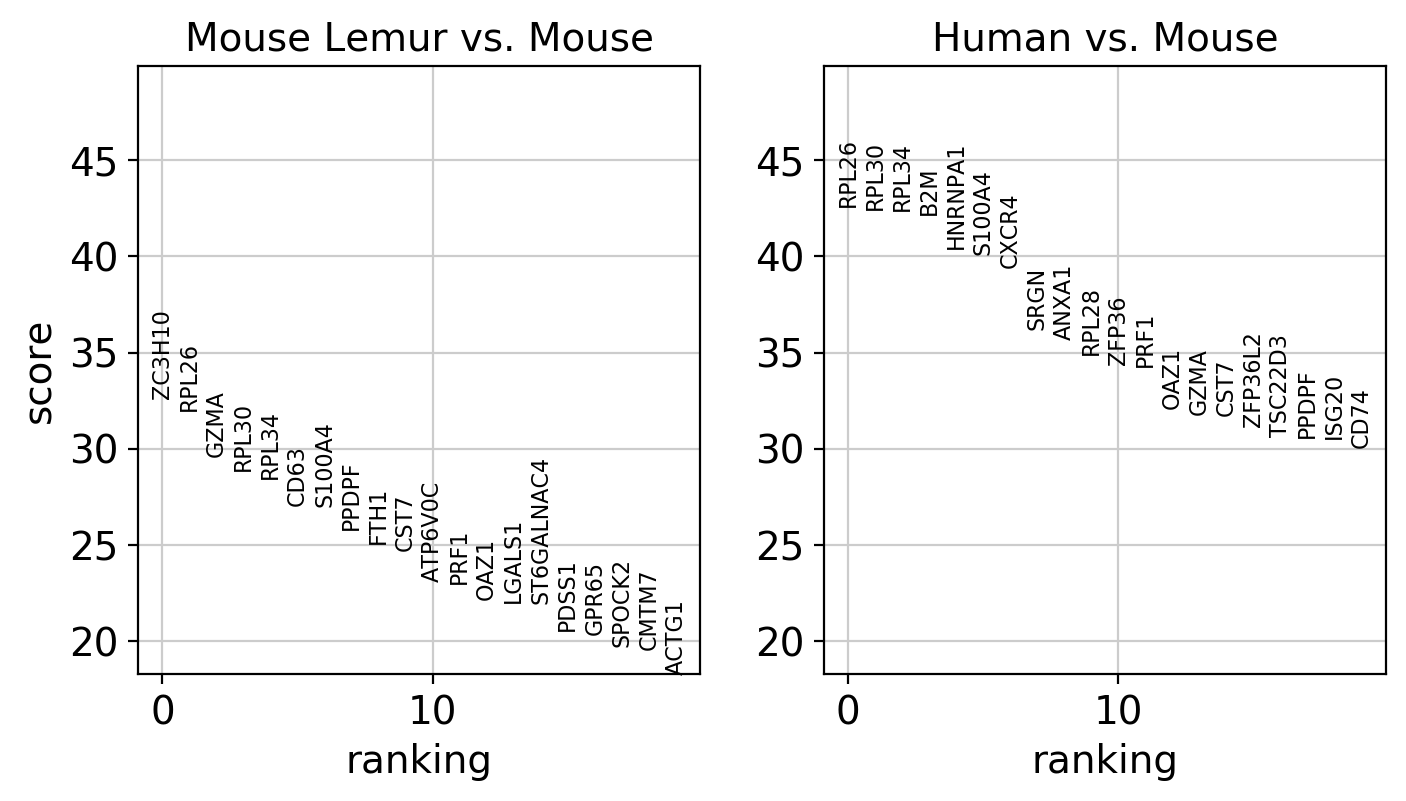

ranking genes



------- group: lymphoid: natural killer T cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


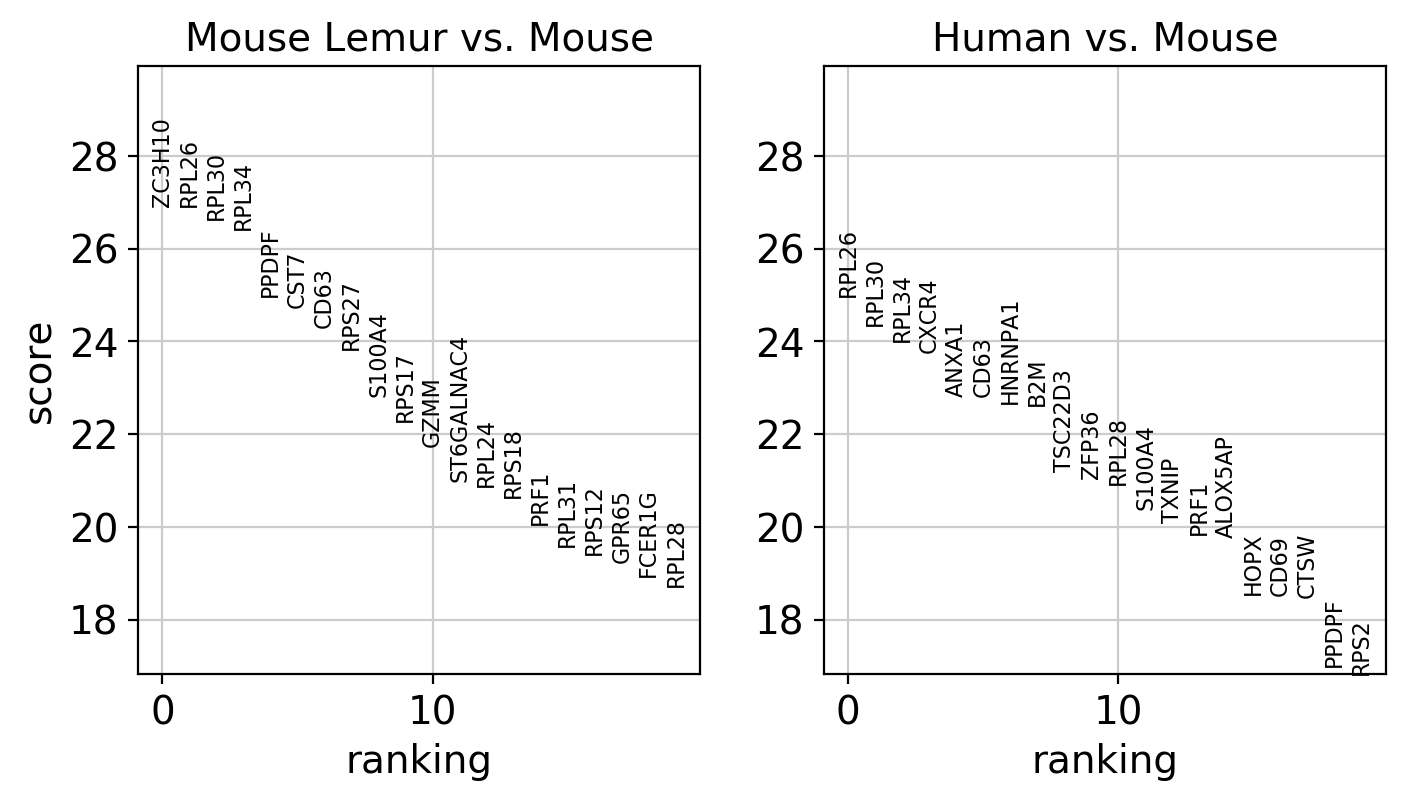

ranking genes



------- group: lymphoid: natural killer cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:15)


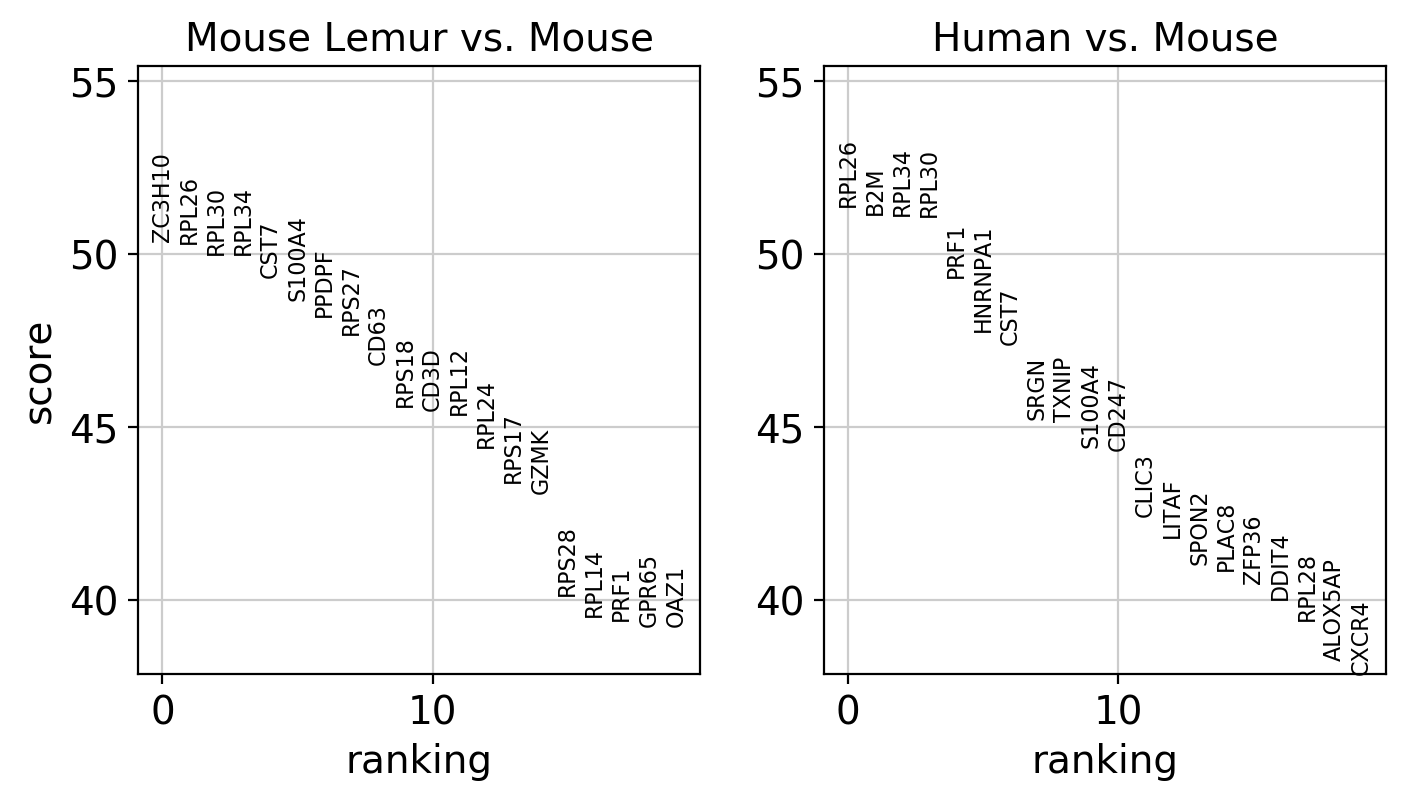

ranking genes



------- group: lymphoid: natural killer cell_T cell (PF) -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


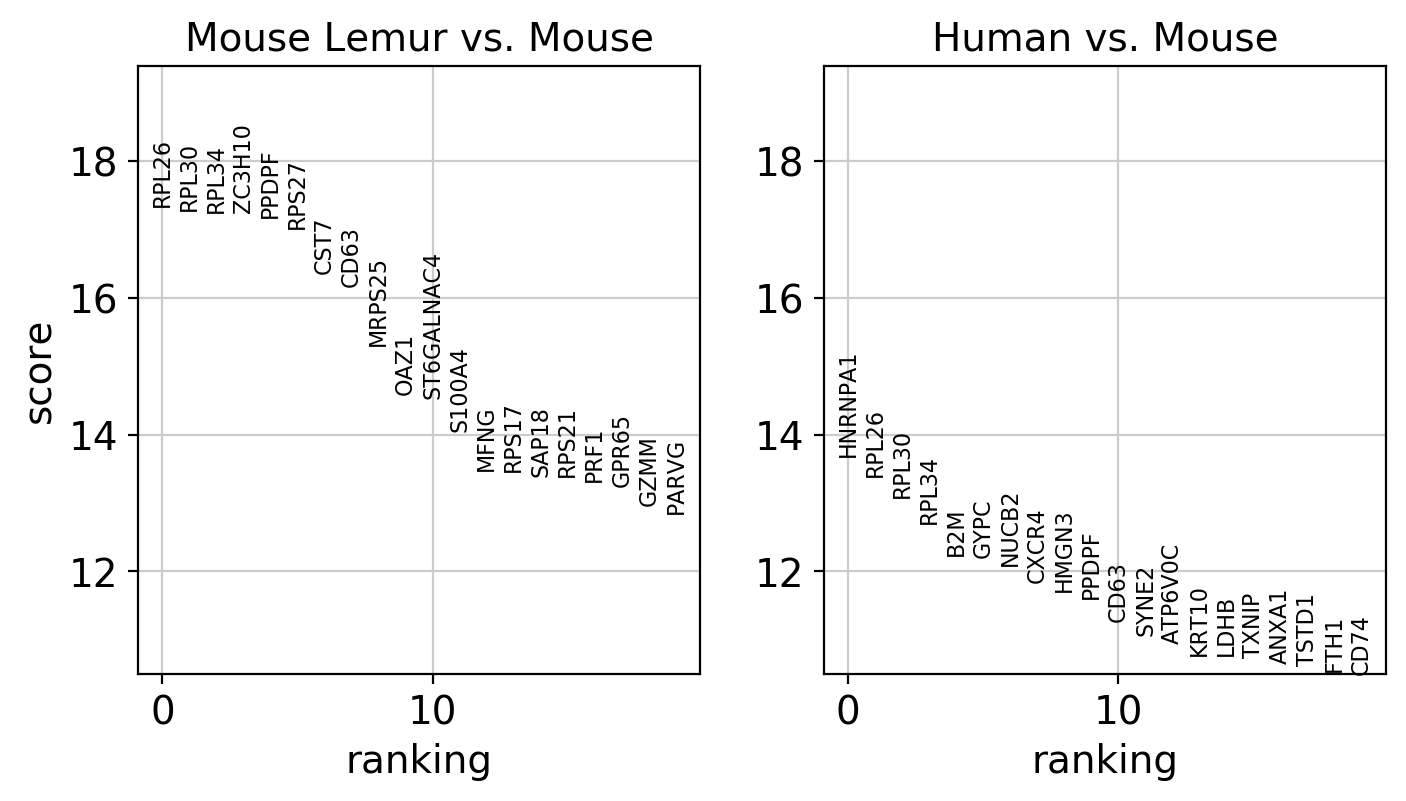

ranking genes



------- group: lymphoid: plasma cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


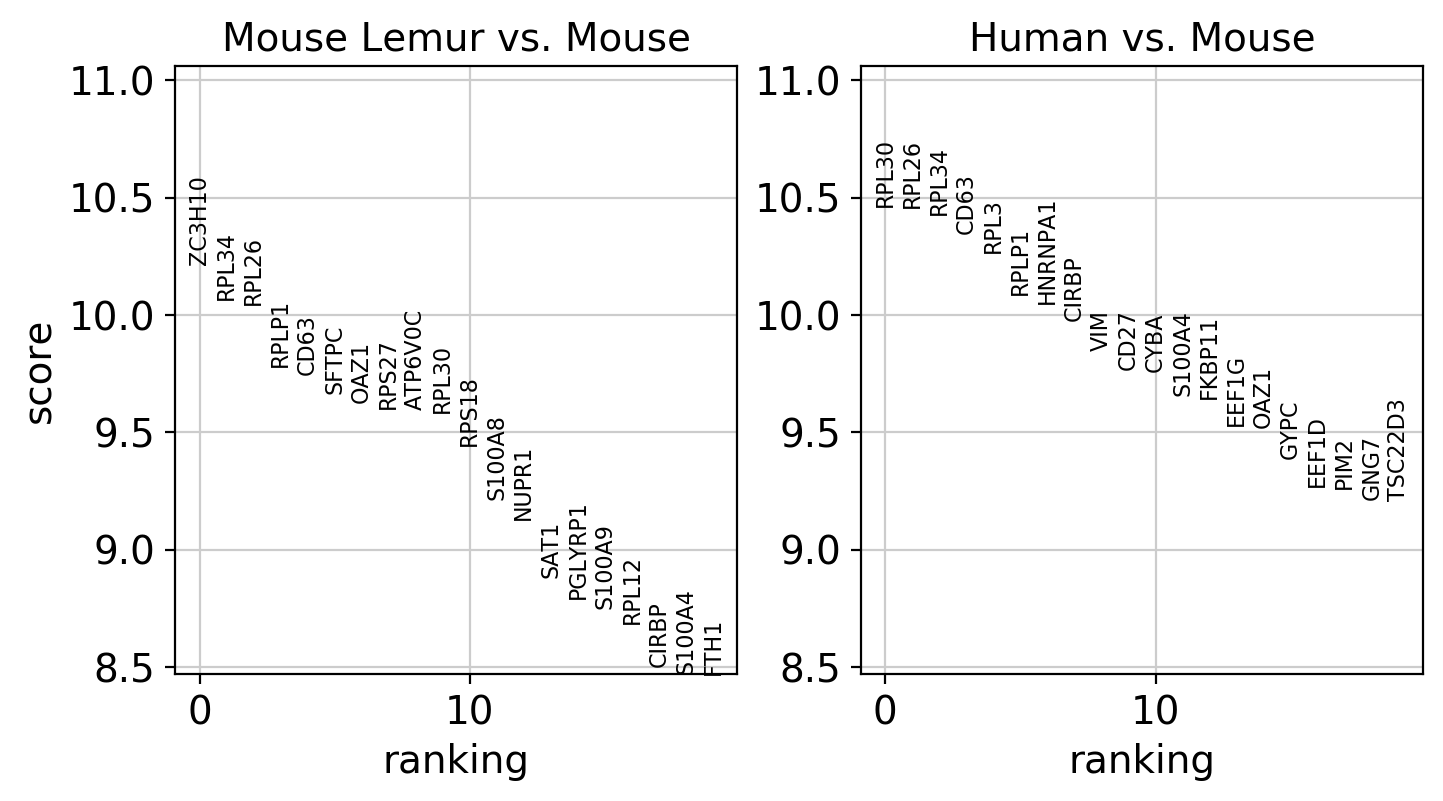

ranking genes



------- group: myeloid: alveolar macrophage -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:49)


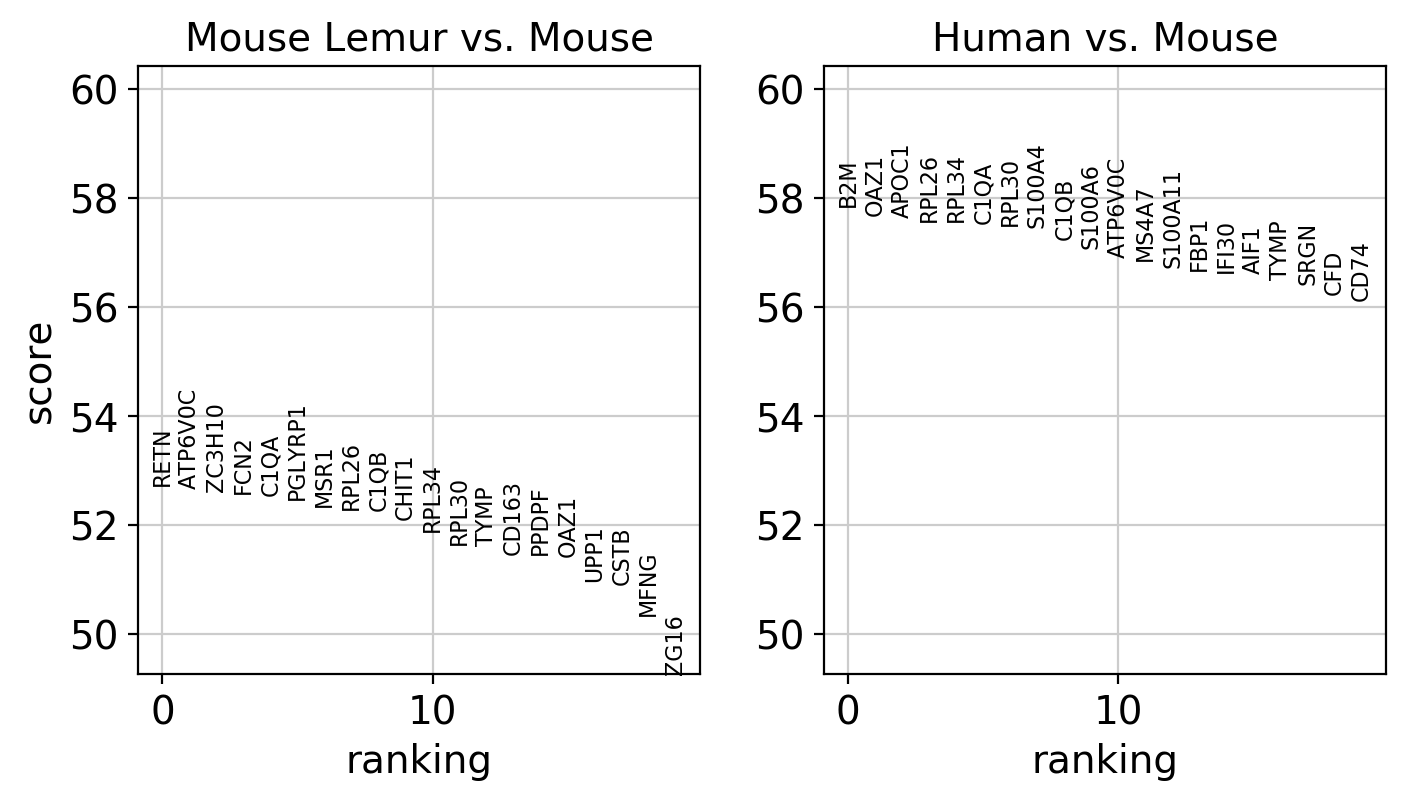

ranking genes



------- group: myeloid: alveolar macrophage (PF) -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


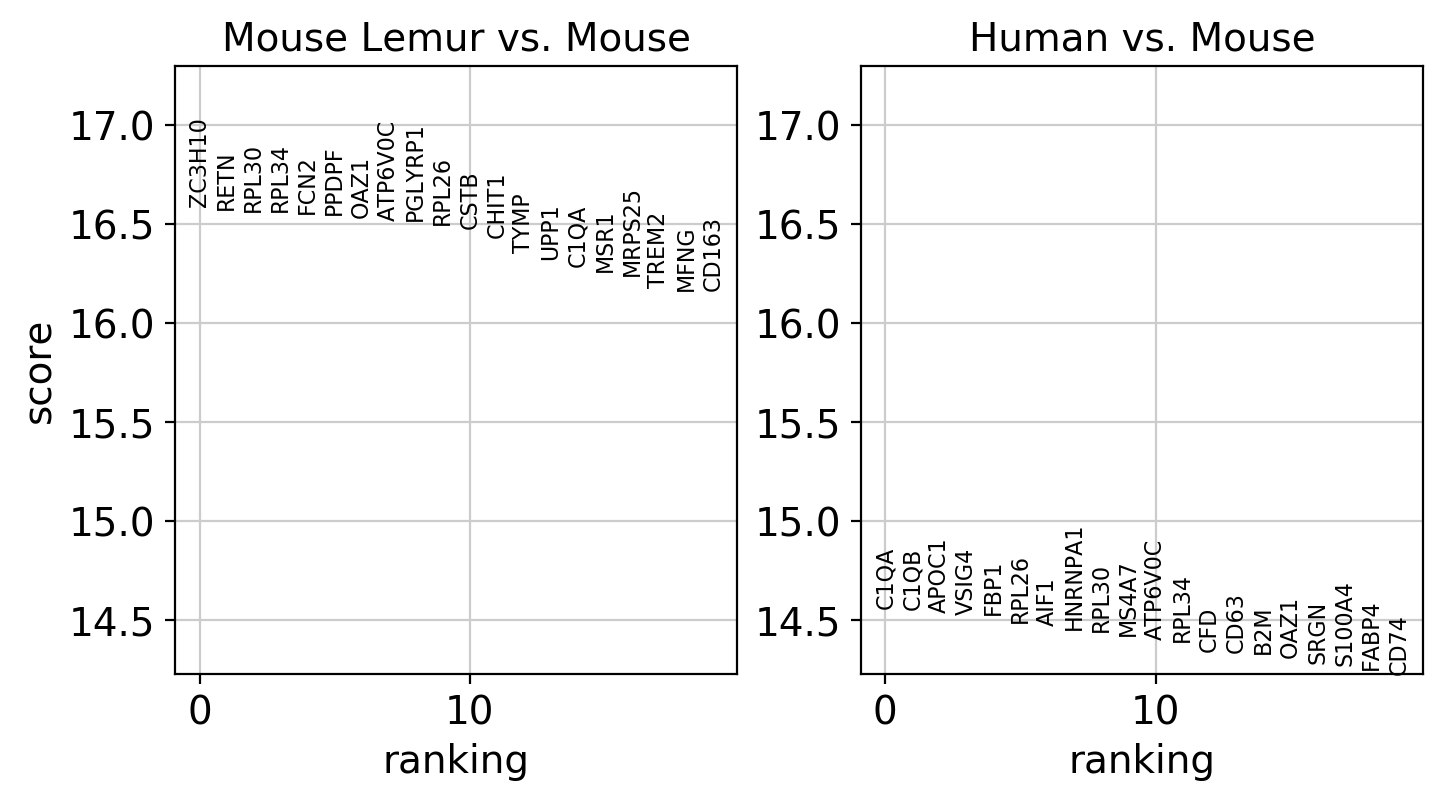

ranking genes



------- group: myeloid: conventional dendritic cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


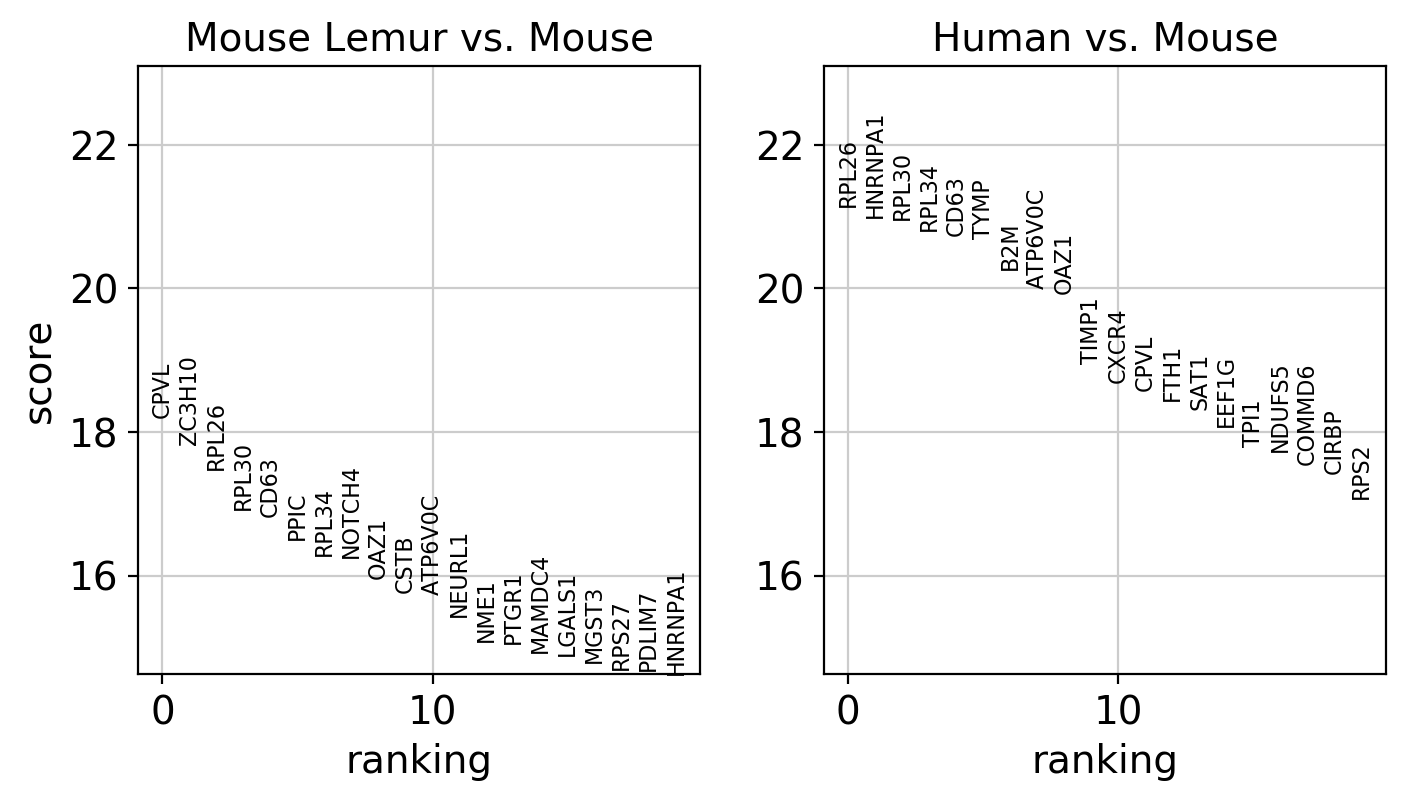

ranking genes



------- group: myeloid: monocyte -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:37)


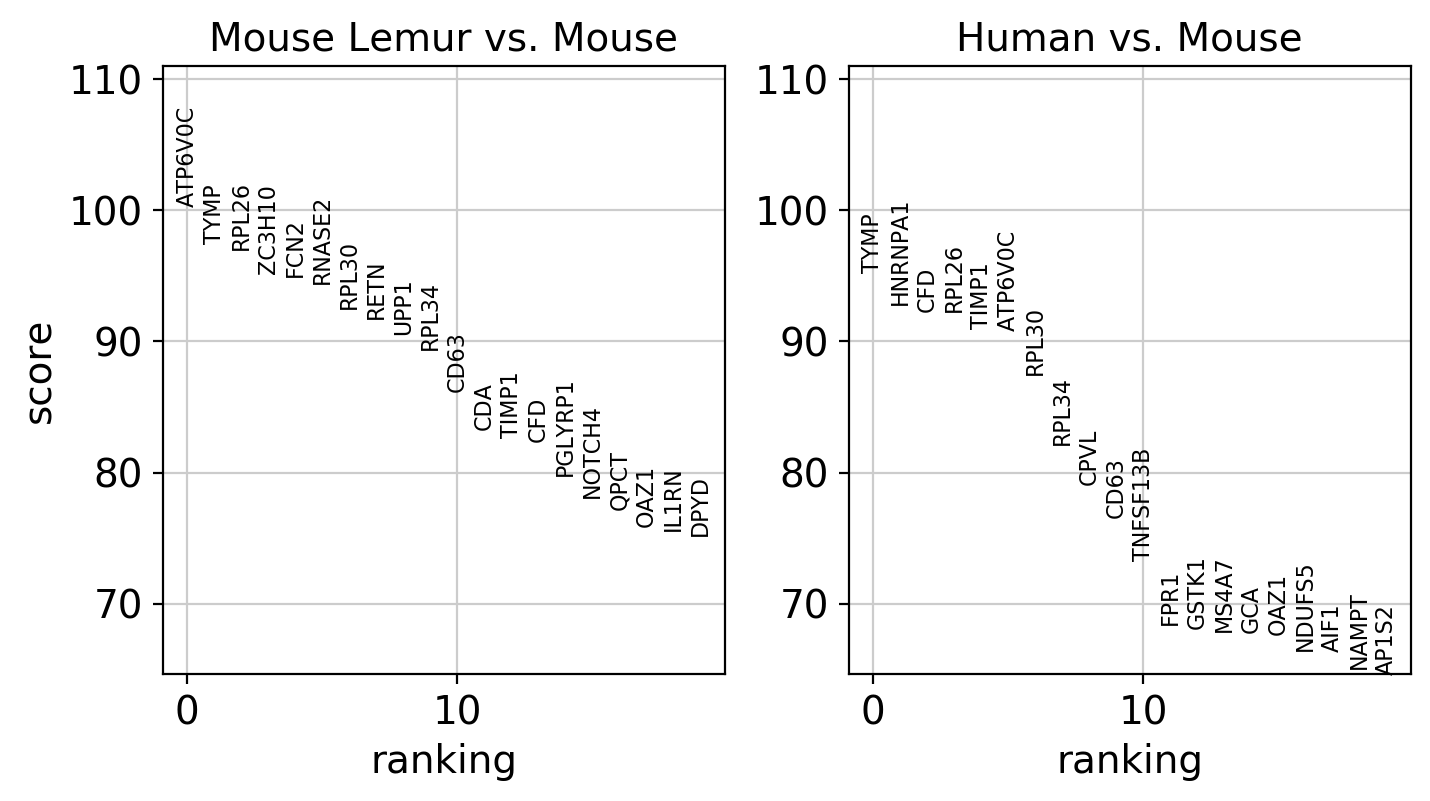

ranking genes



------- group: myeloid: plasmacytoid dendritic cell -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


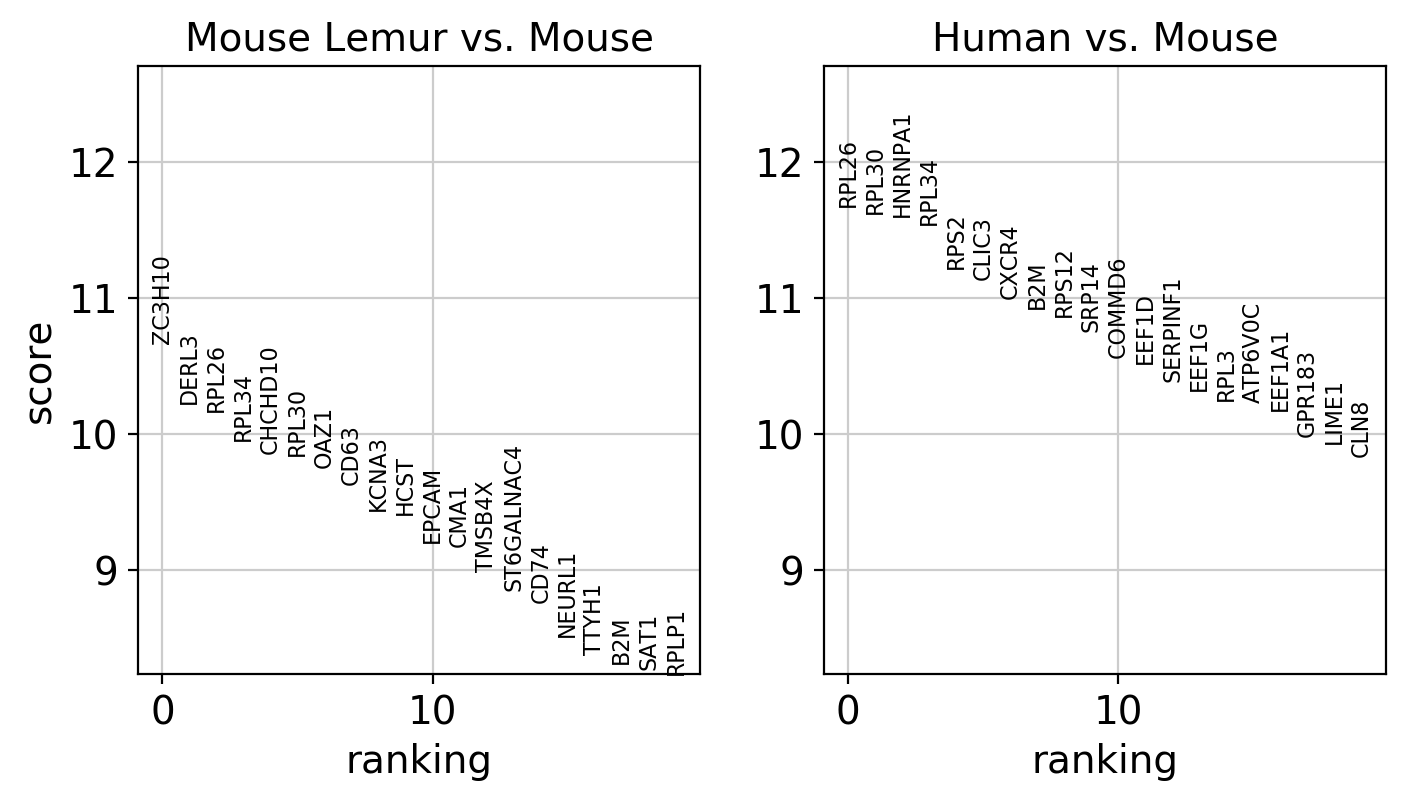

ranking genes



------- group: stromal: adventitial fibroblast -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:03)


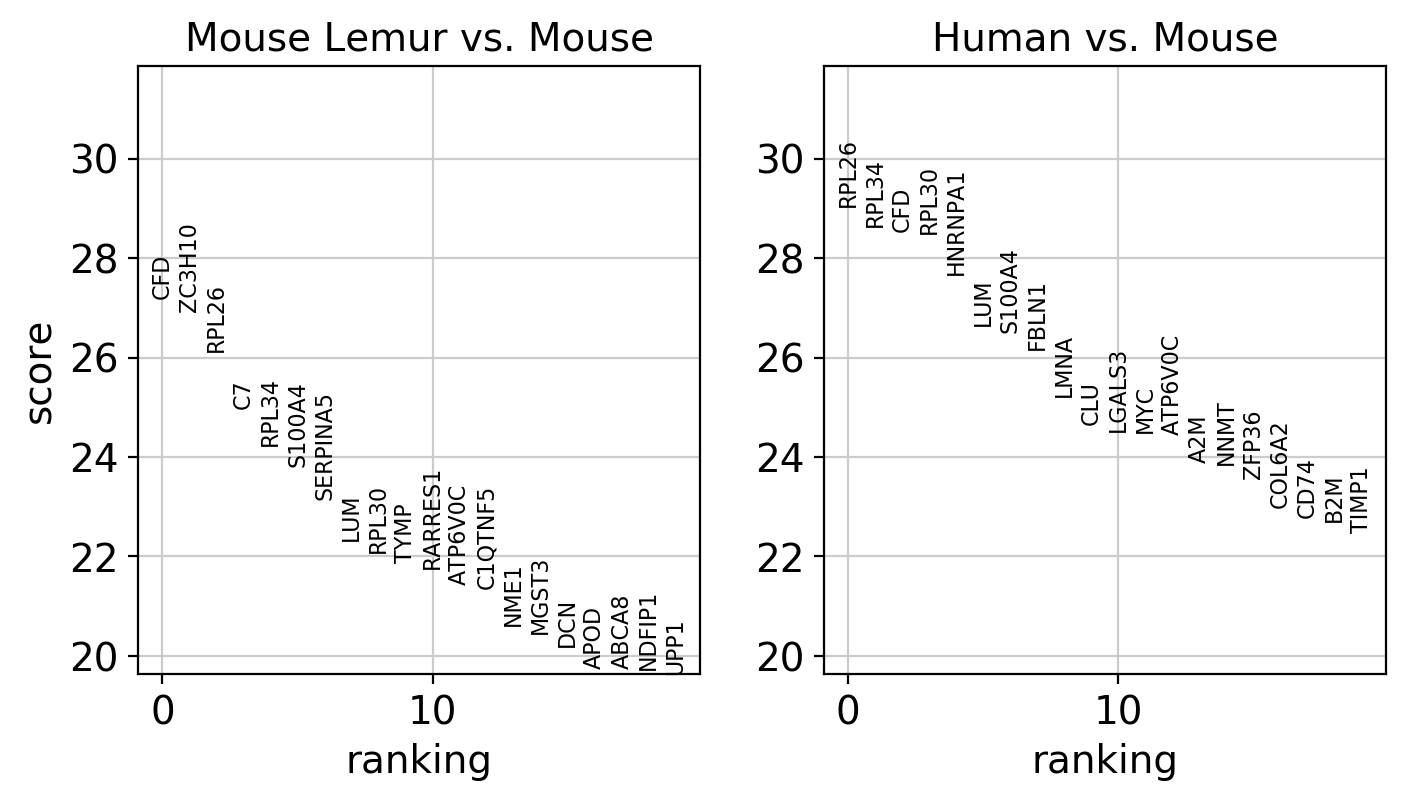

ranking genes



------- group: stromal: alveolar fibroblast -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:10)


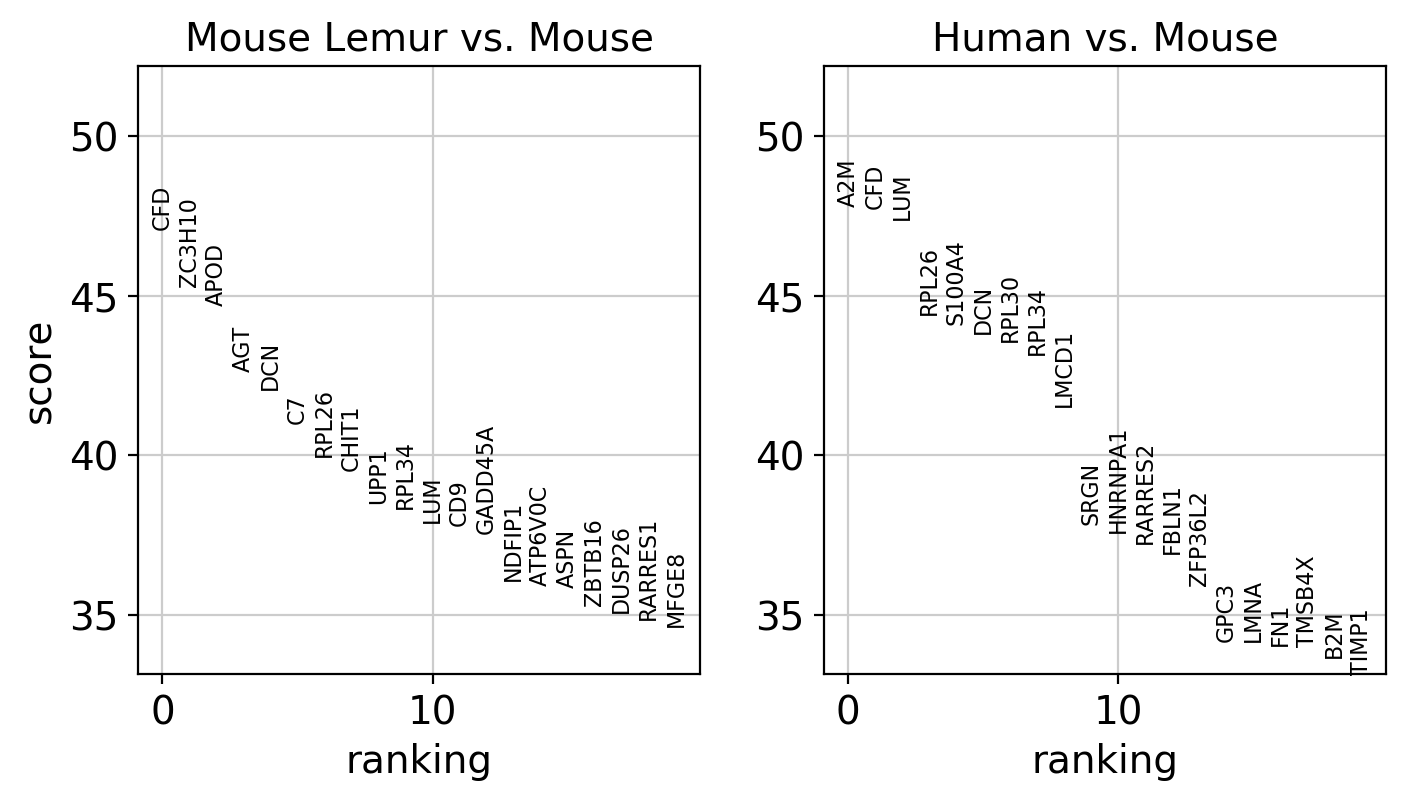

ranking genes



------- group: stromal: pericyte -------


Trying to set attribute `.uns` of view, copying.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/scanpy/tools/_rank_genes_groups.py:289: RuntimeWarning: invalid value encountered in true_divide
  ) / std_dev
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:02)


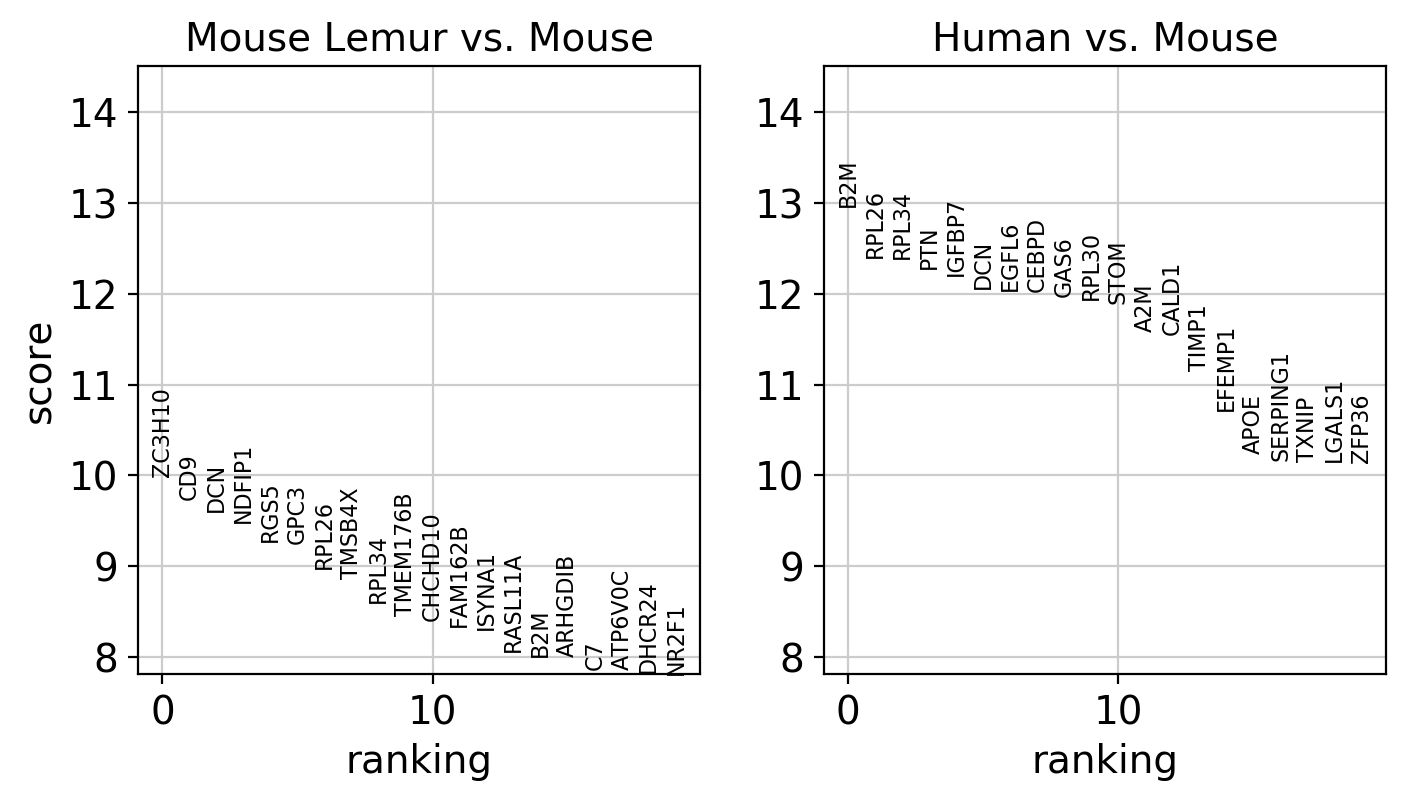

In [13]:
cross_species.do_differential_expression(method='wilcoxon', tie_correct=True, pts=True)

## Get Dissociation genes to ignore

In [14]:
dissociation_genes = set(
    pd.read_csv(
        "/home/olga/data_lg/data_sm_copy/immune-evolution/databases/nuisance-genes/dissociation_genes_3Nov2020.csv",
        index_col=0,
        squeeze=True,
    )
)
len(dissociation_genes)

1880

## Make differential expression results info tables

In [15]:
group_diffexpr_info = {
    group: diffexpr_info 
    for group, diffexpr_info in cross_species.get_per_group_diffexpr_tables(
        dissociation_genes=dissociation_genes
    )
}


------- group: endothelial: artery cell -------

------- group: endothelial: capillary aerocyte cell -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: endothelial: capillary cell -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: endothelial: lymphatic cell -------

------- group: endothelial: vein cell -------

------- group: epithelial: alveolar epithelial cell type 2 -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: epithelial: ciliated cell -------

------- group: lymphoid: B cell -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: lymphoid: T cell (CD4+) -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: lymphoid: T cell (CD8+) -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: lymphoid: natural killer T cell -------

------- group: lymphoid: natural killer cell -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: lymphoid: natural killer cell_T cell (PF) -------

------- group: lymphoid: plasma cell -------

------- group: myeloid: alveolar macrophage -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: myeloid: alveolar macrophage (PF) -------

------- group: myeloid: conventional dendritic cell -------

------- group: myeloid: monocyte -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: myeloid: plasmacytoid dendritic cell -------

------- group: stromal: adventitial fibroblast -------

------- group: stromal: alveolar fibroblast -------


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)



------- group: stromal: pericyte -------


### Write full results to google drive

In [19]:
xlsx_full_data = os.path.join(
    figure_folder_base,
    f"lemur_cross_species__{tissue}__differential_expression_full_results__july2021.xlsx",
)

with pd.ExcelWriter(xlsx_full_data) as writer:
    for group, diffexpr_info in group_diffexpr_info.items():
        print(f"group: {group}")
        sheet_name = group.split(": ")[-1]
        print(f'sheet_name: {sheet_name}')
        diffexpr_info.to_excel(writer, sheet_name=sheet_name)

group: endothelial: artery cell
sheet_name: artery cell
group: endothelial: capillary aerocyte cell
sheet_name: capillary aerocyte cell
group: endothelial: capillary cell
sheet_name: capillary cell
group: endothelial: lymphatic cell
sheet_name: lymphatic cell
group: endothelial: vein cell
sheet_name: vein cell
group: epithelial: alveolar epithelial cell type 2
sheet_name: alveolar epithelial cell type 2
group: epithelial: ciliated cell
sheet_name: ciliated cell
group: lymphoid: B cell
sheet_name: B cell
group: lymphoid: T cell (CD4+)
sheet_name: T cell (CD4+)
group: lymphoid: T cell (CD8+)
sheet_name: T cell (CD8+)
group: lymphoid: natural killer T cell
sheet_name: natural killer T cell
group: lymphoid: natural killer cell
sheet_name: natural killer cell
group: lymphoid: natural killer cell_T cell (PF)
sheet_name: natural killer cell_T cell (PF)
group: lymphoid: plasma cell
sheet_name: plasma cell
group: myeloid: alveolar macrophage
sheet_name: alveolar macrophage
group: myeloid: alveo

### Write filtered results to google drive

In [20]:
xlsx_full_data = os.path.join(
    figure_folder_base,
    f"lemur_cross_species__{tissue}__differential_expression_filtered__pval<0.05__same_logfoldchange_direction__results__july2021.xlsx",
)

with pd.ExcelWriter(xlsx_full_data) as writer:
    for group, diffexpr_info in group_diffexpr_info.items():
        sheet_name = group.split(": ")[-1]
        diffexpr_info_filtered = cross_species.filter_diffexpr_info(diffexpr_info)
        diffexpr_info_filtered.to_excel(writer, sheet_name=sheet_name)

## Concatenate differential expression info

In [18]:
dfs = []

for group, diffexpr_info in group_diffexpr_info.items():
    df = diffexpr_info.copy()
    df['group'] = group
    dfs.append(df)
diffexpr_aggregated = pd.concat(dfs)
diffexpr_aggregated.index.name = 'gene_name'
diffexpr_aggregated.head()

logfoldchange                  pval_adj              \
species           Human Mouse Lemur         Human Mouse Lemur   
gene_name                                                       
A1BG          26.216629    0.000000  2.806622e-01      1.0000   
A1CF           0.000000    0.000000  1.000000e+00      1.0000   
A2M           46.026421    0.000000  2.460119e-45      1.0000   
A3GALT2        0.000000    0.000000  1.000000e+00      1.0000   
A4GALT         2.866803  -28.459358  9.237459e-05      0.0215   

          pval_adj_neg_log10                  score              \
species                Human Mouse Lemur      Human Mouse Lemur   
gene_name                                                         
A1BG                0.551816    0.000000   1.542726    0.000000   
A1CF                0.000000    0.000000   0.000000    0.000000   
A2M                44.609044    0.000000  14.448993    0.000000   
A3GALT2             0.000000    0.000000   0.000000    0.000000   
A4GALT              4.034447    1.667556   4.341513   -2.941724   

          percent_expressing                       is_dissociation_gene  \
species                Mouse Mouse Lemur     Human                        
gene_name                                                                 
A1BG                0.000000         0.0  0.024502                False   
A1CF                0.000000         0.0  0.000000                False   
A2M                 0.000000         0.0  0.884380                False   
A3GALT2             0.000000         0.0  0.000000                False   
A4GALT              0.105263         0.0  0.314701                False   

                              group  
species                              
gene_name                            
A1BG       endothelial: artery cell  
A1CF       endothelial: artery cell  
A2M        endothelial: artery cell  
A3GALT2    endothelial: artery cell  
A4GALT     endothelial: artery cell

### Filter on percent of cells expressing

In [124]:
%%time


def filter_percent_expressing(
    df,
    higher_expression_threshold=0.01,
    lower_expression_threshold=0.00,
    lfc="logfoldchange",
    human="Human",
    mouse="Mouse",
    lemur="Mouse Lemur",
    pct_exp="percent_expressing",
):
    assert len(df.index) == 1
    # "should" always be one row at a time
    row = df.iloc[0]
    if (row[pct_exp] >= lower_expression_threshold).all():

        human_pct = row[(pct_exp, human)]
        mouse_pct = row[(pct_exp, mouse)]
        lemur_pct = row[(pct_exp, lemur)]

        if (
            row[(lfc, human)] > 0
            and human_pct >= higher_expression_threshold
        ):
            # Positive logfoldchange in human --> must be above threshold in human
            return True
        elif (
            row[(lfc, lemur)] > 0
            and lemur_pct >= higher_expression_threshold
        ):
            # Positive logfoldchange in lemur --> must be above threshold in lemur
            return True
        elif (
            row[(lfc, human)] < 0
            and row[(pct_exp, mouse)] >= higher_expression_threshold
        ):
            # Neglogfold change in human --> must be above threshold in mouse
            return True
        elif (
            row[(lfc, lemur)] < 0
            and row[(pct_exp, mouse)] >= higher_expression_threshold
        ):
            # Neglogfold change in lemur --> must be above threshold in mouse
            return True
        else:
            return False
    else:
        False


diffexpr_aggregated_pct_expr_filtered = diffexpr_aggregated.groupby(
    ["gene_name", "group"], axis=0
).filter(filter_percent_expressing)
print(diffexpr_aggregated_pct_expr_filtered.shape)
diffexpr_aggregated_pct_expr_filtered.head()

(49626, 13)
CPU times: user 2min 51s, sys: 1.52 s, total: 2min 53s
Wall time: 2min 52s


logfoldchange                  pval_adj              \
species           Human Mouse Lemur         Human Mouse Lemur   
gene_name                                                       
AAMP          -0.132547   -0.659595  4.322153e-01    0.008193   
ABCF1          1.498429    2.470202  1.403500e-01    1.000000   
ABHD14B       -0.558882    0.941331  3.048361e-01    0.794761   
ABHD16A       -2.976946   -0.355067  3.293465e-17    0.013483   
ABI3          -3.305128   -2.960180  1.338028e-10    0.000083   

          pval_adj_neg_log10                 score              \
species                Human Mouse Lemur     Human Mouse Lemur   
gene_name                                                        
AAMP                0.364300    2.086551 -1.240309   -3.298674   
ABCF1               0.852787    0.000000  1.941736    0.328443   
ABHD14B             0.515934    0.099763 -1.488117   -0.708860   
ABHD16A            16.482347    1.870198 -8.801326   -3.123581   
ABI3                9.873535    4.078849 -6.815435   -4.615135   

          percent_expressing                       is_dissociation_gene  \
species                Mouse Mouse Lemur     Human                        
gene_name                                                                 
AAMP                0.431579    0.141026  0.345329                False   
ABCF1               0.157895    0.153846  0.235069                False   
ABHD14B             0.189474    0.128205  0.133997                False   
ABHD16A             0.494737    0.179487  0.149311                 True   
ABI3                0.463158    0.102564  0.189127                False   

                              group  
species                              
gene_name                            
AAMP       endothelial: artery cell  
ABCF1      endothelial: artery cell  
ABHD14B    endothelial: artery cell  
ABHD16A    endothelial: artery cell  
ABI3       endothelial: artery cell

In [125]:
diffexpr_aggregated.shape

(287232, 13)

In [126]:
unfiltered = (
    diffexpr_aggregated.logfoldchange.replace(0, np.nan)
    .dropna(how="all")
    .values.flatten()
)
unfiltered = unfiltered[np.isfinite(unfiltered)]

after_filtering = (
    diffexpr_aggregated_pct_expr_filtered.logfoldchange.replace(0, np.nan)
    .dropna(how="all")
    .values.flatten()
)
after_filtering = after_filtering[np.isfinite(after_filtering)]

[None]

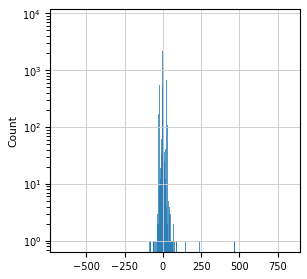

In [127]:
fig, ax = plt.subplots()
sns.histplot(unfiltered, label="unfiltered")
sns.histplot(after_filtering, label="after filtering for % cells expressing")
ax.set(yscale='log')

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing 

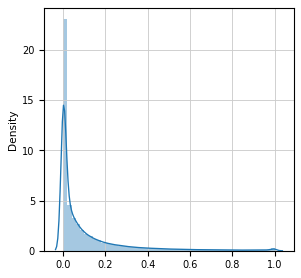

In [128]:
sns.distplot(diffexpr_aggregated['percent_expressing'])

## Volcano plot (pval vs logfoldchange)

### Reformat to tidy dataframe

In [30]:
diffexpr_aggregated_tidy = diffexpr_aggregated_pct_expr_filtered.stack().reset_index()
diffexpr_aggregated_tidy["species"] = diffexpr_aggregated_tidy["species"].replace(
    "", np.nan
)
diffexpr_aggregated_tidy.is_dissociation_gene = (
    diffexpr_aggregated_tidy.is_dissociation_gene.fillna(method="backfill")
)
diffexpr_aggregated_tidy.group = diffexpr_aggregated_tidy.group.fillna(
    method="backfill"
)
diffexpr_aggregated_tidy = diffexpr_aggregated_tidy.query(
    "is_dissociation_gene == False"
)
diffexpr_aggregated_tidy = diffexpr_aggregated_tidy.rename(
    columns={"level_0": "gene_name"}
)

# diffexpr_aggregated_tidy = diffexpr_aggregated_tidy.dropna()
diffexpr_aggregated_tidy.head()

gene_name      species                     group is_dissociation_gene  \
0    ABLIM1          NaN  endothelial: artery cell                False   
1    ABLIM1        Human  endothelial: artery cell                False   
2    ABLIM1        Mouse  endothelial: artery cell                False   
3    ABLIM1  Mouse Lemur  endothelial: artery cell                False   
4       ACE          NaN  endothelial: artery cell                False   

   logfoldchange  percent_expressing      pval_adj  pval_adj_neg_log10  \
0            NaN                 NaN           NaN                 NaN   
1      -3.260083            0.326187  1.061776e-09            8.973967   
2            NaN            0.610526           NaN                 NaN   
3      -2.025281            0.230769  9.730581e-04            3.011861   
4            NaN                 NaN           NaN                 NaN   

      score  
0       NaN  
1 -6.496931  
2       NaN  
3 -3.973090  
4       NaN

## Plot distributions

### Wilcoxon statistical score

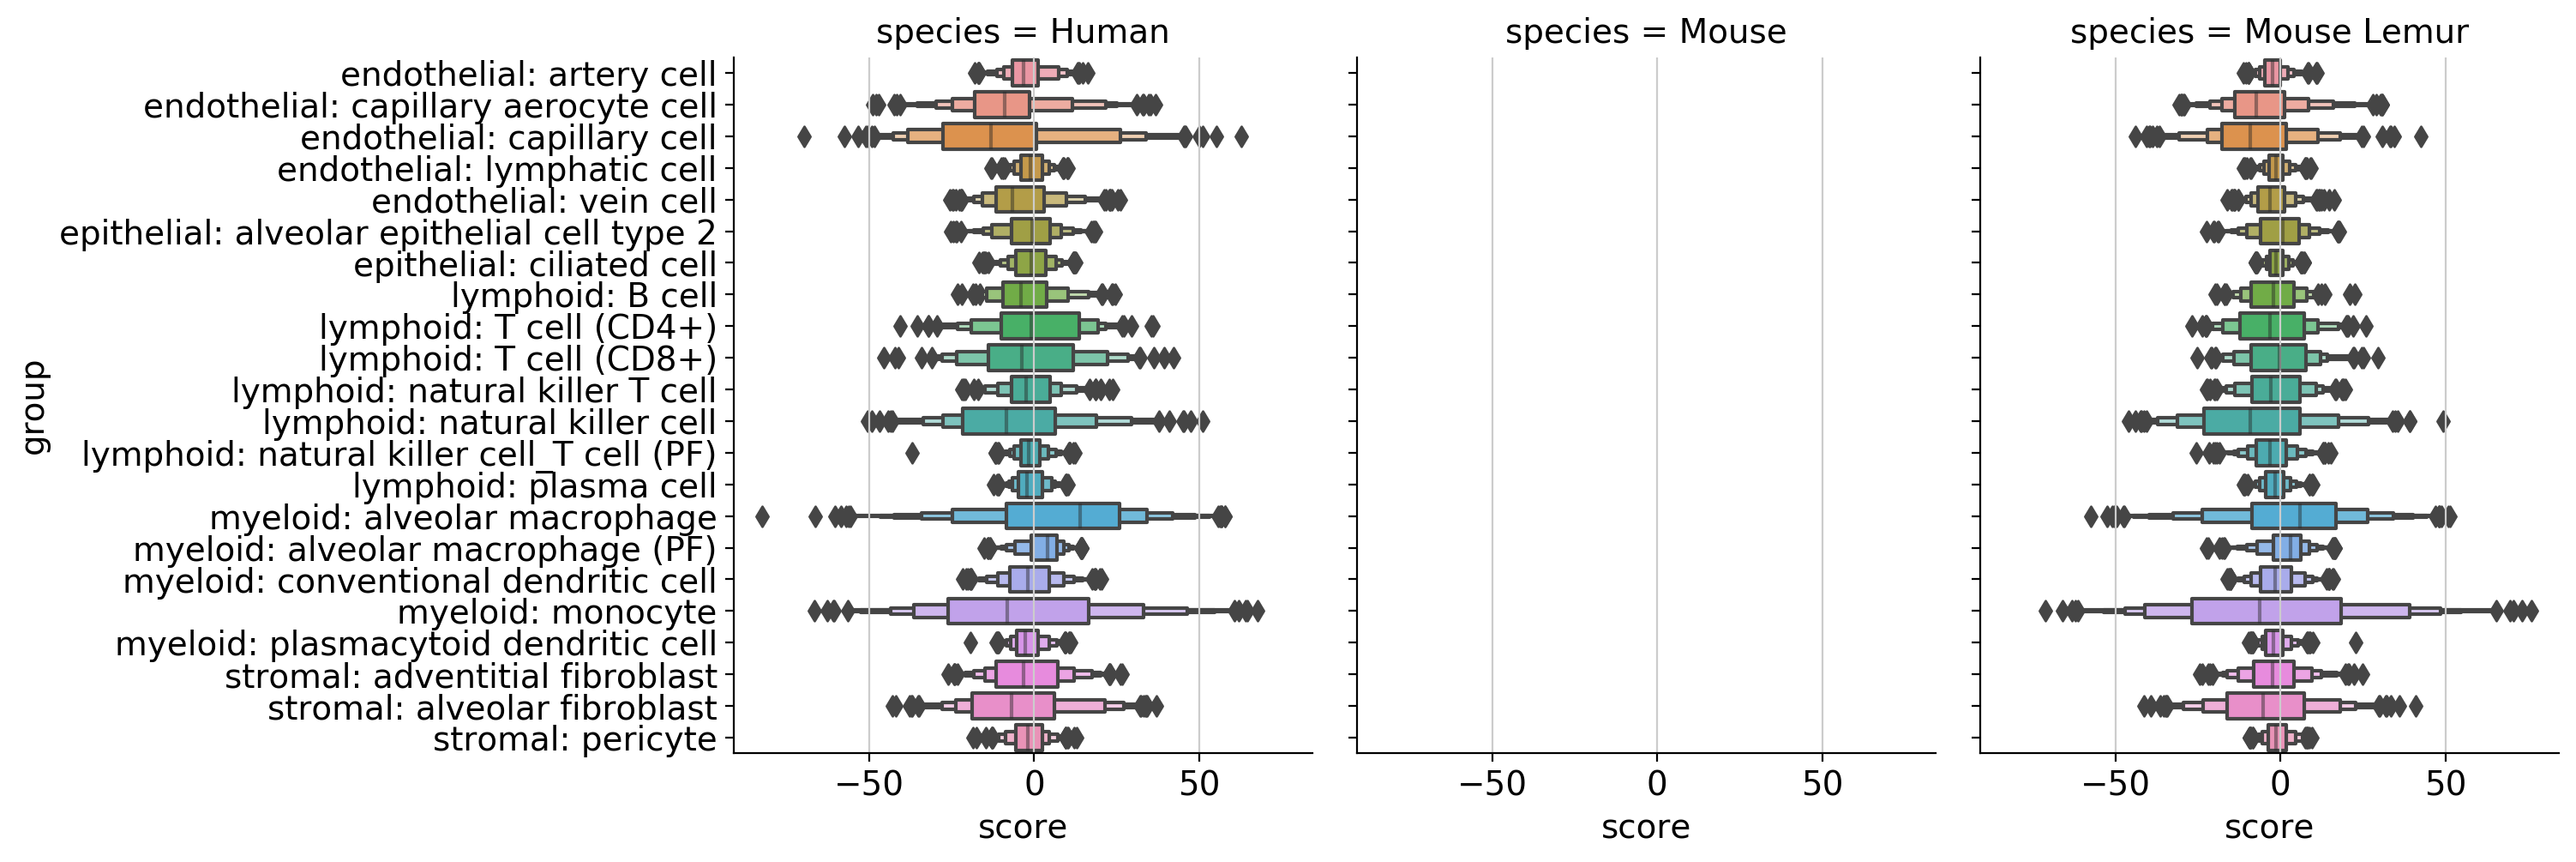

In [31]:
sns.catplot(y='group', x='score', data=diffexpr_aggregated_tidy, col='species', kind='boxen')

### Logfoldchange

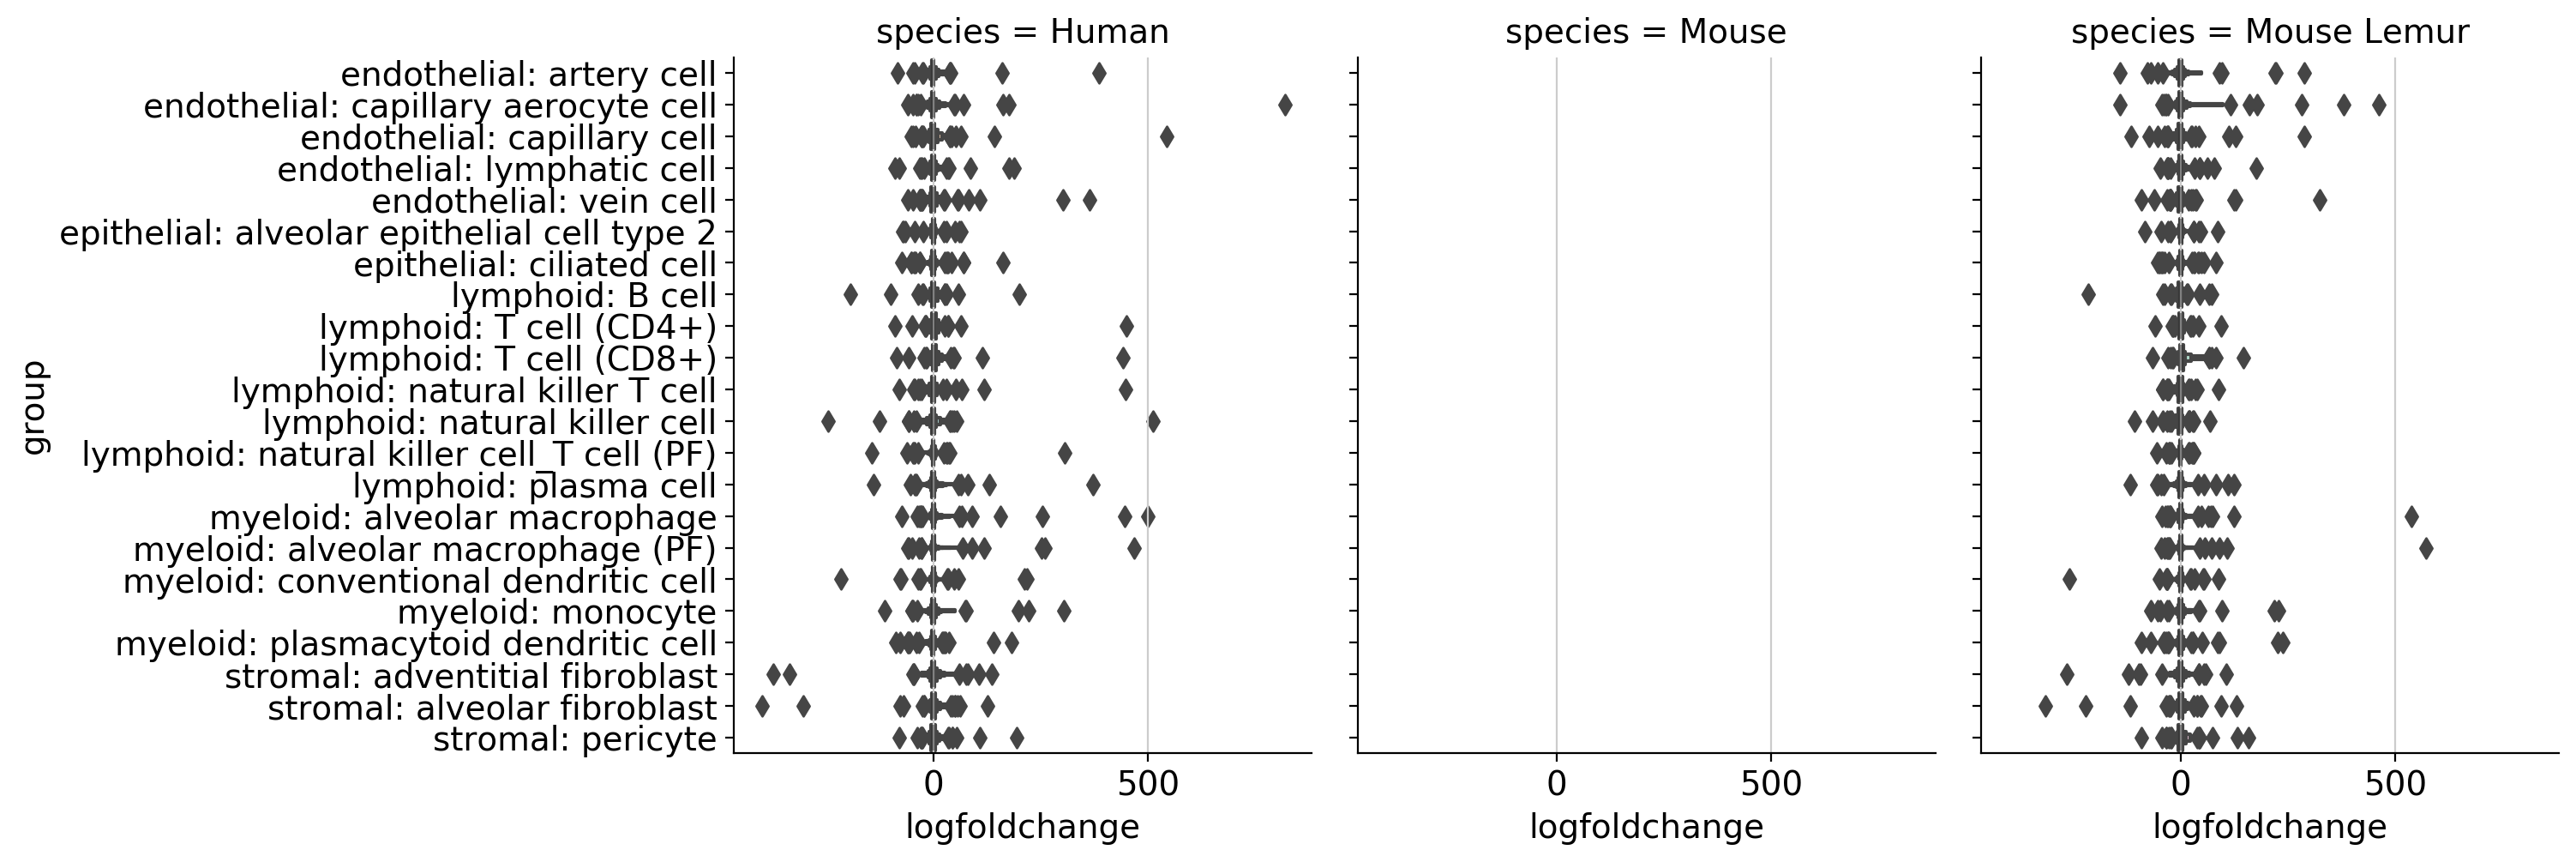

In [32]:
sns.catplot(y='group', x='logfoldchange', data=diffexpr_aggregated_tidy, col='species', kind='boxen')

### Percent expressing

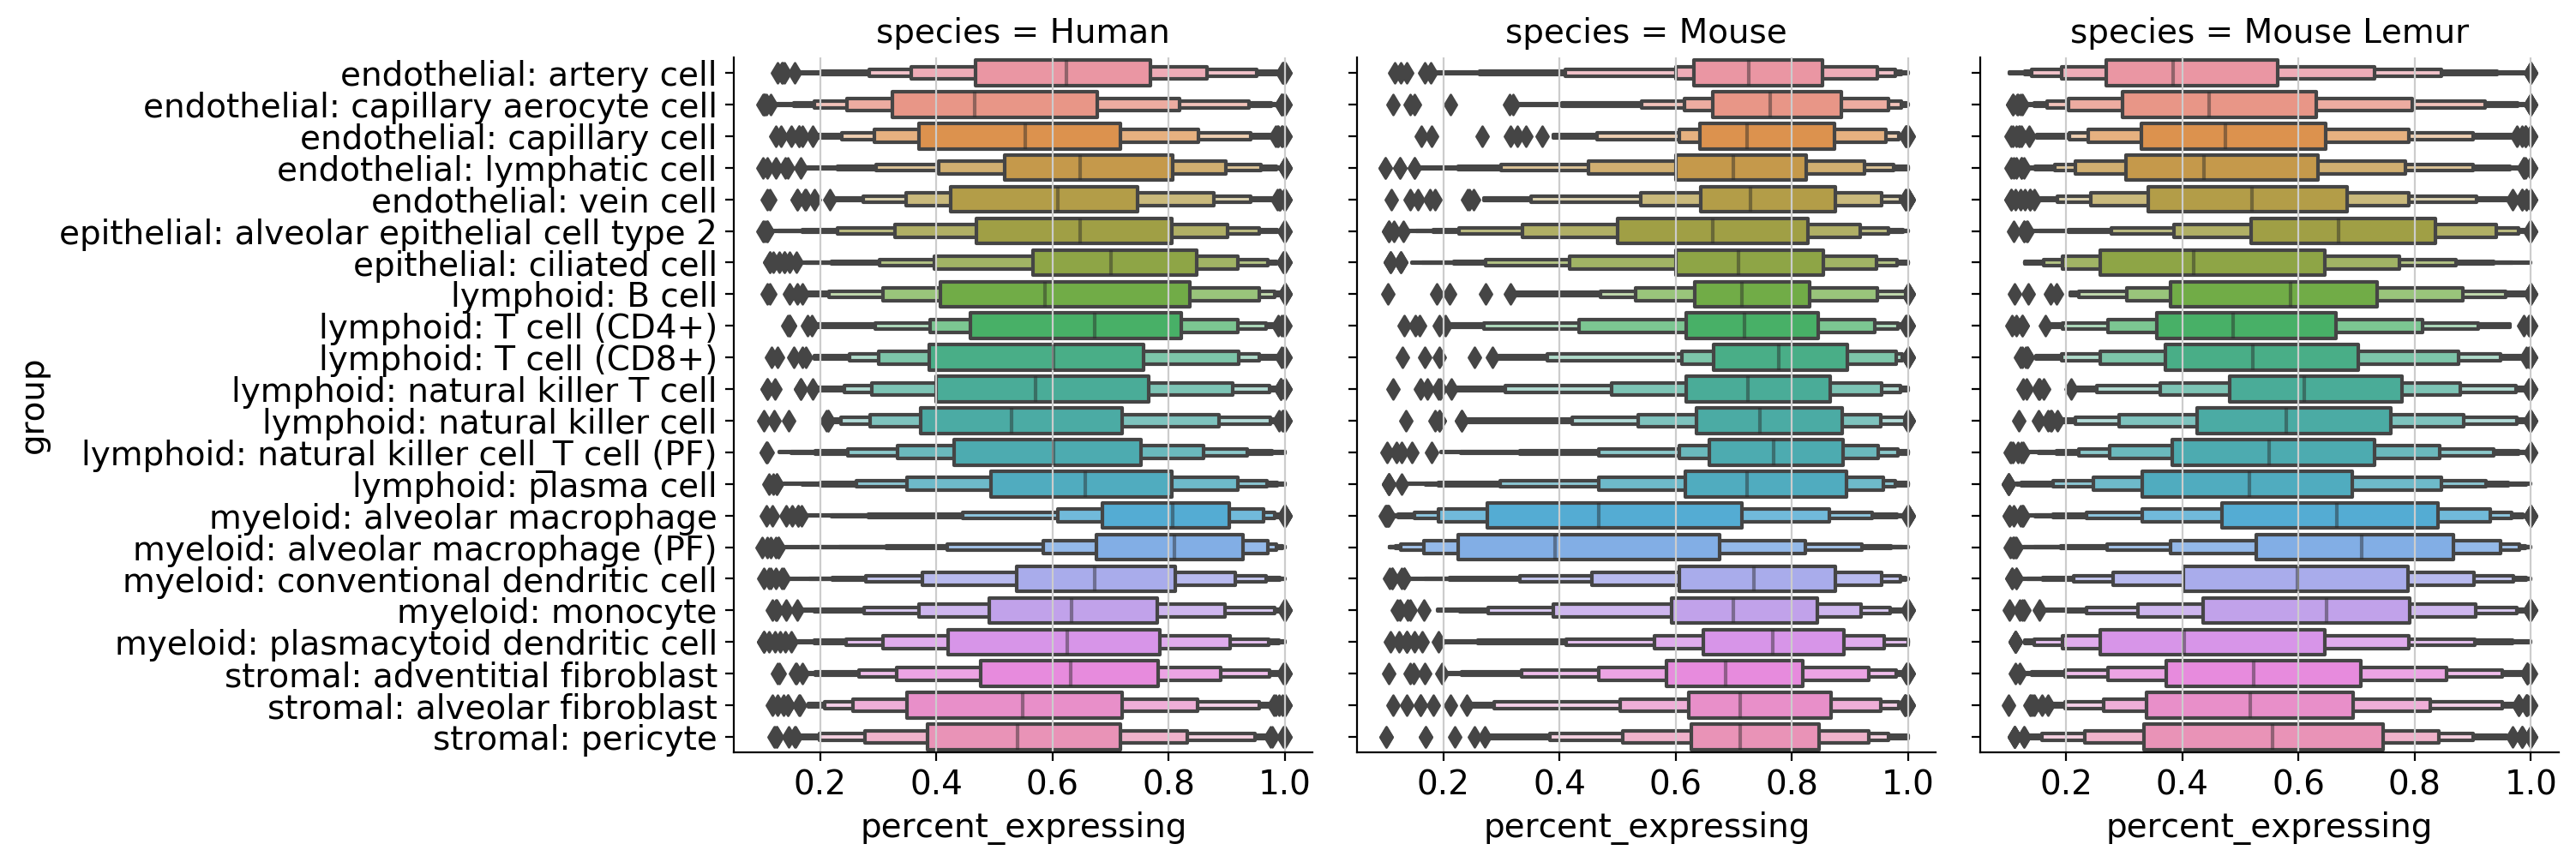

In [33]:
sns.catplot(y='group', x='percent_expressing', data=diffexpr_aggregated_tidy, col='species', kind='boxen')

### -log(pvalue_adj)

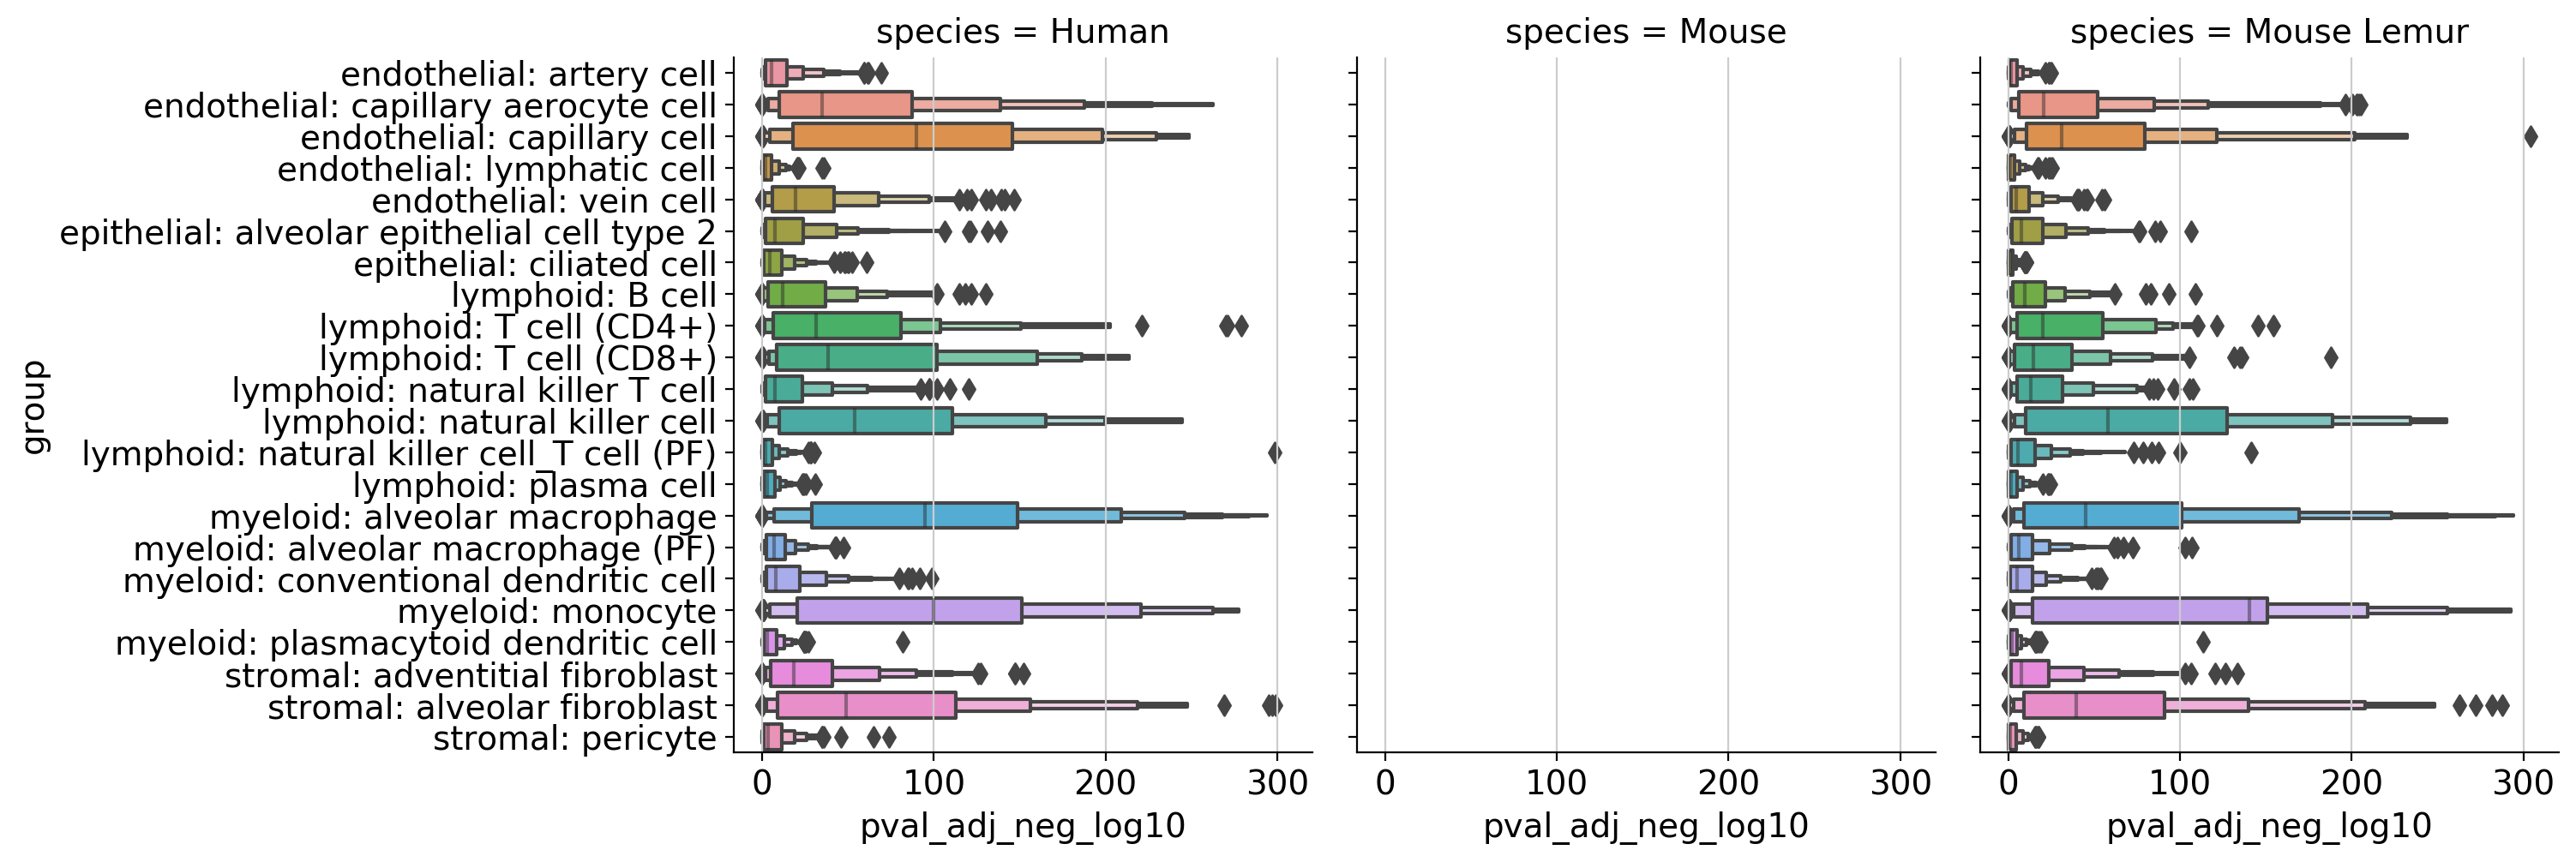

In [34]:
sns.catplot(y='group', x='pval_adj_neg_log10', data=diffexpr_aggregated_tidy, col='species', kind='boxen')

In [35]:
# diffexpr_aggregated_tidy.groupby(['group', 'gene_name']).apply(lambda x: )

In [36]:
diffexpr_aggregated_tidy

gene_name      species                     group is_dissociation_gene  \
0        ABLIM1          NaN  endothelial: artery cell                False   
1        ABLIM1        Human  endothelial: artery cell                False   
2        ABLIM1        Mouse  endothelial: artery cell                False   
3        ABLIM1  Mouse Lemur  endothelial: artery cell                False   
4           ACE          NaN  endothelial: artery cell                False   
...         ...          ...                       ...                  ...   
59828     YWHAQ          NaN         stromal: pericyte                False   
59829     YWHAQ        Human         stromal: pericyte                False   
59830     YWHAQ        Mouse         stromal: pericyte                False   
59831     YWHAQ  Mouse Lemur         stromal: pericyte                False   
59832      ZEB2          NaN         stromal: pericyte                False   

       logfoldchange  percent_expressing      pval_adj  pval_adj_neg_log10  \
0                NaN                 NaN           NaN                 NaN   
1          -3.260083            0.326187  1.061776e-09            8.973967   
2                NaN            0.610526           NaN                 NaN   
3          -2.025281            0.230769  9.730581e-04            3.011861   
4                NaN                 NaN           NaN                 NaN   
...              ...                 ...           ...                 ...   
59828            NaN                 NaN           NaN                 NaN   
59829      -4.755897            0.518519  3.794744e-06            5.420817   
59830            NaN            0.881356           NaN                 NaN   
59831      -2.874111            0.587302  1.446868e-01            0.839571   
59832            NaN                 NaN           NaN                 NaN   

          score  
0           NaN  
1     -6.496931  
2           NaN  
3     -3.973090  
4           NaN  
...         ...  
59828       NaN  
59829 -5.083778  
59830       NaN  
59831 -2.297544  
59832       NaN  

[37533 rows x 9 columns]

## Set score, logfoldchange, p value thresholds

In [37]:
SCORE_THRESHOLD = 2
LOGFOLDCHANGE_THRESHOLD = 2
NEG_LOG10_PVALUE_THRESHOLD = 10

In [ ]:
# tab10 = sns.color_palette('tab10')
# mouse_color, lemur_color, human_color = tab10[:3]

# def scatterplot_significance(
#     x,
#     y,
#     z,
#     *args,
#     logfoldchange_threshold=LOGFOLDCHANGE_THRESHOLD,
#     neg_log10_pvalue_threshold=NEG_LOG10_PVALUE_THRESHOLD,
#     score_threshold=SCORE_THRESHOLD,
#     **kwargs
# ):
#     logfoldchange_mask = x.abs() > logfoldchange_threshold
#     pvalue_mask = y > neg_log10_pvalue_threshold
#     score_mask = z.abs() > score_threshold
#     significance_mask = logfoldchange_mask & pvalue_mask & score_mask

#     # Plot insignificant in grey with low alpha (transparent)
#     sns.scatterplot(
#         x=x[~significance_mask], y=y[~significance_mask], color="grey", alpha=0.1
#     )

#     # Plot significant genes in color with no alpha
#     sns.scatterplot(x=x[significance_mask], y=y[significance_mask], *args, **kwargs)


# g = sns.FacetGrid(
#     diffexpr_aggregated_tidy,
#     col="species",
#     hue="species",
#     row="group",
#     aspect=1.4,
#     height=2.5,
#     palette=[human_color, lemur_color],
# )
# g.map(scatterplot_significance, "logfoldchange", "pval_adj_neg_log10", 'score', rasterized=True)
# g.set_titles("{row_name}")
# for ax in g.axes.flat:
#     title = ax.get_title()
#     title = title.split(":")[-1].strip()
#     ax.set_title(title)
# g.add_legend()
# g.tight_layout()

# g.savefig(
#     os.path.join(figure_folder_base, f"{tissue}__volcanoplot.pdf"), dpi=300
# )

## Plot significant logfoldchange

In [38]:
diffexpr_aggregated.head()

logfoldchange                  pval_adj              \
species           Human Mouse Lemur         Human Mouse Lemur   
gene_name                                                       
A1BG          26.216629    0.000000  2.806622e-01      1.0000   
A1CF           0.000000    0.000000  1.000000e+00      1.0000   
A2M           46.026421    0.000000  2.460119e-45      1.0000   
A3GALT2        0.000000    0.000000  1.000000e+00      1.0000   
A4GALT         2.866803  -28.459358  9.237459e-05      0.0215   

          pval_adj_neg_log10                  score              \
species                Human Mouse Lemur      Human Mouse Lemur   
gene_name                                                         
A1BG                0.551816    0.000000   1.542726    0.000000   
A1CF                0.000000    0.000000   0.000000    0.000000   
A2M                44.609044    0.000000  14.448993    0.000000   
A3GALT2             0.000000    0.000000   0.000000    0.000000   
A4GALT              4.034447    1.667556   4.341513   -2.941724   

          percent_expressing                       is_dissociation_gene  \
species                Mouse Mouse Lemur     Human                        
gene_name                                                                 
A1BG                0.000000         0.0  0.024502                False   
A1CF                0.000000         0.0  0.000000                False   
A2M                 0.000000         0.0  0.884380                False   
A3GALT2             0.000000         0.0  0.000000                False   
A4GALT              0.105263         0.0  0.314701                False   

                              group  
species                              
gene_name                            
A1BG       endothelial: artery cell  
A1CF       endothelial: artery cell  
A2M        endothelial: artery cell  
A3GALT2    endothelial: artery cell  
A4GALT     endothelial: artery cell

In [39]:
pvalue_mask = (
    diffexpr_aggregated["pval_adj_neg_log10"] > NEG_LOG10_PVALUE_THRESHOLD
).any(axis=1)
logfoldchange_mask = (
    diffexpr_aggregated["logfoldchange"].abs() > LOGFOLDCHANGE_THRESHOLD
).any(axis=1)
score_mask = (diffexpr_aggregated["score"].abs() > SCORE_THRESHOLD).any(axis=1)

diffexpr_aggregated_significant = diffexpr_aggregated.loc[
    pvalue_mask
    & logfoldchange_mask
    & score_mask
    & ~diffexpr_aggregated.is_dissociation_gene.values
]
diffexpr_aggregated_significant

logfoldchange                  pval_adj                \
species           Human Mouse Lemur         Human   Mouse Lemur   
gene_name                                                         
A2M           46.026421    0.000000  2.460119e-45  1.000000e+00   
AAK1           5.753748    4.030296  6.476951e-11  1.190099e-01   
AARD         -27.649094  -27.649094  2.194085e-15  1.476750e-01   
ABI3BP        -4.686804  -36.755257  6.055776e-08  7.878897e-14   
ACBD6         -2.704306   -1.807940  8.383511e-15  3.364828e-04   
...                 ...         ...           ...           ...   
ZNF496        -3.769083   -2.067515  3.730214e-15  2.141748e-01   
ZNF740        -3.232608   -2.464399  2.841759e-12  7.150437e-02   
ZNF787        -3.457018   -1.448177  9.895178e-12  4.336386e-01   
ZNRF1         -5.163499  -31.119999  5.262749e-36  5.797188e-04   
ZNRF3         -3.559085   -0.219456  8.866831e-19  5.129695e-01   

          pval_adj_neg_log10                  score              \
species                Human Mouse Lemur      Human Mouse Lemur   
gene_name                                                         
A2M                44.609044    0.000000  14.448993    0.000000   
AAK1               10.188629    0.924417   6.922734    2.173902   
AARD               14.658747    0.830693  -8.302621   -2.049842   
ABI3BP              7.217830   13.103535  -5.823289   -8.114246   
ACBD6              14.076574    3.473037  -8.136813   -4.262039   
...                      ...         ...        ...         ...   
ZNF496             14.428266    0.669232  -8.252261   -2.067735   
ZNF740             11.546413    1.145667  -7.393684   -2.654556   
ZNF787             11.004576    0.362872  -7.221183   -1.564036   
ZNRF1              35.278787    3.236783 -12.852721   -4.243773   
ZNRF3              18.052232    0.289908  -9.219870   -1.354962   

          percent_expressing                       is_dissociation_gene  \
species                Mouse Mouse Lemur     Human                        
gene_name                                                                 
A2M                 0.000000    0.000000  0.884380                False   
AAK1                0.042105    0.128205  0.402757                False   
AARD                0.052632    0.000000  0.000000                False   
ABI3BP              0.600000    0.000000  0.358346                False   
ACBD6               0.389474    0.076923  0.104900                False   
...                      ...         ...       ...                  ...   
ZNF496              0.135593    0.031746  0.008148                False   
ZNF740              0.186441    0.031746  0.021481                False   
ZNF787              0.152542    0.063492  0.014815                False   
ZNRF1               0.254237    0.000000  0.010370                False   
ZNRF3               0.220339    0.111111  0.018519                False   

                              group  
species                              
gene_name                            
A2M        endothelial: artery cell  
AAK1       endothelial: artery cell  
AARD       endothelial: artery cell  
ABI3BP     endothelial: artery cell  
ACBD6      endothelial: artery cell  
...                             ...  
ZNF496            stromal: pericyte  
ZNF740            stromal: pericyte  
ZNF787            stromal: pericyte  
ZNRF1             stromal: pericyte  
ZNRF3             stromal: pericyte  

[34615 rows x 13 columns]

In [40]:
diffexpr_aggregated_significant.group.nunique()

22

In [41]:
n_groups_per_gene = diffexpr_aggregated_significant.groupby('gene_name').group.nunique()
n_groups_per_gene.head()

gene_name
A1BG        9
A2M        11
A3GALT2     1
A4GALT      6
AACS        6
Name: group, dtype: int64

In [42]:
significant_genes = diffexpr_aggregated_significant.index.unique()
print(len(significant_genes))
significant_genes[:10]

7924


Index(['A2M', 'AAK1', 'AARD', 'ABI3BP', 'ACBD6', 'ACE', 'ACER2', 'ACSF2',
       'ACTN4', 'ACVRL1'],
      dtype='object', name='gene_name')

In [43]:
# test_gene = adata[:, ["ATP6V0C", 'HNRNPA1', "SFTPB", "SFTPC"] ].to_df()
test_gene = adata[:, significant_genes ].to_df()

test_gene = test_gene.join(adata.obs[['species', 'compartment_narrow']])
means = test_gene.groupby(['species', 'compartment_narrow']).mean()#.unstack(level=0)
means.head()

A2M      AAK1      AARD  \
species compartment_narrow                                              
Mouse   endothelial: artery cell              0.0  0.094726  0.191015   
        endothelial: capillary aerocyte cell  0.0  0.336810  5.117904   
        endothelial: capillary cell           0.0  0.506567  1.002849   
        endothelial: lymphatic cell           0.0  0.312838  0.076894   
        endothelial: vein cell                0.0  0.391572  1.249706   

                                                ABI3BP     ACBD6        ACE  \
species compartment_narrow                                                    
Mouse   endothelial: artery cell              4.762121  1.255120  21.906607   
        endothelial: capillary aerocyte cell  2.006546  1.314637  11.700183   
        endothelial: capillary cell           1.291106  1.152630  15.739056   
        endothelial: lymphatic cell           4.035179  1.119091   1.288079   
        endothelial: vein cell                0.723929  1.200953   9.336237   

                                                 ACER2     ACSF2     ACTN4  \
species compartment_narrow                                                   
Mouse   endothelial: artery cell              5.593864  0.345359  4.132685   
        endothelial: capillary aerocyte cell  0.568714  0.098700  1.907265   
        endothelial: capillary cell           5.753213  0.364791  3.274414   
        endothelial: lymphatic cell           0.323582  0.737305  2.781417   
        endothelial: vein cell                4.671333  0.158567  3.796308   

                                                 ACVRL1      ACY3  ADAMTSL5  \
species compartment_narrow                                                    
Mouse   endothelial: artery cell              15.944775  0.108557  0.131566   
        endothelial: capillary aerocyte cell  31.490929  0.033255  1.557368   
        endothelial: capillary cell           24.192406  0.125436  0.171002   
        endothelial: lymphatic cell            2.812158  0.199020  0.000000   
        endothelial: vein cell                17.057760  0.093346  0.113395   

                                                  ADH7   ADIPOR1       ADK  \
species compartment_narrow                                                   
Mouse   endothelial: artery cell              0.515663  2.641449  1.594356   
        endothelial: capillary aerocyte cell  0.000000  2.690301  1.603204   
        endothelial: capillary cell           0.004653  2.309665  2.026026   
        endothelial: lymphatic cell           0.000000  2.460015  0.587491   
        endothelial: vein cell                0.000000  2.668809  3.442316   

                                               AFAP1L1    AGPAT4    AKR1E2  \
species compartment_narrow                                                   
Mouse   endothelial: artery cell              2.730857  1.453302  0.227834   
        endothelial: capillary aerocyte cell  8.883561  3.977728  0.349062   
        endothelial: capillary cell           7.563462  2.867996  0.201410   
        endothelial: lymphatic cell           1.439904  0.404346  0.522849   
        endothelial: vein cell                3.701393  2.021411  0.353033   

                                                 ALAS1     AMACR    AMOTL2  \
species compartment_narrow                                                   
Mouse   endothelial: artery cell              2.610309  0.127790  1.529250   
        endothelial: capillary aerocyte cell  1.210983  0.324270  0.706173   
        endothelial: capillary cell           2.109929  0.199027  1.431052   
        endothelial: lymphatic cell           0.367256  0.115688  0.356464   
        endothelial: vein cell                1.055118  0.239493  1.747161   

                                               ANKRD24  ANKRD33B   ANKRD46  \
species compartment_narrow                                                   
Mouse   endothelial: artery cell              0.137096  1.303164  1.091503   
    

### Get "average intensity" across (human, mouse) and (lemur, mouse) pairs, i.e. means of means

In [46]:
def primate_averages(df):
    #     df.columns = df.columns.droplevel(level=0)
    series = df.iloc[:, 0]

    mouse = series.loc["Mouse"]
    human = series.loc["Human"]
    lemur = series.loc["Mouse Lemur"]
    return pd.DataFrame(
        {"Human": 0.5 * (human + mouse), "Mouse lemur": 0.5 * (lemur + mouse)}
    )


average_intensities = means.groupby(level=0, axis=1).apply(primate_averages)
average_intensities.head()

A1BG                   A2M  \
                                         Human Mouse lemur     Human   
compartment_narrow                                                     
endothelial: artery cell              0.037545    0.000000  5.589916   
endothelial: capillary aerocyte cell  0.070724    0.000000  2.439598   
endothelial: capillary cell           0.042971    0.001296  4.733126   
endothelial: lymphatic cell           0.058124    0.000000  1.835795   
endothelial: vein cell                0.012932    0.000000  5.361573   

                                                   A3GALT2              \
                                     Mouse lemur     Human Mouse lemur   
compartment_narrow                                                       
endothelial: artery cell                0.000000  0.000000    0.000000   
endothelial: capillary aerocyte cell    0.000000  0.001724    0.006419   
endothelial: capillary cell             0.002422  0.004240    0.005474   
endothelial: lymphatic cell             0.008760  0.000000    0.020419   
endothelial: vein cell                  0.000000  0.002764    0.002764   

                                        A4GALT                  AACS  \
                                         Human Mouse lemur     Human   
compartment_narrow                                                     
endothelial: artery cell              0.810186    0.157069  0.073836   
endothelial: capillary aerocyte cell  1.332792    0.882555  0.063879   
endothelial: capillary cell           0.887428    0.365102  0.051905   
endothelial: lymphatic cell           1.402102    0.293161  0.071946   
endothelial: vein cell                1.269632    0.468199  0.107405   

                                                     AADAC              \
                                     Mouse lemur     Human Mouse lemur   
compartment_narrow                                                       
endothelial: artery cell                0.068057  0.001361         0.0   
endothelial: capillary aerocyte cell    0.039554  0.000982         0.0   
endothelial: capillary cell             0.045455  0.000000         0.0   
endothelial: lymphatic cell             0.060474  0.018763         0.0   
endothelial: vein cell                  0.093581  0.002431         0.0   

                                          AAK1                  AAMP  \
                                         Human Mouse lemur     Human   
compartment_narrow                                                     
endothelial: artery cell              0.972462    0.529610  1.412651   
endothelial: capillary aerocyte cell  0.608144    0.539274  1.887130   
endothelial: capillary cell           1.046556    0.718321  1.573169   
endothelial: lymphatic cell           0.569225    0.536262  1.417085   
endothelial: vein cell                1.058323    0.637460  1.358149   

                                                      AARD              \
                                     Mouse lemur     Human Mouse lemur   
compartment_narrow                                                       
endothelial: artery cell                1.282699  0.095508    0.095508   
endothelial: capillary aerocyte cell    1.888409  2.558952    2.558952   
endothelial: capillary cell             1.416316  0.502542    0.501424   
endothelial: lymphatic cell             1.305107  0.040024    0.038447   
endothelial: vein cell                  1.313199  0.630329    0.624853   

                                         AASDH                  AASS  \
                                         Human Mouse lemur     Human   
compartment_narrow                                                     
endothelial: artery cell              0.101101    0.117700  0.313828   
endothelial: capillary aerocyte cell  0.138791    0.235007  0.464842   
endothelial: capillary cell           0.139669    0.245537  0.436487   
endothelial: lymphatic cell           0.185508    0.244368  0.181942   
endothelial: vein cell      

In [47]:
average_intensities_reformatted = average_intensities.stack(level=0)  # .T
average_intensities_reformatted.columns = pd.MultiIndex.from_tuples(
    [("average_intensity", "Human"), ("average_intensity", "Mouse Lemur")]
)
# average_intensities_reformatted = average_intensities_reformatted.reset_index()
average_intensities_reformatted = average_intensities_reformatted.rename(columns={'compartment_narrow': 'group'})
# average_intensities_reformatted.index.name = 'gene_name'
# average_intensities_reformatted.head()
average_intensities_reformatted.head()

average_intensity            
                                             Human Mouse Lemur
compartment_narrow                                            
endothelial: artery cell A1BG             0.037545    0.000000
                         A2M              5.589916    0.000000
                         A3GALT2          0.000000    0.000000
                         A4GALT           0.810186    0.157069
                         AACS             0.073836    0.068057

In [48]:
diffexpr_aggregated_significant_for_ma_plot = (
    diffexpr_aggregated_pct_expr_filtered.reset_index().join(
        average_intensities_reformatted, on=["group", "gene_name"]
    )
)
diffexpr_aggregated_significant_for_ma_plot = (
    diffexpr_aggregated_significant_for_ma_plot.set_index("gene_name")
)
diffexpr_aggregated_significant_for_ma_plot = (
    diffexpr_aggregated_significant_for_ma_plot.stack()
)
diffexpr_aggregated_significant_for_ma_plot[
    "group"
] = diffexpr_aggregated_significant_for_ma_plot["group"].fillna(method="ffill")
diffexpr_aggregated_significant_for_ma_plot = (
    diffexpr_aggregated_significant_for_ma_plot.dropna(subset=["logfoldchange"])
)
diffexpr_aggregated_significant_for_ma_plot = (
    diffexpr_aggregated_significant_for_ma_plot.drop(columns=["is_dissociation_gene"])
)
diffexpr_aggregated_significant_for_ma_plot = (
    diffexpr_aggregated_significant_for_ma_plot.reset_index(level=1)
)
diffexpr_aggregated_significant_for_ma_plot[
    "average_intensity_abs"
] = diffexpr_aggregated_significant_for_ma_plot.average_intensity.abs()

diffexpr_aggregated_significant_for_ma_plot[
    "score_abs"
] = diffexpr_aggregated_significant_for_ma_plot.score.abs()
# diffexpr_aggregated_significant_for_ma_plot.unstack()
diffexpr_aggregated_significant_for_ma_plot.head()

species  average_intensity                     group  \
gene_name                                                             
ABLIM1           Human           2.237584  endothelial: artery cell   
ABLIM1     Mouse Lemur           2.576012  endothelial: artery cell   
ACE              Human          11.866069  endothelial: artery cell   
ACE        Mouse Lemur          11.401796  endothelial: artery cell   
ACTB             Human                NaN  endothelial: artery cell   

           logfoldchange  percent_expressing      pval_adj  \
gene_name                                                    
ABLIM1         -3.260083            0.326187  1.061776e-09   
ABLIM1         -2.025281            0.230769  9.730581e-04   
ACE           -29.224354            0.385145  5.365480e-62   
ACE           -31.066313            0.102564  1.480939e-25   
ACTB           22.186068            0.993874  7.010692e-10   

           pval_adj_neg_log10      score  average_intensity_abs  score_abs  
gene_name                                                                   
ABLIM1               8.973967  -6.496931               2.237584   6.496931  
ABLIM1               3.011861  -3.973090               2.576012   3.973090  
ACE                 61.270391 -16.917032              11.866069  16.917032  
ACE                 24.829463 -11.128904              11.401796  11.128904  
ACTB                 9.154239   6.563319                    NaN   6.563319

In [49]:
# g = sns.FacetGrid(
#     diffexpr_aggregated_significant_for_ma_plot,
#     col="species",
#     row="group",
#     hue="species",
#     palette=[human_color, lemur_color],
#     margin_titles=True,
#     sharex=False,
#     sharey=False,
# )
# # g.set_titles('{}')
# g.map(sns.scatterplot, "average_intensity", "score_abs")

In [50]:
# g = sns.FacetGrid(
#     diffexpr_aggregated_significant_for_ma_plot,
#     col="species",
#     row="group",
#     hue="species",
#     palette=[human_color, lemur_color],
#     margin_titles=True,
#     sharex=False,
#     sharey=False,
# )
# # g.set_titles('{}')
# g.map(sns.scatterplot, "logfoldchange", "score_abs")

In [51]:
# g = sns.FacetGrid(
#     diffexpr_aggregated_significant_for_ma_plot,
#     col="species",
#     row="group",
#     hue="species",
#     palette=[human_color, lemur_color],
#     margin_titles=True,
#     sharex=False,
#     sharey=False,
# )
# # g.set_titles('{}')
# g.map(sns.scatterplot, "average_intensity", "logfoldchange")

### Join average intensities with differential expression results for MA plot

In [58]:
xlsx_significant = os.path.join(
    figure_folder_base,
    f"lemur_cross_species__{tissue}__differential_expression__significant_only.xlsx",
)

diffexpr_aggregated_significant.to_excel(xlsx_significant)

# Get constitutive genes to ignore in figures

In [59]:
lung_csv = os.path.join(GDRIVE_ANALYSIS_DIR, f'{tissue}/binarized/per_gene_categorization__{tissue}__narrow_group.csv')
! ls -lha $lung_csv
lung_gene_categories = pd.read_csv(lung_csv, index_col=0)
lung_gene_categories.head()

-rw-r--r-- 1 olga czb 1.4M Apr 15 09:47 /home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle/lung/binarized/per_gene_categorization__lung__narrow_group.csv


bitscore  \
gene_name                                                      
A1BG       0000000000000000000010010010010010000010010010...   
A2M        0010010010010010000010000000000000000010000010...   
A3GALT2    0000000000000000100000000000000000000000000000...   
A4GALT     1011011011011010110110100000000000001100000010...   
AAAS       0011010001010000110011010001000001001111110110...   

                               gene_category tissue celltype_group  
gene_name                                                           
A1BG       Human-specific, celltype-specific   lung   narrow_group  
A2M        Human-specific, celltype-specific   lung   narrow_group  
A3GALT2    Lemur-specific, celltype-specific   lung   narrow_group  
A4GALT                                 Other   lung   narrow_group  
AAAS                                   Other   lung   narrow_group

In [60]:
lung_gene_categories.gene_category.value_counts()

Other                                                        4107
Nearly constitutively expressed in all three species         1833
Human-specific, celltype-specific                            1701
Constitutively expressed in all three species                1313
Lemur-specific, celltype-specific                             606
Expansion to primates                                         474
Mouse-specific, celltype-specific, lemur=human                447
Conserved, celltype-specific in all three species             182
Contraction in human from constitutive in mouse and lemur     129
Expansion to constitutive in primates, lemur=human            129
Contraction in primates                                       118
Contraction in primates, lemur=human                          106
Expansion to constitutive in human                             98
Celltype-switching, lemur closer to mouse                      60
Constitutively expressed in Human only                         27
Constituti

In [61]:
# constitutive_strings =
constitutive_strings = (
    "Constitutively expressed in Primates, lemur=human",
    "Expansion to constitutive in primates, lemur=human",
    "Nearly constitutively expressed in all three species",
    "Constitutively expressed in all three species",
)

lung_gene_categories_primate_constitutive = lung_gene_categories.query(
    "gene_category in @constitutive_strings"
)
lung_gene_categories_primate_constitutive.head()

bitscore  \
gene_name                                                      
AAK1       0111111111111111111111111111111111111111111111...   
AAMP       1111111111111111111111111111111111111111111111...   
AASDHPPT   1011111111111111111111111111111111111111111111...   
AATF       0011011011011011111111111011111111111111111111...   
ABCE1      1011111111011111111111111111111111111111111111...   

                                               gene_category tissue  \
gene_name                                                             
AAK1       Expansion to constitutive in primates, lemur=h...   lung   
AAMP           Constitutively expressed in all three species   lung   
AASDHPPT   Nearly constitutively expressed in all three s...   lung   
AATF       Nearly constitutively expressed in all three s...   lung   
ABCE1      Nearly constitutively expressed in all three s...   lung   

          celltype_group  
gene_name                 
AAK1        narrow_group  
AAMP        narrow_group  
AASDHPPT    narrow_group  
AATF        narrow_group  
ABCE1       narrow_group

In [62]:
constitutive_genes_for_plotting = lung_gene_categories_primate_constitutive.index.intersection(diffexpr_aggregated_pct_expr_filtered.index)

### Code for LFC vs LFC plot as `logfoldchange_plot.py`

In [167]:
 %%file logfoldchange_plot.py

from adjustText import adjust_text
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_context("paper")


def add_gene_names(
    x,
    y,
    *args,
    genes_to_label=None,
    significance_multiplier=3,
    logfoldchange_threshold=2,
    arrowprops=dict(arrowstyle="-", color="k", lw=0.5),
    constitutive_genes=None,
    **kwargs,
):
    threshold = logfoldchange_threshold
    x_mask = x.abs() > (logfoldchange_threshold * significance_multiplier)
    y_mask = y.abs() > (logfoldchange_threshold * significance_multiplier)
    significance_mask = x_mask | y_mask
    x_masked = x[significance_mask]
    y_masked = y[significance_mask]

    # Set genes_to_label to all genes if it is None
    genes_to_label = set(x.index) if genes_to_label is None else genes_to_label

    # Set constitutive_genes to empty tuple if it is None
    constitutive_genes = tuple() if constitutive_genes is None else constitutive_genes

    texts = []
    xs_plotted = []
    ys_plotted = []
    for x0, y0, gene_name in zip(x, y, x.index):
        not_ribosomal = not gene_name.startswith("RP")
        not_constitutive = not gene_name in constitutive_genes
        yes_label = gene_name in genes_to_label
        is_interesting = not_ribosomal & not_constitutive & yes_label
        if (abs(x0) > threshold or abs(y0) > threshold) and is_interesting:
            #             text = plt.annotate(
            #                 gene_name,
            #                 xy=(x0, y0),
            #                 arrowprops=arrowprops,
            #                 xytext=(np.sign(x0) * 10, np.sign(y0) * 10),
            #                 textcoords='offset points',
            #             )
            xs_plotted.append(x0)
            ys_plotted.append(y0)
            #         else:
            text = plt.text(x0, y0, gene_name, zorder=100)
            texts.append(text)

    sns.scatterplot(x=xs_plotted, y=ys_plotted, linewidth=0.5, color="red", zorder=10)

    # Get the points already plotted to avoid
    ax = plt.gca()

    # Make axis a little bigger for all the text
    #     xmin, xmax, ymin, ymax = ax.axis()
    #     multiplier = 1.5
    #     ax.set(
    #         xlim=(multiplier * xmin, multiplier * xmax),
    #         ylim=(multiplier * ymin, multiplier * ymax),
    #     )

    scatter = ax.collections
#     adjust_text(
#         texts,
#         np.asarray(xs_plotted),
#         np.asarray(ys_plotted),
#         add_objects=scatter,
#         #         adata=False,
#         #         Increase allowed overlaps
#         #         precision=1,
#         #         # Increase number of iterations
#         #         lim=5000,
#         # Add arrow
#         save_steps=True,
#         arrowprops=arrowprops,
#         #         adata=False,
#     )
    ax.axhline(color="k", zorder=-1)
    ax.axvline(color="k", zorder=-1)


def scatterplot_constitutive(*args, constitutive_genes, **kwargs):
    x, y = args
    overlap = x.index.intersection(constitutive_genes)
    x0 = x[overlap]
    y0 = y[overlap]
    sns.scatterplot(x=x0, y=y0, **kwargs) 
    
    
def scatterplot_significant(
    x,
    y,
    *args,
    logfoldchange_threshold=2,
    color='steelblue',
    **kwargs,
):
    x_mask = x.abs() > logfoldchange_threshold
    y_mask = y.abs() > logfoldchange_threshold
    significance_mask = x_mask | y_mask
    x_masked = x[significance_mask]
    y_masked = y[significance_mask]
    sns.scatterplot(x=x_masked, y=y_masked, color=color, **kwargs)

Overwriting logfoldchange_plot.py


### import logfoldchange code

In [165]:
from logfoldchange_plot import add_gene_names, scatterplot_constitutive, scatterplot_significant

### Make LFC vs LFC plot on all celltypes

In [76]:
diffexpr_aggregated_pct_expr_filtered

logfoldchange                  pval_adj                \
species           Human Mouse Lemur         Human   Mouse Lemur   
gene_name                                                         
ABLIM1        -3.260083   -2.025281  1.061776e-09  9.730581e-04   
ACE          -29.224354  -31.066313  5.365480e-62  1.480939e-25   
ACTB          22.186068   32.255341  7.010692e-10  2.016550e-08   
ACTG1        -44.022247  -54.398861  1.620943e-26  1.504319e-18   
ACVRL1       -15.604079  -19.655066  2.348788e-23  1.540115e-17   
...                 ...         ...           ...           ...   
YWHAB          0.752102    3.196591  7.634086e-01  4.512905e-01   
YWHAE         -2.946965   -3.168612  2.700339e-03  3.527956e-02   
YWHAQ         -4.755897   -2.874111  3.794744e-06  1.446868e-01   
ZEB2          -5.299678   -2.012916  3.023115e-19  2.457624e-01   
ZFP36         39.164097    9.581072  1.276393e-22  2.180469e-04   

          pval_adj_neg_log10                  score              \
species                Human Mouse Lemur      Human Mouse Lemur   
gene_name                                                         
ABLIM1              8.973967    3.011861  -6.496931   -3.973090   
ACE                61.270391   24.829463 -16.917032  -11.128904   
ACTB                9.154239    7.695391   6.563319    6.273882   
ACTG1              25.790232   17.822660 -11.003827   -9.420403   
ACVRL1             22.629156   16.812447 -10.310266   -9.159987   
...                      ...         ...        ...         ...   
YWHAB               0.117243    0.345544   0.823988    1.537685   
YWHAE               2.568582    1.452477  -3.495008   -2.953431   
YWHAQ               5.420817    0.839571  -5.083778   -2.297544   
ZEB2               18.519545    0.609485  -9.337495   -1.984244   
ZFP36              21.894015    3.661450  10.144661    4.490732   

          percent_expressing                       is_dissociation_gene  \
species                Mouse Mouse Lemur     Human                        
gene_name                                                                 
ABLIM1              0.610526    0.230769  0.326187                False   
ACE                 0.978947    0.102564  0.385145                False   
ACTB                0.978947    1.000000  0.993874                 True   
ACTG1               1.000000    0.858974  0.957121                 True   
ACVRL1              0.947368    0.282051  0.712098                False   
...                      ...         ...       ...                  ...   
YWHAB               0.677966    0.619048  0.572593                 True   
YWHAE               0.762712    0.444444  0.527407                 True   
YWHAQ               0.881356    0.587302  0.518519                False   
ZEB2                0.644068    0.349206  0.155556                False   
ZFP36               0.355932    0.666667  0.876296                 True   

                              group  
species                              
gene_name                            
ABLIM1     endothelial: artery cell  
ACE        endothelial: artery cell  
ACTB       endothelial: artery cell  
ACTG1      endothelial: artery cell  
ACVRL1     endothelial: artery cell  
...                             ...  
YWHAB             stromal: pericyte  
YWHAE             stromal: pericyte  
YWHAQ             stromal: pericyte  
ZEB2              stromal: pericyte  
ZFP36             stromal: pericyte  

[14960 rows x 13 columns]

### Skip all cell types --> cannot converge

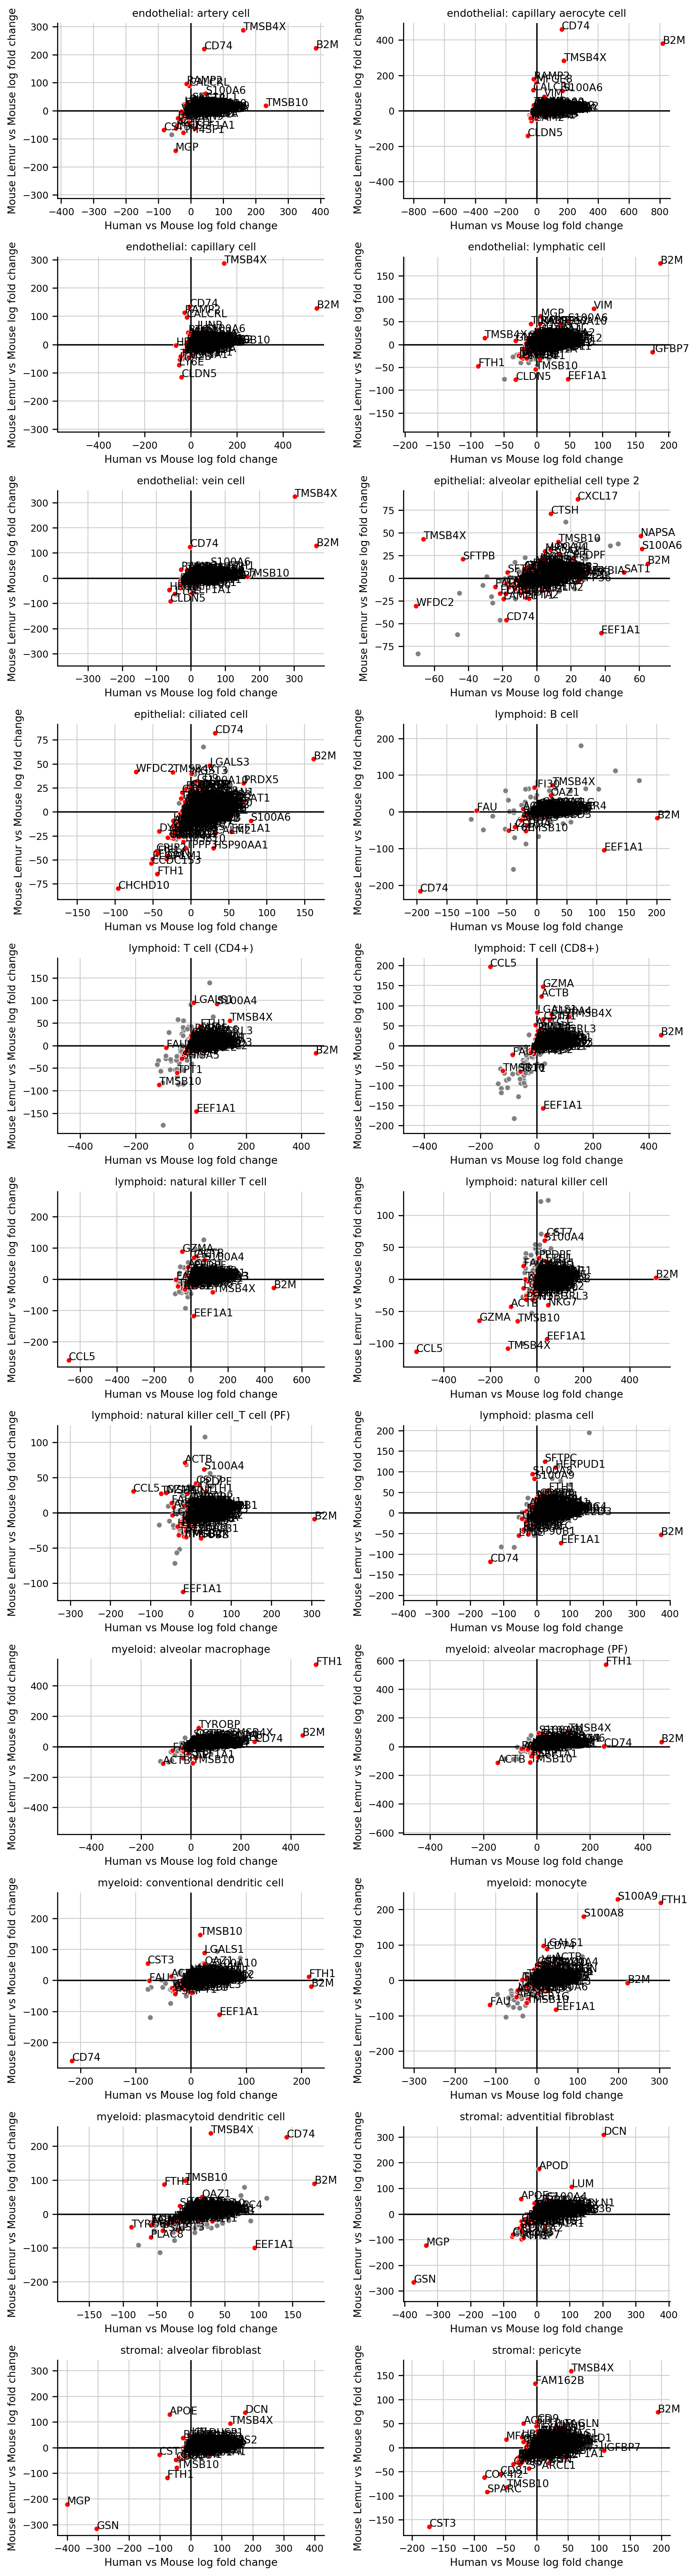

In [113]:
g = sns.FacetGrid(
    data=diffexpr_aggregated_pct_expr_filtered,
    col="group",
    aspect=1.5,
    col_wrap=2,
    sharex=False,
    sharey=False,
)
g.map(
    sns.scatterplot,
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse Lemur"),
    rasterized=True,
    alpha=0.5,
    color='black',
    marker='.',
    zorder=1,
)

g.map(
    scatterplot_constitutive,
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse Lemur"),
    rasterized=True,
    constitutive_genes=constitutive_genes_for_plotting,
    alpha=0.5,
    color='grey',
    zorder=2,
)
g.map(add_gene_names, ("logfoldchange", "Human"), ("logfoldchange", "Mouse Lemur"))
g.set_titles("{col_name}")
g.set(xlabel="Human vs Mouse log fold change", ylabel="Mouse Lemur vs Mouse log fold change")
for ax in g.axes.flat:
    # Make axis line centered
    xmin, xmax, ymin, ymax = ax.axis()
    new_xmax = max(xmax, -xmin)
    new_ymax = max(ymax, -ymin)
    ax.set(xlim=(-new_xmax, new_xmax), ylim=(-new_ymax, new_ymax))

    ax.axhline(color="k")
    ax.axvline(color="k")


g.fig.tight_layout()

g.savefig(
    os.path.join(figure_folder_base, f"{tissue}__logfoldchange__human-vs-lemur.pdf"),
    dpi=300,
)

## Make DE Scatterplots for cell types mentioned in text

In [88]:
celltypes_mentioned_in_text = 'alveolar macrophage', 'ciliated cell', 'capillary aerocyte cell', 'pericyte'
celltypes_mentioned_in_text

('alveolar macrophage', 'ciliated cell', 'capillary aerocyte cell', 'pericyte')

In [89]:
print(diffexpr_aggregated_pct_expr_filtered.shape)
diffexpr_aggregated_pct_expr_filtered.head()

(14960, 13)


logfoldchange                  pval_adj                \
species           Human Mouse Lemur         Human   Mouse Lemur   
gene_name                                                         
ABLIM1        -3.260083   -2.025281  1.061776e-09  9.730581e-04   
ACE          -29.224354  -31.066313  5.365480e-62  1.480939e-25   
ACTB          22.186068   32.255341  7.010692e-10  2.016550e-08   
ACTG1        -44.022247  -54.398861  1.620943e-26  1.504319e-18   
ACVRL1       -15.604079  -19.655066  2.348788e-23  1.540115e-17   

          pval_adj_neg_log10                  score              \
species                Human Mouse Lemur      Human Mouse Lemur   
gene_name                                                         
ABLIM1              8.973967    3.011861  -6.496931   -3.973090   
ACE                61.270391   24.829463 -16.917032  -11.128904   
ACTB                9.154239    7.695391   6.563319    6.273882   
ACTG1              25.790232   17.822660 -11.003827   -9.420403   
ACVRL1             22.629156   16.812447 -10.310266   -9.159987   

          percent_expressing                       is_dissociation_gene  \
species                Mouse Mouse Lemur     Human                        
gene_name                                                                 
ABLIM1              0.610526    0.230769  0.326187                False   
ACE                 0.978947    0.102564  0.385145                False   
ACTB                0.978947    1.000000  0.993874                 True   
ACTG1               1.000000    0.858974  0.957121                 True   
ACVRL1              0.947368    0.282051  0.712098                False   

                              group  
species                              
gene_name                            
ABLIM1     endothelial: artery cell  
ACE        endothelial: artery cell  
ACTB       endothelial: artery cell  
ACTG1      endothelial: artery cell  
ACVRL1     endothelial: artery cell

In [90]:
diffexpr_aggregated_pct_expr_filtered.group.value_counts()

myeloid: alveolar macrophage (PF)              1722
epithelial: ciliated cell                      1279
myeloid: alveolar macrophage                   1094
lymphoid: natural killer cell_T cell (PF)      1071
myeloid: conventional dendritic cell            976
epithelial: alveolar epithelial cell type 2     846
lymphoid: plasma cell                           827
myeloid: plasmacytoid dendritic cell            752
endothelial: capillary aerocyte cell            608
endothelial: lymphatic cell                     605
stromal: adventitial fibroblast                 580
endothelial: artery cell                        570
myeloid: monocyte                               529
endothelial: vein cell                          501
stromal: alveolar fibroblast                    468
stromal: pericyte                               437
endothelial: capillary cell                     420
lymphoid: natural killer cell                   360
lymphoid: natural killer T cell                 354
lymphoid: T 

In [131]:
celltype_rows = diffexpr_aggregated_pct_expr_filtered.group.apply(
    lambda x: any(
        x.split(":")[-1].strip() == celltype for celltype in celltypes_mentioned_in_text
    )
)
diffexpr_aggregated_pct_expr_filtered_celltype_subset = (
    diffexpr_aggregated_pct_expr_filtered.loc[celltype_rows]
)
print(diffexpr_aggregated_pct_expr_filtered_celltype_subset.shape)
diffexpr_aggregated_pct_expr_filtered_celltype_subset.head()

(9823, 13)


logfoldchange                  pval_adj                \
species           Human Mouse Lemur         Human   Mouse Lemur   
gene_name                                                         
AAK1           1.815551    1.457174  2.587712e-03  1.000000e+00   
AAMP          -1.490501   -1.485685  1.384707e-28  4.606666e-24   
ABCF1          0.043718    0.121431  4.921869e-08  4.204304e-08   
ABHD16A       -2.016711    0.380954  1.990411e-55  3.155058e-04   
ABI1          -2.555262   -2.255051  2.851966e-77  3.254726e-39   

          pval_adj_neg_log10                  score              \
species                Human Mouse Lemur      Human Mouse Lemur   
gene_name                                                         
AAK1                2.587084    0.000000   3.223688    0.244250   
AAMP               27.858642   23.336613 -11.254925  -10.338812   
ABCF1               7.307870    7.376306  -5.642996   -5.715837   
ABHD16A            54.701057    3.500993 -15.833597   -3.852612   
ABI1               76.544856   38.487486 -18.751289  -13.314281   

          percent_expressing                       is_dissociation_gene  \
species                Mouse Mouse Lemur     Human                        
gene_name                                                                 
AAK1                0.125000    0.116137  0.165409                False   
AAMP                0.576172    0.209046  0.264817                False   
ABCF1               0.296875    0.133252  0.161907                False   
ABHD16A             0.476562    0.270171  0.149515                 True   
ABI1                0.523438    0.132029  0.142780                 True   

                                          group  
species                                          
gene_name                                        
AAK1       endothelial: capillary aerocyte cell  
AAMP       endothelial: capillary aerocyte cell  
ABCF1      endothelial: capillary aerocyte cell  
ABHD16A    endothelial: capillary aerocyte cell  
ABI1       endothelial: capillary aerocyte cell

In [132]:
diffexpr_aggregated_pct_expr_filtered_celltype_subset.group.value_counts()

myeloid: alveolar macrophage            3171
epithelial: ciliated cell               3014
endothelial: capillary aerocyte cell    1849
stromal: pericyte                       1789
Name: group, dtype: int64

In [133]:
1+1

2

In [134]:
diffexpr_aggregated_pct_expr_filtered_celltype_subset.head()

logfoldchange                  pval_adj                \
species           Human Mouse Lemur         Human   Mouse Lemur   
gene_name                                                         
AAK1           1.815551    1.457174  2.587712e-03  1.000000e+00   
AAMP          -1.490501   -1.485685  1.384707e-28  4.606666e-24   
ABCF1          0.043718    0.121431  4.921869e-08  4.204304e-08   
ABHD16A       -2.016711    0.380954  1.990411e-55  3.155058e-04   
ABI1          -2.555262   -2.255051  2.851966e-77  3.254726e-39   

          pval_adj_neg_log10                  score              \
species                Human Mouse Lemur      Human Mouse Lemur   
gene_name                                                         
AAK1                2.587084    0.000000   3.223688    0.244250   
AAMP               27.858642   23.336613 -11.254925  -10.338812   
ABCF1               7.307870    7.376306  -5.642996   -5.715837   
ABHD16A            54.701057    3.500993 -15.833597   -3.852612   
ABI1               76.544856   38.487486 -18.751289  -13.314281   

          percent_expressing                       is_dissociation_gene  \
species                Mouse Mouse Lemur     Human                        
gene_name                                                                 
AAK1                0.125000    0.116137  0.165409                False   
AAMP                0.576172    0.209046  0.264817                False   
ABCF1               0.296875    0.133252  0.161907                False   
ABHD16A             0.476562    0.270171  0.149515                 True   
ABI1                0.523438    0.132029  0.142780                 True   

                                          group  
species                                          
gene_name                                        
AAK1       endothelial: capillary aerocyte cell  
AAMP       endothelial: capillary aerocyte cell  
ABCF1      endothelial: capillary aerocyte cell  
ABHD16A    endothelial: capillary aerocyte cell  
ABI1       endothelial: capillary aerocyte cell

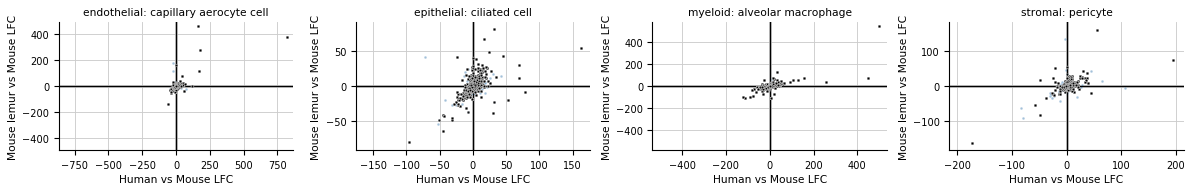

In [135]:
genes_to_label = [
    "SPATA4",
    "CIB1",
    "WDR38",
    "WDR54",
    "OSCAR",
    "IL4I1",
    "MME",
    "C1QA",
    "C1QB",
    "CFD",
    "ACE",
    "VIPR1",
    "NDRG1",
    "RGS5",
    "WFDC1",
]

g = sns.FacetGrid(
    data=diffexpr_aggregated_pct_expr_filtered_celltype_subset,
    col="group",
    aspect=1.5,
    #     col_wrap=2,
    sharex=False,
    sharey=False,
    height=2.5,
)
g.map(
    sns.scatterplot,
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse Lemur"),
    rasterized=True,
    alpha=0.5,
    color="steelblue",
    marker=".",
    zorder=1,
)

g.map(
    scatterplot_constitutive,
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse Lemur"),
    rasterized=True,
    constitutive_genes=constitutive_genes_for_plotting,
    alpha=0.5,
    color="black",
    zorder=5,
    marker=".",
)
for ax in g.axes.flat:
    # Make axis line centered
    xmin, xmax, ymin, ymax = ax.axis()
    new_xmax = max(xmax, -xmin)
    new_ymax = max(ymax, -ymin)
    ax.set(xlim=(-new_xmax, new_xmax), ylim=(-new_ymax, new_ymax))

    ax.axhline(color="k")
    ax.axvline(color="k")
g.map(
    add_gene_names,
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse Lemur"),
    logfoldchange_threshold=30,
    significance_multiplier=1,
    genes_to_label=genes_to_label,
)


# Label the plot
g.set_titles("{col_name}")
g.set(xlabel="Human vs Mouse LFC", ylabel="Mouse lemur vs Mouse LFC")
g.fig.tight_layout()

g.savefig(
    os.path.join(
        figure_folder_base,
        f"{tissue}__logfoldchange__human-vs-lemur__select_celltypes.pdf",
    ),
    dpi=300,
)

In [137]:
sns.set_context('paper')

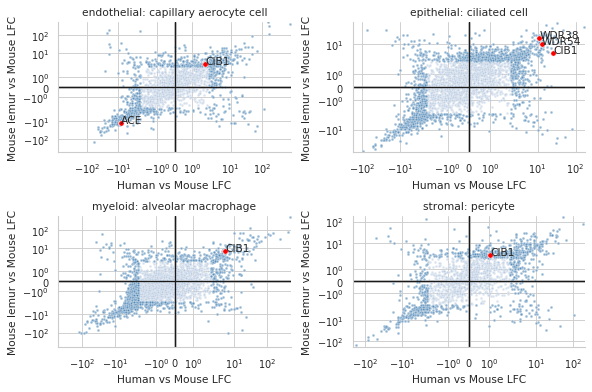

In [172]:
genes_to_label = [
    "SPATA4",
    "CIB1",
    "WDR38",
    "WDR54",
    "OSCAR",
    "IL4I1",
    "MME",
    "C1QA",
    "C1QB",
    "CFD",
    "ACE",
    "VIPR1",
    "NDRG1",
    "RGS5",
    "WFDC1",
]

g = sns.FacetGrid(
    data=diffexpr_aggregated_pct_expr_filtered_celltype_subset,
    #     data=d
    col="group",
    aspect=1.5,
    col_wrap=2,
    sharex=False,
    sharey=False,
    height=2.5,
)
g.map(
    sns.scatterplot,
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse Lemur"),
    rasterized=True,
    alpha=0.5,
    color="lightsteelblue",
    marker=".",
    zorder=1,
)

g.map(
    scatterplot_significant,
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse Lemur"),
    rasterized=True,
    alpha=0.5,
    color="steelblue",
    marker=".",
    zorder=1,
)

# g.map(
#     scatterplot_constitutive,
#     ("logfoldchange", "Human"),
#     ("logfoldchange", "Mouse Lemur"),
#     rasterized=True,
#     constitutive_genes=constitutive_genes_for_plotting,
#     alpha=0.5,
#     color="black",
#     zorder=5,
#     marker=".",
# )
for ax in g.axes.flat:
    # Make axis line centered
    xmin, xmax, ymin, ymax = ax.axis()
    new_xmax = max(xmax, -xmin)
    new_ymax = max(ymax, -ymin)
    ax.set(xlim=(-new_xmax, new_xmax), ylim=(-new_ymax, new_ymax))

    ax.axhline(color="k")
    ax.axvline(color="k")
g.map(
    add_gene_names,
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse Lemur"),
    logfoldchange_threshold=0,
    significance_multiplier=0,
    genes_to_label=genes_to_label,
    #     constitutive_genes=constitutive_genes_for_plotting
)


# Label the plot
g.set_titles("{col_name}")
g.set(
    xlabel="Human vs Mouse LFC",
    ylabel="Mouse lemur vs Mouse LFC",
    xscale="symlog",
    yscale="symlog",
)
g.fig.tight_layout()

g.savefig(
    os.path.join(
        figure_folder_base,
        f"{tissue}__logfoldchange__human-vs-lemur__select_celltypes.pdf",
    ),
    dpi=300,
)

## Do on all genes, not just those filtered for percent expressin

In [130]:
celltype_rows = diffexpr_aggregated.group.apply(
    lambda x: any(
        x.split(":")[-1].strip() == celltype for celltype in celltypes_mentioned_in_text
    )
)
diffexpr_aggregated_celltype_subset = (
    diffexpr_aggregated.loc[celltype_rows]
)
print(diffexpr_aggregated_celltype_subset.shape)
diffexpr_aggregated_celltype_subset.head()

(52224, 13)


logfoldchange                   pval_adj                \
species           Human Mouse Lemur          Human   Mouse Lemur   
gene_name                                                          
A1BG          27.178938    0.000000   4.057424e-04  1.000000e+00   
A1CF           0.000000    0.000000   1.000000e+00  1.000000e+00   
A2M           36.925533    0.000000  4.617229e-118  1.000000e+00   
A3GALT2      -21.720203    1.449169   1.296294e-02  9.374553e-01   
A4GALT        -1.728938  -32.173019   1.263619e-40  1.298220e-96   

          pval_adj_neg_log10                  score              \
species                Human Mouse Lemur      Human Mouse Lemur   
gene_name                                                         
A1BG                3.391750    0.000000   3.738578    0.000000   
A1CF                0.000000    0.000000   0.000000    0.000000   
A2M               117.335619    0.000000  23.237913    0.000000   
A3GALT2             1.887296    0.028049  -2.692582   -0.333378   
A4GALT             39.898384   95.886652 -13.502822  -21.052103   

          percent_expressing                       is_dissociation_gene  \
species                Mouse Mouse Lemur     Human                        
gene_name                                                                 
A1BG                0.000000    0.000000  0.026670                False   
A1CF                0.000000    0.000000  0.000000                False   
A2M                 0.000000    0.000000  0.597791                False   
A3GALT2             0.001953    0.001222  0.000000                False   
A4GALT              0.453125    0.000000  0.162985                False   

                                          group  
species                                          
gene_name                                        
A1BG       endothelial: capillary aerocyte cell  
A1CF       endothelial: capillary aerocyte cell  
A2M        endothelial: capillary aerocyte cell  
A3GALT2    endothelial: capillary aerocyte cell  
A4GALT     endothelial: capillary aerocyte cell

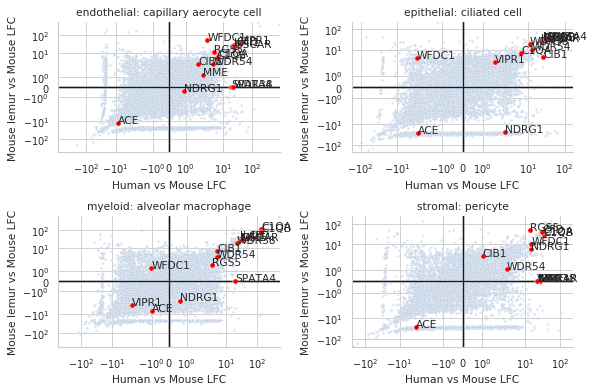

In [181]:
genes_to_label = [
    "SPATA4",
    "CIB1",
    "WDR38",
    "WDR54",
    "OSCAR",
    "IL4I1",
    "MME",
    "C1QA",
    "C1QB",
    "CFD",
    "ACE",
    "VIPR1",
    "NDRG1",
    "RGS5",
    "WFDC1",
]

g = sns.FacetGrid(
    data=diffexpr_aggregated_celltype_subset,
    col="group",
    aspect=1.5,
        col_wrap=2,
    sharex=False,
    sharey=False,
    height=2.5,
)
g.map(
    sns.scatterplot,
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse Lemur"),
    rasterized=True,
    alpha=0.5,
    color="lightsteelblue",
    marker=".",
    zorder=1,
)

# g.map(
#     scatterplot_significant,
#     ("logfoldchange", "Human"),
#     ("logfoldchange", "Mouse Lemur"),
#     ("pval_adj_neg_log10", "Human"),
#     ("pval_adj_neg_log10", "Mouse Lemur"),
#     neglog10pval_threshold=5,
#     rasterized=True,
#     alpha=0.5,
#     color="steelblue",
#     marker=".",
#     zorder=2,
# )


# g.map(
#     scatterplot_constitutive,
#     ("logfoldchange", "Human"),
#     ("logfoldchange", "Mouse Lemur"),
#     rasterized=True,
#     constitutive_genes=constitutive_genes_for_plotting,
#     alpha=0.5,
#     color="black",
#     zorder=5,
#     marker=".",
# )
for ax in g.axes.flat:
    # Make axis line centered
    xmin, xmax, ymin, ymax = ax.axis()
    new_xmax = max(xmax, -xmin)
    new_ymax = max(ymax, -ymin)
    ax.set(xlim=(-new_xmax, new_xmax), ylim=(-new_ymax, new_ymax))

    ax.axhline(color="k")
    ax.axvline(color="k")
g.map(
    add_gene_names,
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse Lemur"),
    logfoldchange_threshold=0,
    significance_multiplier=1,
    genes_to_label=genes_to_label,
#     constitutive_genes=constitutive_genes_for_plotting
)


# Label the plot
g.set_titles("{col_name}")
g.set(xlabel="Human vs Mouse LFC", ylabel="Mouse lemur vs Mouse LFC", xscale='symlog', yscale='symlog')
g.fig.tight_layout()

g.savefig(
    os.path.join( 
        figure_folder_base,
        f"{tissue}__logfoldchange__human-vs-lemur__select_celltypes__alldata.pdf",
    ),
    dpi=300,
)

## Try new lfc code for all genes

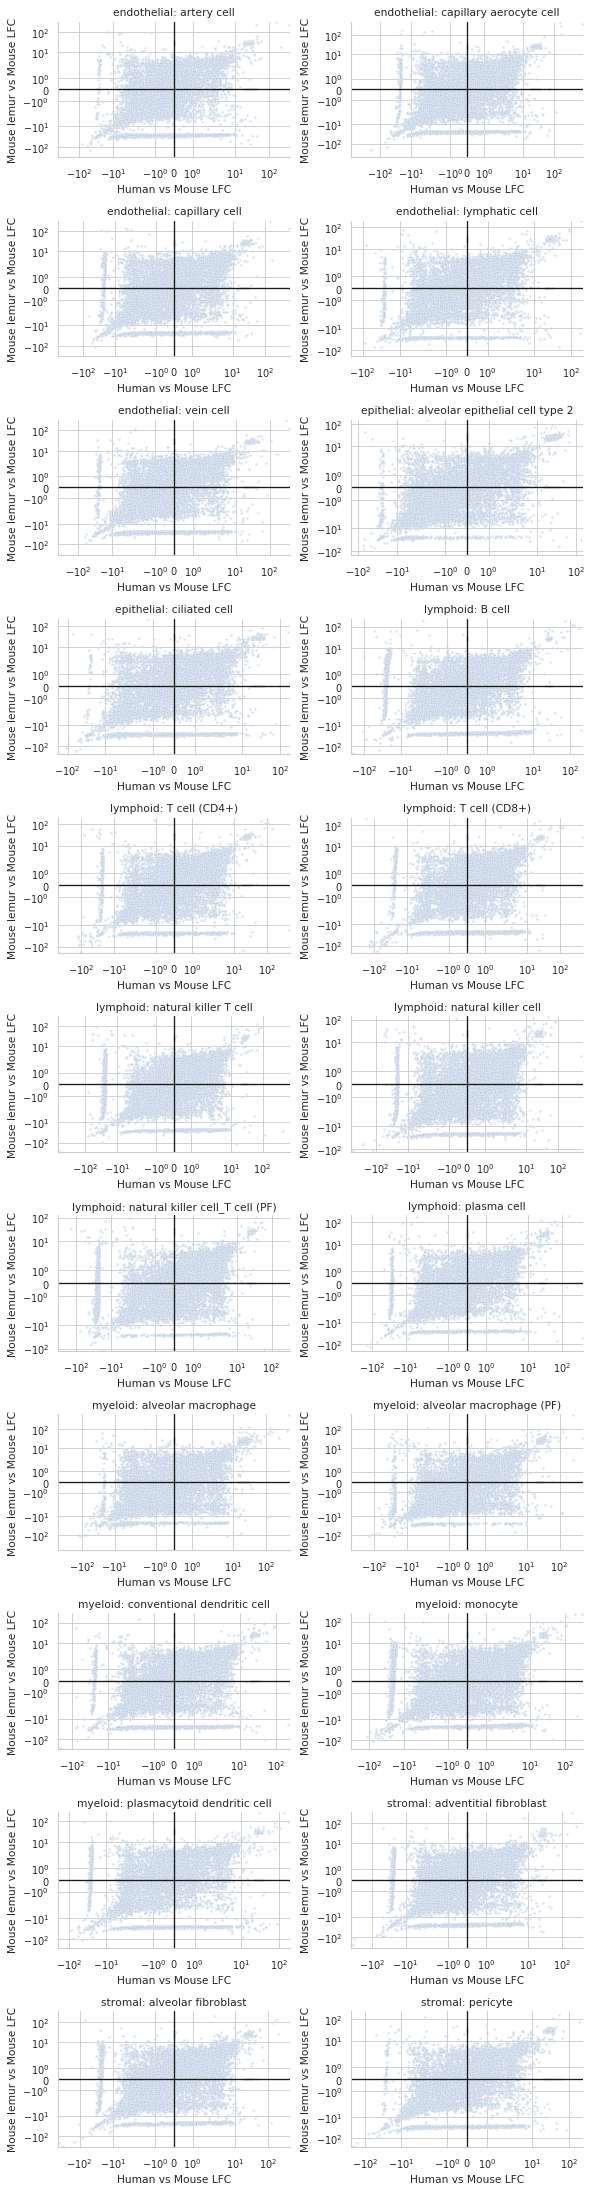

In [187]:

g = sns.FacetGrid(
    data=diffexpr_aggregated,
    col="group",
    aspect=1.5,
        col_wrap=2,
    sharex=False,
    sharey=False,
    height=2.5,
)
g.map(
    sns.scatterplot,
    ("logfoldchange", "Human"),
    ("logfoldchange", "Mouse Lemur"),
    rasterized=True,
    alpha=0.5,
    color="lightsteelblue",
    marker=".",
    zorder=1,
)

# g.map(
#     scatterplot_significant,
#     ("logfoldchange", "Human"),
#     ("logfoldchange", "Mouse Lemur"),
#     ("pval_adj_neg_log10", "Human"),
#     ("pval_adj_neg_log10", "Mouse Lemur"),
#     neglog10pval_threshold=5,
#     rasterized=True,
#     alpha=0.5,
#     color="steelblue",
#     marker=".",
#     zorder=2,
# )


# g.map(
#     scatterplot_constitutive,
#     ("logfoldchange", "Human"),
#     ("logfoldchange", "Mouse Lemur"),
#     rasterized=True,
#     constitutive_genes=constitutive_genes_for_plotting,
#     alpha=0.5,
#     color="black",
#     zorder=5,
#     marker=".",
# )
for ax in g.axes.flat:
    # Make axis line centered
    xmin, xmax, ymin, ymax = ax.axis()
    new_xmax = max(xmax, -xmin)
    new_ymax = max(ymax, -ymin)
    ax.set(xlim=(-new_xmax, new_xmax), ylim=(-new_ymax, new_ymax))

    ax.axhline(color="k")
    ax.axvline(color="k")



# Label the plot
g.set_titles("{col_name}")
g.set(xlabel="Human vs Mouse LFC", ylabel="Mouse lemur vs Mouse LFC", xscale='symlog', yscale='symlog')
g.fig.tight_layout()

g.savefig(
    os.path.join( 
        figure_folder_base,
        f"{tissue}__logfoldchange__human-vs-lemur__alldata.pdf",
    ),
    dpi=300,
)

In [147]:
diffexpr_aggregated_celltype_subset.loc[["MME", "CFD", "OSCAR", "IL4I1"]][
    ["logfoldchange", "group"]
].sort_values('group')  # .query('group == "myeloid: alveolar macrophage"')

logfoldchange                                             group
species           Human Mouse Lemur                                      
gene_name                                                                
MME            2.179903    1.116559  endothelial: capillary aerocyte cell
CFD           28.670578   32.686459  endothelial: capillary aerocyte cell
OSCAR         24.533403   22.999435  endothelial: capillary aerocyte cell
IL4I1         24.775867   27.142344  endothelial: capillary aerocyte cell
MME           25.060125   30.648907             epithelial: ciliated cell
CFD           30.838596   27.758316             epithelial: ciliated cell
OSCAR         25.279036   26.751297             epithelial: ciliated cell
IL4I1         22.881203   26.698763             epithelial: ciliated cell
MME           31.024742   27.869408          myeloid: alveolar macrophage
CFD           50.150314   35.060444          myeloid: alveolar macrophage
OSCAR         32.173019   28.988598          myeloid: alveolar macrophage
IL4I1         27.444742   33.338215          myeloid: alveolar macrophage
MME           25.207901    0.000000                     stromal: pericyte
CFD           30.573370   39.268131                     stromal: pericyte
OSCAR         26.361486    0.000000                     stromal: pericyte
IL4I1         23.544565    0.000000                     stromal: pericyte

In [96]:
'''SPATA4, CIB1, WDR38, WDR54, OSCAR, IL4I1, MME, C1QA, C1QB, CFD, ACE, VIPR1, NDRG1, RGS5, WFDC1'''.split(', ')

['SPATA4',
 'CIB1',
 'WDR38',
 'WDR54',
 'OSCAR',
 'IL4I1',
 'MME',
 'C1QA',
 'C1QB',
 'CFD',
 'ACE',
 'VIPR1',
 'NDRG1',
 'RGS5',
 'WFDC1']

In [21]:
cross_species.make_subset_adatas(do_pca_umap=False)


------- group: endothelial: artery cell -------
number of cells: 1479

------- group: endothelial: capillary aerocyte cell -------
number of cells: 5042

------- group: endothelial: capillary cell -------
number of cells: 8121

------- group: endothelial: lymphatic cell -------
number of cells: 690

------- group: endothelial: vein cell -------
number of cells: 1410

------- group: epithelial: alveolar epithelial cell type 2 -------
number of cells: 5255

------- group: epithelial: ciliated cell -------
number of cells: 1368

------- group: lymphoid: B cell -------
number of cells: 1895

------- group: lymphoid: T cell (CD4+) -------
number of cells: 3860

------- group: lymphoid: T cell (CD8+) -------
number of cells: 3143

------- group: lymphoid: natural killer T cell -------
number of cells: 1187

------- group: lymphoid: natural killer cell -------
number of cells: 7894

------- group: lymphoid: natural killer cell_T cell (PF) -------
number of cells: 899

------- group: lymphoid

> Comparison of cell types revealed lemurs possess lungs cell types found in human, but not mouse, such as the recently described fibromyocytes that express genes from both myofibroblasts (ASPN, FGF18, and COL1A2) [and also smooth muscle cells (ACTA2, CNN1, TAGLN) and that localize to airways in human]. Comparison of global expression patterns across 23 lung cell types shared across all three datasets, and spanning each major tissue compartment, revealed that 11 lemur cell types were more significantly similar to human than mouse (such as plasma cells, multiple dendritic populations, and both types of lung capillaries), 8 were equally similar (such as adventitial and alveolar fibroblasts and monocytes), and 4 were more similar to mouse than human (such as lymphatics and CD8+ T cells). Together, these results suggest lemur lungs are more similar to human and provide a roadmap for which cell types and physiological processes require primate models for future study, and those that do not.

> Analyzing the specific genes with shared expression in lemur and human cells, but not in mice, that helped drive the global similarity scores revealed they could influence each cell type’s canonical molecular function. This includes alveolar macrophage’s role in immune modulation through primate-specific expression of complement genes (C1QA,C1QB, CFD) and genes responsive to pathogens or injury (OSCAR, IL4I1, MME), ciliated cells role in airway clearance through expression of modulators of ciliary formation and function (SPATA4, CIB1, WDR38, WDR54), capillary aerocyte function in gas-exchange through expression of an enzyme which synthesizes (ACE) and receptor which responds to (VIPR1) vasoactive hormones, and pericytes in maintaining capillary integrity through expression of modulators of angiogenesis (NDRG1, RGS5) and wound healing (WFDC1). Notably, these four examples also come from cells across the four major lung tissue compartments and provide specific molecular targets for future functional studies.


In [ ]:
adata

In [ ]:
# diffexpr_aggregated.loc[(diffexpr_aggregated.logfoldchange > 100).any(axis=1)]

In [ ]:
diffexpr_aggregated.logfoldchange == 0

In [ ]:
diffexpr_aggregated.shape

## Get genes changing in both human-mouse and lemur-mouse comparisons, find primate gain and loss

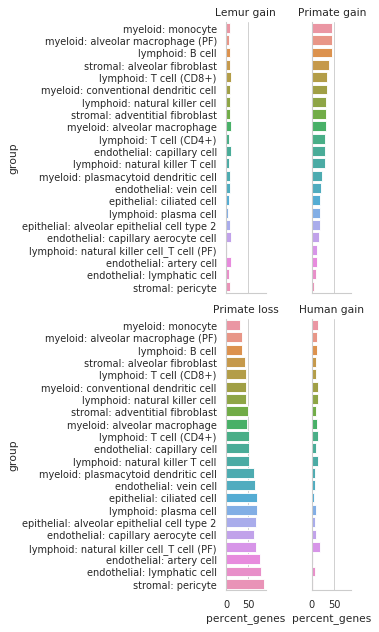

In [188]:
diffexpr_aggregated_changing = diffexpr_aggregated_significant.loc[(diffexpr_aggregated_significant.logfoldchange != 0).all(axis=1)].dropna()
diffexpr_aggregated_changing.shape

str_to_quadrant = {
    "True-True": "Primate gain",
    "False-False": "Primate loss",
    "True-False": "Human gain",
    "False-True": "Lemur gain",
}

diffexpr_aggregated_changing["primate_category"] = (
    (diffexpr_aggregated_changing.logfoldchange > 0)
    .apply(lambda x: "-".join(map(str, x)), axis=1)
    .map(str_to_quadrant)
)
diffexpr_aggregated_changing.head()

sns.set(context='paper', style='whitegrid')

diffexpr_aggregated_changing.group.value_counts()

diffexpr_aggregated_changing_primate_categories = diffexpr_aggregated_changing.groupby(['group']).primate_category.value_counts()
diffexpr_aggregated_changing_primate_categories.head()

diffexpr_aggregated_changing_primate_categories_percent = (
    diffexpr_aggregated_changing_primate_categories.groupby(level=0).apply(
        lambda x: 100 * x / x.sum()
    )
)
diffexpr_aggregated_changing_primate_categories_percent.name = 'percent_genes'
diffexpr_aggregated_changing_primate_categories_percent = diffexpr_aggregated_changing_primate_categories_percent.reset_index()

diffexpr_aggregated_changing_primate_categories_percent.head()

primate_gain = diffexpr_aggregated_changing_primate_categories_percent.query('primate_category == "Primate gain"')
primate_gain =  primate_gain.sort_values('percent_genes', ascending=False)
primate_gain

primate_loss = diffexpr_aggregated_changing_primate_categories_percent.query('primate_category == "Primate loss"')
primate_loss =  primate_loss.sort_values('percent_genes', ascending=False)
primate_loss

# g = sns.catplot(
#     data=diffexpr_aggregated_changing_primate_categories_percent,
#     hue="primate_category",
#     y="group",
#     x='percent_genes',
#     kind='bar',
#     order=primate_gain.group,
#     height=5,
#     aspect=1.25,
# )
# g.savefig(
#     os.path.join(figure_folder_base, f"{tissue}__logfoldchange__human-vs-lemur__primate_gain_loss_barplot.pdf")
# )

g = sns.catplot(
    data=diffexpr_aggregated_changing_primate_categories_percent,
    col="primate_category",
    y="group",
    x='percent_genes',
    kind='bar',
    order=primate_gain.group,
    height=4,
    aspect=.6,
    sharey=True,
    col_wrap=2,
    col_order = ['Lemur gain', 'Primate gain', 'Primate loss', 'Human gain']
)
g.set_titles('{col_name}')

g.fig.tight_layout()
g.savefig(
    os.path.join(figure_folder_base, f"{tissue}__logfoldchange__human-vs-lemur__primate_gain_loss_barplot.pdf")
)

### Show where genes match up the most

In [ ]:
mask1 = diffexpr_aggregated['group'] == "lymphoid: B cell"
mask2 = diffexpr_aggregated.logfoldchange > 20

diffexpr_aggregated.loc[mask1 & mask2]

# Make dotplots

In [ ]:
figure_folder_base

In [ ]:
save_folder = os.path.join(figure_folder_base, 'dotplots')
! mkdir -p $save_folder
sc.settings.figdir = save_folder

### Primate loss of expression dotplots

In [ ]:
cross_species.de_dotplots(
    sort="score",
#     mean_only_expressed=True,
#     standard_scale="group",
    ignore_genes=dissociation_genes,
    primate_larger=False,
    save=True,
    save_format='pdf' 
    
)

### Primate gain of expression dotplots

In [ ]:
cross_species.de_dotplots(
    sort="score",
#     mean_only_expressed=True,
#     standard_scale="group",
    ignore_genes=dissociation_genes,
    primate_larger=True,
    save=True,
    save_format='pdf' 
    
)

In [ ]:
# cross_species.de_dotplots_multispecies(save=True, ignore_genes=dissociation_genes)

## Matplotlibrc

In [ ]:
%%file matplotlibrc

# Non-interactive backend
backend: TkAgg

# Editable text on pdf export
pdf.fonttype: 42
ps.fonttype: 42

# Don't warn about too many figures open
figure.max_open_warning: 0

# Figure saving
savefig.transparent: True
savefig.bbox: tight
savefig.dpi: 300

# Fonts
font.sans-serif: Arial

## Dotplolts

In [ ]:
cross_species.species_to_color_map = xspecies.SPECIES_TO_COLOR_MAP
outdir_gdrive = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species-lung/across-species-within-group-diffexpr/ligand_groups'
# ! rm -rf $outdir_gdrive
! mkdir $outdir_gdrive

sc.set_figure_params(
    dpi=200, dpi_save=300, transparent=True, vector_friendly=True, frameon=False
)


for ligand, index in ligand_groups_primate.items():
    print(f'--- {ligand} ---')

    ligands_of_receptors = receptor_ligand_pairs_primate.loc[index]
    
    receptor_subset = sorted(list(ligands_of_receptors[receptor_col].unique()))
    ligand_subset = sorted(list(ligands_of_receptors[ligand_col].unique()))
    gene_subset = ligand_subset + receptor_subset
    print(f'number of overlapping genes: {len(gene_subset)}')
    if not gene_subset:
        continue
    
    save_dir = f'{outdir_gdrive}/ligand-centric/{ligand}/'
    ! mkdir -p $save_dir
    sc.settings.figdir = save_dir
    
    cross_species.dotplot_multispecies(gene_subset, save_prefix=ligand)


# Look at disease gene expression

## Initialize disease lookup

In [ ]:
from biothings_client import get_client

md = get_client("disease")
md

## Get curated lung diseases from Human Lung Cell Atlas

In [ ]:
hlca_curated_lung_diseases = pd.read_csv('https://raw.githubusercontent.com/krasnowlab/HLCA/master/Analysis/dbs/currated-lung-diseases.tsv', sep='\t')
print(hlca_curated_lung_diseases.shape)
hlca_curated_lung_diseases.head()

In [ ]:
hlca_curated_lung_diseases['to_query'] = hlca_curated_lung_diseases['Title'].apply(lambda x: x.lower().split(';')[0].split(',')[0].split('/')[0])

# Hand-fix some queries
replacer = {
    '46': 'XX SEX REVERSAL WITH DYSGENESIS OF KIDNEYS, ADRENALS, AND LUNGS'.lower()
}
hlca_curated_lung_diseases['to_query'] = hlca_curated_lung_diseases['to_query'].replace(replacer)
hlca_curated_lung_diseases['omim_id'] = hlca_curated_lung_diseases['MIM Number'].str.strip('#%')
hlca_curated_lung_diseases.head()

In [ ]:
hlca_curated_lung_diseases.loc[hlca_curated_lung_diseases.Title.str.contains("46")]

In [ ]:
hlca_curated_lung_diseases.loc[hlca_curated_lung_diseases.Title.str.contains("PULMONARY DISEASE")]

In [ ]:
(hlca_curated_lung_diseases.to_query == "syndrome").sum()

### for some reason query many doesn't work?

In [ ]:
hlca_curated_lung_diseases_mydisease_queries = hlca_curated_lung_diseases['to_query'].map(md.query)
len(hlca_curated_lung_diseases_mydisease_queries)

In [ ]:
mydisease_results = md.querymany(hlca_curated_lung_diseases['to_query'].values, scopes='all')
len(mydisease_results)
# print(mydisease_results.shape)
# mydisease_results.head()

In [ ]:
# md.query('surfactant metabolism dysfunction')

In [ ]:
# type(mydisease_results['dup'])

In [ ]:
# mydisease_results.keys()

In [ ]:
# type(mydisease_results['out'])

## Parse individual queries

In [ ]:
def _does_hit_have_genes_and_omim(hit, omim_ids):
    if 'mondo' in hit and 'disgenet' in hit:
        xrefs = hit['mondo']['xrefs']
        # Check for both 
        if 'omim' in xrefs and xrefs['omim'] in omim_ids:
            return True
    return False


def _print_hit(hit):
    print('---')
    print(hit['mondo']['label'])
    print(len(hit), hit['_id'])
    print(hit.keys())


def mydisease_results_parse(mydisease_results, omim_ids, verbose=False):
    """Run a query for mydisease.info and parse the results
    
    Get terms that have genes associated with the disease (disgenet) and a disease ontology (mondo)
    """
    filtered_results = []
    for result in mydisease_results:            
        for hit in result['hits']:
            if verbose:
                _print_hit(hit)

            if _does_hit_have_genes_and_omim(hit, omim_ids):
                filtered_results.append(hit)
    return filtered_results




def convert_mydisease_results_to_dictionary(mydisease_results):
    disease_genes = {}

    for disease in mydisease_results:
        disease_name = disease['mondo']['label']
    #     print(disease_name)
        try:
            genes_related_to_disease = disease['disgenet']['genes_related_to_disease']
            if isinstance(genes_related_to_disease, list):
                gene_symbols = [x['gene_name'] for x in genes_related_to_disease]
            else:
                gene_symbols = [genes_related_to_disease['gene_name']]
            disease_genes[disease_name] = gene_symbols
        except KeyError:
            continue
    for k, v in disease_genes.items():
        print(f"{k}: {len(v)}")
    return disease_genes


hlca_curated_lung_diseases_mydisease_queries_filtered = mydisease_results_parse(hlca_curated_lung_diseases_mydisease_queries, hlca_curated_lung_diseases['omim_id'].values)
lung_related_diseases_genes = convert_mydisease_results_to_dictionary(hlca_curated_lung_diseases_mydisease_queries_filtered)


In [ ]:
import json

with open('lung_related_disease_genes.json', 'w') as f:
    json.dump(lung_related_diseases_genes, f)

In [ ]:
# hlca_curated_mydisease_results = list(itertools.chain(*hlca_curated_lung_diseases['to_query'].map(
#     lambda x: mydisease_query_parse(x, omim_ids = hlca_curated_lung_diseases['omim_id']))))
# len(hlca_curated_mydisease_results)

In [ ]:

# hlca_curated_mydisease_results[0]['mondo']['xrefs']

In [ ]:
lung_related_diseases = []

In [ ]:
mydisease_results = md.query('copd')
for hit in mydisease_results['hits']:
    print(len(hit), hit['_id'])
    print(hit.keys())
    print(hit['mondo']['label'])
    if 'mondo' and 'disgenet' in hit:
        lung_related_diseases.append(hit)

In [ ]:
# copd = mydisease_results['hits'][0]
# copd['ctd'].keys()

In [ ]:
# copd_ctd_chemical_genes = sorted([x['inference_gene_symbol'] for x in copd['ctd']['chemical_related_to_disease']])
# copd_ctd_pathway_genes = sorted([x['inference_gene_symbol'] for x in copd['ctd']['pathway_related_to_disease']])

In [ ]:
# 'HHIP' in copd_ctd_chemical_genes

In [ ]:
# 'HHIP' in copd_ctd_pathway_genes

In [ ]:
mydisease_results = md.query('lung')
for hit in mydisease_results['hits']:
    print('---')
    print(len(hit), hit['_id'])
    print(hit.keys())
    print(hit['mondo']['label'])
#     for synonym in hit['mondo']['synonyms']:
#         print(f'\t{synonym}')
    if 'mondo' and 'disgenet' in hit:
        lung_related_diseases.append(hit)

In [ ]:
mydisease_results = md.query('asthma')
for hit in mydisease_results['hits']:
    print('---')
    print(len(hit), hit['_id'])
    print(hit.keys())
    print(hit['mondo']['label'])
#     for synonym in hit['mondo']['synonyms']:
#         print(f'\t{synonym}')
        
    if 'ctd' in hit:
        print(f'ctd: {len(hit["ctd"])}')
    if 'mondo' and 'disgenet' in hit:
        lung_related_diseases.append(hit)

In [ ]:
mydisease_results = md.query('pulmonary')
for hit in mydisease_results['hits']:
    print('---')
    print(len(hit), hit['_id'])
    print(hit.keys())
    print(hit['mondo']['label'])
#     for synonym in hit['mondo']['synonyms']:
#         print(f'\t{synonym}')
        
    if 'ctd' in hit:
        print(f'ctd: {len(hit["ctd"])}')
    if 'mondo' and 'disgenet' in hit:
        lung_related_diseases.append(hit)

In [ ]:
disease = lung_related_diseases[0]
disease.keys()

In [ ]:


def convert_mydisease_results_to_dictionary(mydisease_results):
    disease_genes = {}

    for disease in mydisease_results:
        disease_name = disease['mondo']['label']
    #     print(disease_name)
        try:
            genes_related_to_disease = disease['disgenet']['genes_related_to_disease']
            if isinstance(genes_related_to_disease, list):
                gene_symbols = [x['gene_name'] for x in genes_related_to_disease]
            else:
                gene_symbols = [genes_related_to_disease['gene_name']]
            disease_genes[disease_name] = gene_symbols
        except KeyError:
            continue
    for k, v in disease_genes.items():
        print(f"{k}: {len(v)}")
    return disease_genes

lung_related_diseases_genes = convert_mydisease_results_to_dictionary(hlca_curated_lung_diseases_mydisease_queries_filtered)

In [ ]:
md.getdisease('MONDO:0005275')

## Parse omim data

In [ ]:
! wget https://www.omim.org/static/omim/data/mim2gene.txt

In [ ]:
mim2gene = pd.read_csv(
    "mim2gene.txt",
    comment="#",
    names=["omim_id", "omim_type", "entrez_gene_id", "hgnc_symbol", "ensembl_id"],
    sep="\t",
)
print(mim2gene.shape)
mim2gene.head()

In [ ]:
lung_related_diseases_genes

# Make dotplots of lung disease genes

## Make adatas for each species

In [ ]:
cross_species.adata_shared_subset = cross_species.subset_adata_shared_groups()
# cross_species.mini_adatas = cross_species.make_mini_adatas_per_group()


# cross_species.dotplots()

cross_species.species_adatas = cross_species.make_mini_adatas(cross_species.species_col, subgroup_col=cross_species.groups_col)

In [ ]:
adata_min_cells.obs['compartment_narrow_species'] = adata_min_cells.obs['compartment_narrow'].astype(str) + ' (' + adata_min_cells.obs['species_batch'].astype(str) + ')'
adata_min_cells.obs['compartment_narrow_species'].value_counts()

## Test dotplots with one gene subset

In [ ]:
# fig, axes = plt.subplots(ncols=3, figsize=(8, 3))


gene_subset = sorted(adata_min_cells.var.index.intersection(lung_related_diseases_genes['chronic obstructive pulmonary disease']))
len(gene_subset)

gene_subset = sorted(adata_min_cells.var.index.intersection(lung_related_diseases_genes['chronic obstructive pulmonary disease']))
species_to_color_map = {'Mouse': 'Blues', 'Mouse lemur': "YlOrBr", "Human": "Greens"}

for (species, ad), ax in zip(cross_species.species_adatas.items(), axes):
    print(species)
    color_map = species_to_color_map[species]
    sc.pl.dotplot(ad, gene_subset, groupby='compartment_narrow', standard_scale='var', log=True, color_map=color_map)
#     ax.set(title=species)

## Make dotplots, 50 genes at a time

In [ ]:
# Cribbed from https://docs.python.org/3/library/itertools.html#itertools-recipes

def grouper(iterable, n, fillvalue=None):
    "Collect data into fixed-length chunks or blocks"
    # grouper('ABCDEFG', 3, 'x') --> ABC DEF Gxx"
    args = [iter(iterable)] * n
    return itertools.zip_longest(*args, fillvalue=fillvalue)
list(grouper(gene_subset, 3))

In [ ]:
cross_species.species_to_color_map = xspecies.SPECIES_TO_COLOR_MAP

In [ ]:
max_genes = 55

for disease_name, disease_genes in sorted(lung_related_diseases_genes.items(), key=lambda x: x[0].lower()):
    print(f'\n--- {disease_name} ---')
    gene_subset = sorted(adata_min_cells.var.index.intersection(disease_genes))
    print(f'number of overlapping genes: {len(gene_subset)}')
    if not gene_subset:
        continue
  

    name_sanitized = disease_name.replace(' ', '_').lower().replace('/', '-slash-')
    save_dir = f'{outdir_gdrive}/lung-diseases/{name_sanitized}'
    ! mkdir -p $save_dir
    sc.settings.figdir = save_dir
    
    cross_species.dotplot_multispecies(gene_subset, save_prefix=name_sanitized)
#     # Return groups of up to 50 genes at a time
#     gene_subset_collated = grouper(gene_subset, max_genes)
#     for i, gene_subset_subset in enumerate(gene_subset_collated):
#         print(f'gene subset #{i+1}')
#         gene_subset_subset_no_none = [x for x in gene_subset_subset if x is not None]

#         for (species, ad), ax in zip(cross_species.species_adatas.items(), axes):
#             print(species)
#             color_map = species_to_color_map[species]
#             sc.pl.dotplot(ad, gene_subset_subset_no_none, groupby='compartment_narrow', 
#                           standard_scale='var', log=True, color_map=color_map, dot_min=0.1, dot_max=1)

In [ ]:
pl

In [ ]:
'figures/dotplot/ligand-receptor/adams-oliver_syndrome_1/'